### Importing Modules


In [1]:
import os
import pandas as pd
from random import randint
from time import sleep
from selenium import webdriver
import selenium 
# from selenium.webdriver.chrome.options import Options
from selenium.webdriver.edge.options import Options
from selenium.webdriver.edge.service import Service
# from selenium.webdriver.safari.options import Options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
import time
# !pip install fake-useragent
# from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import requests
import lxml
import numpy as np
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

## Scraping

### URL & Webdrivers

#### Safari

In [64]:

# ### Safari Code:
# ## Paste url
# url = 'https://missionantyodaya.nic.in/preloginRankingOfGp2020.html'

# options = Options()
# # download_dir = '/Users/sid/Downloads/MA'
# prefs = {'download.default_directory' : '/Users/sid/Documents/MA/GJ (24)'}
# options.add_experimental_option("prefs",prefs)

# # browser = webdriver.safari.webdriver.WebDriver(quiet=False)
# driver = webdriver.Safari()
# driver.get(url)

#### Edge

In [65]:

### Edge Code:
## Paste url
url = 'https://missionantyodaya.nic.in/ma2018/preloginScoreOfGp2018.html'
# url = 'https://missionantyodaya.nic.in/preloginRankingOfGp2020.html'
## Options
options = Options()
# download_dir = '/Users/sid/Downloads/MA'
prefs = {'download.default_directory' : '/Users/sid/Documents/MA_18_pdf/PB'}
options.add_experimental_option("prefs",prefs)
##Driver
# edge_driver_path = '/Users/sid/Downloads/edgedriver_mac64/msedgedriver'
edge_driver_path = Service('/Users/sid/Downloads/edgedriver_mac64_m1/msedgedriver')
driver = webdriver.Edge(service=edge_driver_path,options=options)
driver.get(url)

#### Chrome

In [66]:

# # ### Chrome Code:
# # url = 'https://missionantyodaya.nic.in/ma2018/preloginScoreOfGp2018.html'
# url = 'https://missionantyodaya.nic.in/preloginRankingOfGp2020.html'
# chrome_driver_path = '/Users/sid/Downloads/chromedriver'
# # chrome_driver_path = '/Users/sid/opt/anaconda3/pkgs/chromedriver/chromedriver'

# options = Options()
# # download_dir = '/Users/sid/Downloads/MA'
# prefs = {'download.default_directory' : '/Users/sid/Documents/MA/LD (37)'}
# options.add_experimental_option("prefs",prefs)
# ##Driver

# driver = webdriver.Chrome(executable_path=chrome_driver_path,options=options)
# driver.get(url)

## Master Loop

### State Selection Old

In [6]:

### Edge Code:
## Paste url
url = 'https://missionantyodaya.nic.in/ma2018/preloginScoreOfGp2018.html'
# url = 'https://missionantyodaya.nic.in/preloginRankingOfGp2020.html'
## Options
options = Options()
# download_dir = '/Users/sid/Downloads/MA'
prefs = {'download.default_directory' : '/Users/sid/Documents/MA_18_pdf/OR/'}
options.add_experimental_option("prefs",prefs)
##Driver
# edge_driver_path = '/Users/sid/Downloads/edgedriver_mac64/msedgedriver'
edge_driver_path = Service('/Users/sid/Downloads/edgedriver_mac64_m1/msedgedriver')
driver = webdriver.Edge(service=edge_driver_path,options=options)
driver.get(url)

## Use Select in xpath to select state name 
state_dropdown = Select(driver.find_element(By.XPATH,'//*[@id="stateCode"]'))
state_options = state_dropdown.options

## Create empty list of states
states_list = []
for option in state_options:
    states_list.append(option.text) ## State name in option

print(states_list)

choice = states_list[27]
state_dropdown.select_by_visible_text(choice)

time.sleep(5)

## Use Select in xpath to select district name
dist_dropdown = Select(driver.find_element(By.XPATH,'//*[@id="districtCode"]'))
dist_options = dist_dropdown.options

# time.sleep(5)

## Create empty list of districts
dist_list = []
for dist in dist_options:
    dist_list.append(dist.text) ## State name in option

print(dist_list)
print(len(dist_list))

for district in dist_list[12:]:
    print(district)
    browser_p = webdriver.Edge(service=edge_driver_path,options=options)
    
    browser_p.get(url)
    
    # Selecting state dropdown
    state_dropdown=Select(browser_p.find_element(By.XPATH,'//*[@id="stateCode"]'))
    state_dropdown.select_by_visible_text(choice)
    time.sleep(2)
    
    # Selecting district dropdown
    district_dropdown=Select(browser_p.find_element(By.XPATH,'//*[@id="districtCode"]'))
    district_dropdown.select_by_visible_text(district)
    time.sleep(2)
    
    submit = browser_p.find_element(By.XPATH,'//*[@id="SubmitButton"]')
    submit.click()
    
    time.sleep(5)

    # Finding rows options
    browser_p.find_element(By.XPATH,'//*[@id="example_wrapper"]/div[1]/button[1]').click()

    div_tag = browser_p.find_element(By.XPATH,'//*[@id="example_wrapper"]/div[1]/div')

    select_all = div_tag.find_element(By.XPATH,'//*[@id="example_wrapper"]/div[1]/div/button[4]')
    select_all.click()
    
    table_tag = browser_p.find_element(By.XPATH,'//*[@id="example"]/tbody')

    rows_tag=table_tag.find_elements(By.TAG_NAME,'tr')

    print(len(rows_tag))

    ## Create a list of xpaths on the links:
    xpaths=[]
    for i in range(0, len(rows_tag)+1):
        xpaths.append('//*[@id="example"]/tbody/tr['+ str(i) +']/td[7]/a')

    # xpaths[10]

    ## Create a list of links:
    links=[]
    for xpath in xpaths:
        try:
            links.append(browser_p.find_element_by_xpath(xpath).get_attribute('href')) ## Can cause crash if too many rows_tag using method 2
            # links.append(browser_p.find_element(By.XPATH, 'xpath').get_attribute('href')) ## Unable to obtain href with this
        except NoSuchElementException:
            pass

    print(len(links))

    for link in links:
        browser_p.get(link)

    print("District Download Completed")

    time.sleep(20) ##  Change according to internet speed
    browser_p.quit()
    

['Select State', 'ANDAMAN AND NICOBAR ISLANDS (35)', 'ANDHRA PRADESH (28)', 'ARUNACHAL PRADESH (12)', 'ASSAM (18)', 'BIHAR (10)', 'CHANDIGARH (4)', 'CHHATTISGARH (22)', 'DADRA AND NAGAR HAVELI (26)', 'DAMAN AND DIU (25)', 'DELHI (7)', 'GOA (30)', 'GUJARAT (24)', 'HARYANA (6)', 'HIMACHAL PRADESH (2)', 'JAMMU AND KASHMIR (1)', 'JHARKHAND (20)', 'KARNATAKA (29)', 'KERALA (32)', 'LADAKH (37)', 'LAKSHADWEEP (31)', 'MADHYA PRADESH (23)', 'MAHARASHTRA (27)', 'MANIPUR (14)', 'MEGHALAYA (17)', 'MIZORAM (15)', 'NAGALAND (13)', 'ODISHA (21)', 'PUDUCHERRY (34)', 'PUNJAB (3)', 'RAJASTHAN (8)', 'SIKKIM (11)', 'TAMIL NADU (33)', 'TELANGANA (36)', 'TRIPURA (16)', 'UTTARAKHAND (5)', 'UTTAR PRADESH (9)', 'WEST BENGAL (19)']
['Select District', 'ANUGUL (344)', 'BALANGIR (345)', 'BALESHWAR (346)', 'BARGARH (347)', 'BHADRAK (348)', 'BOUDH (349)', 'CUTTACK (350)', 'DEOGARH (351)', 'DHENKANAL (352)', 'GAJAPATI (353)', 'GANJAM (354)', 'JAGATSINGHAPUR (355)', 'JAJAPUR (356)', 'JHARSUGUDA (357)', 'KALAHANDI (35

/var/folders/2y/43tdd9hn3g11897s6jjnr8840000gn/T/ipykernel_69469/4150343793.py:92: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  links.append(browser_p.find_element_by_xpath(xpath).get_attribute('href')) ## Can cause crash if too many rows_tag using method 2


86
District Download Completed
JAJAPUR (356)
137
137
District Download Completed
JHARSUGUDA (357)
68
68
District Download Completed
KALAHANDI (358)
38
38
District Download Completed
KANDHAMAL (359)
40
40
District Download Completed
KENDRAPARA (360)
101
101
District Download Completed
KENDUJHAR (361)
267
267
District Download Completed
KHORDHA (362)
132
132
District Download Completed
KORAPUT (363)
37
37
District Download Completed
MALKANGIRI (364)
83
83
District Download Completed
MAYURBHANJ (365)
86
86
District Download Completed
NABARANGPUR (366)
94
94
District Download Completed
NAYAGARH (367)
83
83
District Download Completed
NUAPADA (368)
124
124
District Download Completed
PURI (369)
255
255
District Download Completed
RAYAGADA (370)
77
77
District Download Completed
SAMBALPUR (371)
99
99
District Download Completed
SONEPUR (372)
50
50
District Download Completed
SUNDARGARH (373)
54
54
District Download Completed


In [4]:
indexed_elements_states = [(element, index) for index, element in enumerate(states_list)]
indexed_elements_dist = [(element, index) for index, element in enumerate(dist_list)]
print(indexed_elements_states)
indexed_elements_dist

[('Select State', 0), ('ANDAMAN AND NICOBAR ISLANDS (35)', 1), ('ANDHRA PRADESH (28)', 2), ('ARUNACHAL PRADESH (12)', 3), ('ASSAM (18)', 4), ('BIHAR (10)', 5), ('CHANDIGARH (4)', 6), ('CHHATTISGARH (22)', 7), ('DADRA AND NAGAR HAVELI (26)', 8), ('DAMAN AND DIU (25)', 9), ('DELHI (7)', 10), ('GOA (30)', 11), ('GUJARAT (24)', 12), ('HARYANA (6)', 13), ('HIMACHAL PRADESH (2)', 14), ('JAMMU AND KASHMIR (1)', 15), ('JHARKHAND (20)', 16), ('KARNATAKA (29)', 17), ('KERALA (32)', 18), ('LADAKH (37)', 19), ('LAKSHADWEEP (31)', 20), ('MADHYA PRADESH (23)', 21), ('MAHARASHTRA (27)', 22), ('MANIPUR (14)', 23), ('MEGHALAYA (17)', 24), ('MIZORAM (15)', 25), ('NAGALAND (13)', 26), ('ODISHA (21)', 27), ('PUDUCHERRY (34)', 28), ('PUNJAB (3)', 29), ('RAJASTHAN (8)', 30), ('SIKKIM (11)', 31), ('TAMIL NADU (33)', 32), ('TELANGANA (36)', 33), ('TRIPURA (16)', 34), ('UTTARAKHAND (5)', 35), ('UTTAR PRADESH (9)', 36), ('WEST BENGAL (19)', 37)]


[('Select District', 0),
 ('ANUGUL (344)', 1),
 ('BALANGIR (345)', 2),
 ('BALESHWAR (346)', 3),
 ('BARGARH (347)', 4),
 ('BHADRAK (348)', 5),
 ('BOUDH (349)', 6),
 ('CUTTACK (350)', 7),
 ('DEOGARH (351)', 8),
 ('DHENKANAL (352)', 9),
 ('GAJAPATI (353)', 10),
 ('GANJAM (354)', 11),
 ('JAGATSINGHAPUR (355)', 12),
 ('JAJAPUR (356)', 13),
 ('JHARSUGUDA (357)', 14),
 ('KALAHANDI (358)', 15),
 ('KANDHAMAL (359)', 16),
 ('KENDRAPARA (360)', 17),
 ('KENDUJHAR (361)', 18),
 ('KHORDHA (362)', 19),
 ('KORAPUT (363)', 20),
 ('MALKANGIRI (364)', 21),
 ('MAYURBHANJ (365)', 22),
 ('NABARANGPUR (366)', 23),
 ('NAYAGARH (367)', 24),
 ('NUAPADA (368)', 25),
 ('PURI (369)', 26),
 ('RAYAGADA (370)', 27),
 ('SAMBALPUR (371)', 28),
 ('SONEPUR (372)', 29),
 ('SUNDARGARH (373)', 30)]

### State Selection New

In [ ]:

### Edge Code:
## Paste url
url = 'https://missionantyodaya.nic.in/ma2019/preloginScoreOfGp2019.html'
# url = 'https://missionantyodaya.nic.in/preloginRankingOfGp2020.html'
## Options
options = Options()
# download_dir = '/Users/sid/Downloads/MA'
# prefs = {'download.default_directory' : 'C:/Users/s222558296/Documents/MA/'}
# options.add_experimental_option("prefs",prefs)
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--disable-extensions")
options.add_argument("--disable-popup-blocking")
options.add_argument("--safebrowsing-disable-download-protection")
options.add_argument(f"--download.default_directory={'C:/Users/s222558296/Documents/MA/TS/'}")
##Driver
edge_driver_path = '/Users/sid/Downloads/edgedriver_mac64/msedgedriver'
# edge_driver_path = Service('C:/Users/s222558296/Downloads/msedgedriver')
driver = webdriver.Edge(service=edge_driver_path,options=options)
driver.get(url)

## Use Select in xpath to select state name 
state_dropdown = Select(driver.find_element(By.XPATH,'//*[@id="stateCode"]'))
state_options = state_dropdown.options

## Create empty list of states
states_list = []
for option in state_options:
    states_list.append(option.text) ## State name in option

# print(states_list)

choice = states_list[33]
state_dropdown.select_by_visible_text(choice)

time.sleep(5)

## Use Select in xpath to select district name
dist_dropdown = Select(driver.find_element(By.XPATH,'//*[@id="districtCode"]'))
dist_options = dist_dropdown.options

# time.sleep(5)

## Create empty list of districts
dist_list = []
for dist in dist_options:
    dist_list.append(dist.text) ## State name in option

print(dist_list)

for district in dist_list[1:]:
    print(district)
    browser_p = webdriver.Edge(service=edge_driver_path,options=options)
    
    browser_p.get(url)
    
    # Selecting state dropdown
    state_dropdown=Select(browser_p.find_element(By.XPATH,'//*[@id="stateCode"]'))
    state_dropdown.select_by_visible_text(choice)
    time.sleep(2)
    
    # Selecting district dropdown
    district_dropdown=Select(browser_p.find_element(By.XPATH,'//*[@id="districtCode"]'))
    district_dropdown.select_by_visible_text(district)
    time.sleep(2)
    
    submit = browser_p.find_element(By.XPATH,'//*[@id="SubmitButton"]')
    submit.click()
    
    # time.sleep(5)

    select_all = div_tag.find_element(By.XPATH,'//*[@id="example_wrapper"]/div[1]/div/button[4]')
    select_all.click()

    rows = browser_p.find_elements(By.XPATH, '//table[@id="example"]/tbody/tr')
    print(len(rows))

    ## Create a list of links:
    links=[]
    time.sleep(15)
    for row in rows:
    # for xpath in xpaths:
        try:
            # links.append(browser_p.find_element_by_xpath(xpath).get_attribute('href')) ## Can cause crash if too many rows_tag using method 2
            link_element = row.find_element(By.TAG_NAME, 'a')
            link = link_element.get_attribute('href')
            links.append(link)
        except NoSuchElementException:
            pass

    print(len(links))

    for link in links:
        browser_p.get(link)

    time.sleep(20) ##  Change according to internet speed
    browser_p.quit()
    

### Custon Loop

In [ ]:

### Edge Code:
## Paste url
url = 'https://missionantyodaya.nic.in/ma2019/preloginScoreOfGp2019.html'
# url = 'https://missionantyodaya.nic.in/preloginRankingOfGp2020.html'
## Options
options = Options()
# download_dir = '/Users/sid/Downloads/MA'
# prefs = {'download.default_directory' : 'C:/Users/s222558296/Documents/MA/'}
# options.add_experimental_option("prefs",prefs)
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--disable-extensions")
options.add_argument("--disable-popup-blocking")
options.add_argument("--safebrowsing-disable-download-protection")
options.add_argument(f"--download.default_directory={'C:/Users/s222558296/Documents/MA/TS/'}")
##Driver
# edge_driver_path = '/Users/sid/Downloads/edgedriver_mac64/msedgedriver'
edge_driver_path = Service('C:/Users/s222558296/Downloads/msedgedriver')
driver = webdriver.Edge(service=edge_driver_path,options=options)
driver.get(url)

score_dropdown = Select(driver.find_element(By.XPATH, '/html/body/section/div/div/div[2]/div[5]/div[1]/select')) 
score_dropdown.select_by_value('customFilter')



submit = driver.find_element(By.XPATH,'//*[@id="SubmitButton"]')
submit.click()
time.sleep(15)   

## Lower Limit
lower = driver.find_element(By.XPATH, '//*[@id="customeFilterStartFrom"]')
lower.send_keys('63')

## Upper Limit
upper = driver.find_element(By.XPATH,'//*[@id="customeFilterEndFrom"]')
upper.send_keys('67')

# upper.submit()

## Filter submit button
fil_submit = driver.find_element(By.XPATH,'//*[@id="customeFilterSearchButton"]')

fil_submit.click()

## Show all button
show = driver.find_element(By.XPATH, '//*[@id="example_wrapper"]/div[1]/button[1]').click()

div_tag = driver.find_element(By.XPATH,'//*[@id="example_wrapper"]/div[1]/div')

select_all = div_tag.find_element(By.XPATH, '//*[@id="example_wrapper"]/div[1]/div/button[4]')
select_all.click()

rows = driver.find_elements(By.XPATH, '//table[@id="example"]/tbody/tr')
print(len(rows))

    ## Create a list of links:
links=[]
time.sleep(15)
for row in rows:
    try:
        link_element = row.find_element(By.TAG_NAME, 'a')
        link = link_element.get_attribute('href')
        links.append(link)
    except NoSuchElementException:
        pass

print(len(links))

# def download_file(url, destination):
#     try:
#         response = requests.get(url, stream=True)
#         response.raise_for_status()
#         total_size = int(response.headers.get('content-length', 0))
#         downloaded_size = 0

#         with open(destination, 'wb') as file:
#             for chunk in response.iter_content(chunk_size=8192):
#                 if chunk:
#                     file.write(chunk)
#                     downloaded_size += len(chunk)
#                     print(f"Downloaded {downloaded_size}/{total_size} bytes", end='\r', flush=True)
        
#         print(f"\nDownload completed: {destination}")

#     except requests.exceptions.RequestException as e:
#         print(f"Download failed: {destination}\nError: {e}")

# # Iterate over links and download files
# for link in links:
#     # filename = link.split('/')[-1]  # Extract filename from URL
#     destination = f"C:/Users/s222558296/OneDrive - Deakin University/Python Scripts/MA/MA_19/test/"  # Specify the destination path

#     download_file(link, destination)

# for link in links:
#     driver.get(link)

# time.sleep(20) ##  Change according to internet speed. Prevents unconfirmed download & TMP files
driver.quit()
    

## PDF to CSV (New)

### Test

In [ ]:

import pdfplumber
import pandas as pd

# Path to your PDF file
pdf_path = "/Volumes/Ping Pong/TS2/00194909_f_20181023143245.pdf"


# Open the PDF file using pdfplumber
with pdfplumber.open(pdf_path) as pdf:
    start_page = None
    dfs = []

    # Iterate over each page in the PDF
    for i, page in enumerate(pdf.pages):
        page_text = page.extract_text()
        
        # Check if "1. Location Parameters" is present in the page text
        if "1. Location Parameters" in page_text:
            start_page = i
            break

    if start_page is not None:
        # Read the PDF file again, starting from the identified page
        for page in pdf.pages[start_page:]:
            tables = page.extract_tables()
            for table in tables:
                # Generate unique column names for each table
                columns = [f"Column_{i}" for i in range(len(table[0]))]
                df = pd.DataFrame(table[0:], columns=columns)
                dfs.append(df)

        if dfs:
            # Concatenate all tables into a single DataFrame
            combined_df = pd.concat(dfs, ignore_index=True)

            # Shift first three rows to column 2
            combined_df.loc[0:3, 'Column_1'] = combined_df['Column_0']
            
            # Drop unnecessary columns
            combined_df = combined_df.drop(columns=["Column_0","Column_3", "Column_7", "Column_8"])

            # Drop empty rows
            combined_df = combined_df.dropna(how='all')

            # Remove line breaks
            combined_df = combined_df.replace('\n', ' ', regex=True)

            # Save the combined DataFrame as a CSV file
            output_csv = "output.csv"
            combined_df.to_csv(output_csv, header=None,index=False)
            print(f"Tables saved in {output_csv}")
        else:
            print("No tables found in the PDF.")
    else:
        print("Unable to find '1. Location Parameters' in the PDF.")

# print(combined_df)


Tables saved in output.csv


In [ ]:
import pandas as pd
import os
import glob

## Change folder path and output_csv for each run
# Path to the folder containing the files
folder_path = "/Users/sid/Documents/MA/AN/"

# Get a list of files in the folder
file_list = glob.glob(os.path.join(folder_path, "*.csv"))

# Initialize an empty DataFrame to store the combined results
final_df = pd.DataFrame()

# Initialize a dictionary to store the shape counts
shape_counts = {}

# Loop over each file
for file_path in file_list:
    # Read the file into a DataFrame
    df2 = pd.read_csv(file_path)

    ## State info
    df4 = df2.drop(df2.index[3:], inplace=False) # only keep required rows
    df4 = df4.iloc[:, [0, 1]] # drops unnecesary columns
    df4 = df4.transpose().reset_index()
    df4.columns = df4.iloc[0]
    df4 = df4[1:]  # Remove the header row

    ## District info
    df5 = df2.drop(df2.index[2:], inplace=False)
    df5 = df5.iloc[:, [2, 4]]
    df5 = df5.transpose().reset_index()
    df5.columns = df5.iloc[0]
    df5 = df5[1:]  # Remove the header row

    ## Village Parameters
    df3 = df2.iloc[4:].transpose()
    # Extract the header row and set it as the column names
    df3.columns = df3.iloc[0]
    df3 = df3[1:]  # Remove the header row
    df3 = df3.iloc[1:]

    df3 = df3.reset_index(drop=True)

    # # Remove row 1,3
    rows_to_drop = [0,2] 
    df3 = df3.drop(rows_to_drop)
    df3 = df3.fillna(0)

    # Reset the index
    # df3 = df3.reset_index(drop=True)
    # df3 = df3.dropna(how='all')
    combined_df = pd.concat([df4, df5,df3], axis=1)
    # print(combined_df.shape[1])

    # Get the shape of combined_df
    df_shape = combined_df.shape

    # Increment the count for the shape in the dictionary
    if df_shape in shape_counts:
        shape_counts[df_shape] += 1
    else:
        shape_counts[df_shape] = 1

    if combined_df.shape[1] == 54:
        final_df = final_df.append(combined_df, ignore_index=True)
     
output_csv = "/Users/sid/Documents/MA_20/AN.csv"
final_df.to_csv(output_csv, index=False)
print(f"Combined results saved in {output_csv}")

# Print the shape counts
print("Shape Counts:")
for shape, count in shape_counts.items():
    print(f"Shape: {shape}, Count: {count}")
    

Combined results saved in /Users/sid/Documents/MA_20/AN.csv
Shape Counts:


### PDF to CSV loop

#### 2020 Data

In [ ]:
import glob
import os
import pdfplumber
import pandas as pd

# Folder path containing the PDF files
folder_path = "/Users/sid/Documents/MA/TN/"

# Output folder path for saving CSV files
output_folder = "/Users/sid/Documents/MA_20/TN/"

# Get a list of PDF files in the folder
pdf_files = glob.glob(folder_path + "*.pdf")

# Function to shift data by 2 columns if Column 3 is not empty. Some pdfs formatting causes page 3 data to be misinterpretted. 
def shift_data(row):
    if row.name >= 30 and pd.notnull(row[3]):  # Check if row index is >= 30 and Column 3 is not empty
        row[5:] = row[3:].values[:-2]  # Shift the data in columns 3 and onward by 2 positions
    return row

# Loop over each PDF file
for pdf_path in pdf_files:
    # print("Processing:", pdf_path)

    # Open the PDF file using pdfplumber
    with pdfplumber.open(pdf_path) as pdf:
        start_pages = []
        dfs = []

        # Iterate over each page in the PDF
        for i, page in enumerate(pdf.pages):
            page_text = page.extract_text()

            # Check if "1. Location Parameters" is present in the page text
            if "1. Location Parameters" in page_text:
                start_pages.append(i)

        if start_pages:
            # Add the last page of the PDF as an end point to the list of start pages
            # This helps handle the case where the last "1. Location Parameters" occurs at the end of the PDF
            start_pages.append(len(pdf.pages))

            # Iterate over each start page
            for j in range(len(start_pages) - 1):
                temp_dfs = []
                start_page = start_pages[j]
                end_page = start_pages[j + 1]

                # Read the PDF file again, starting from the identified start page and ending at the next "1. Location Parameters" page
                for page in pdf.pages[start_page:end_page]:
                    tables = page.extract_tables()
                    for table in tables:
                        # Generate unique column names for each table
                        columns = [f"Column_{i}" for i in range(len(table[0]))]
                        df = pd.DataFrame(table[0:], columns=columns)
                        temp_dfs.append(df)

                if temp_dfs:
                    # Concatenate all tables into a single DataFrame
                    combined_df = pd.concat(temp_dfs, ignore_index=True)

                    combined_df = combined_df.apply(shift_data, axis=1)

                    combined_df = combined_df.drop(combined_df.columns[[4, 5]], axis=1)

                    # Shift first three rows to column 2
                    # combined_df.loc[0:3, 'Column_1'] = combined_df['Column_0']

                    # Drop unnecessary columns.
                    # combined_df = combined_df.drop(columns=["Column_0", "Column_3"]) #, "Column_7", "Column_8"

                    # Drop empty rows
                    # combined_df = combined_df.dropna(how='all')

                    # Remove line breaks
                    combined_df = combined_df.replace('\n', ' ', regex=True)

                    # Generate a unique output filename using a counter
                    filename = os.path.splitext(os.path.basename(pdf_path))[0]  # Get the base filename of the PDF
                    counter = 1
                    while True:
                        output_csv = os.path.join(output_folder, f"{filename}_output_{counter}.csv")
                        if not os.path.exists(output_csv):
                            break
                        counter += 1

                    output_csv = os.path.join(output_folder, f"{filename}_output_{j + 1}.csv")
                    
                    # Save the combined DataFrame as a CSV file
                    combined_df.to_csv(output_csv, header=None, index=False)
                    # print(f"Tables saved in {output_csv}")
                else:
                    print("No tables found in the PDF.")
        else:
            print("Unable to find '1. Location Parameters' in the PDF.")


#### 2018 Data

In [11]:
import glob
import os
import pdfplumber
import pandas as pd

# Folder path containing the PDF files
folder_path = "/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/MA/MA_18_pdf/NG/"

# Output folder path for saving CSV files
output_folder = "/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/MA/MA_18/NG/"

# Get a list of PDF files in the folder
pdf_files = glob.glob(folder_path + "*.pdf")

# Function to shift data by 2 columns if Column 3 is not empty. Some pdfs formatting causes page 3 data to be misinterpretted. 
def shift_data(row):
    if row.name >= 30 and pd.notnull(row[3]):  # Check if row index is >= 30 and Column 3 is not empty
        row[5:] = row[3:].values[:-2]  # Shift the data in columns 3 and onward by 2 positions
    return row

# Get total number of PDF files
total_pdfs = len(pdf_files)
processed_pdfs = 0

# Define the intervals at which to print progress notifications
progress_intervals = [20, 40, 60, 80, 100]
current_interval = 0


# Loop over each PDF file
for pdf_path in pdf_files:
    # print("Processing:", pdf_path)

    # Open the PDF file using pdfplumber
    with pdfplumber.open(pdf_path) as pdf:
        start_pages = []
        dfs = []

        # Iterate over each page in the PDF
        for i, page in enumerate(pdf.pages):
            page_text = page.extract_text()

            # Check if "1. Location Parameters" is present in the page text
            if "1. Location Parameters" in page_text:
                start_pages.append(i)

        if start_pages:
            # Add the last page of the PDF as an end point to the list of start pages
            # This helps handle the case where the last "1. Location Parameters" occurs at the end of the PDF
            start_pages.append(len(pdf.pages))

            # Iterate over each start page
            for j in range(len(start_pages) - 1):
                temp_dfs = []
                start_page = start_pages[j]
                end_page = start_pages[j + 1]

                # Read the PDF file again, starting from the identified start page and ending at the next "1. Location Parameters" page
                for page in pdf.pages[start_page:end_page]:
                    tables = page.extract_tables()
                    for table in tables:
                        # Generate unique column names for each table
                        columns = [f"Column_{i}" for i in range(len(table[0]))]
                        df = pd.DataFrame(table[0:], columns=columns)
                        temp_dfs.append(df)

                if temp_dfs:
                    # Concatenate all tables into a single DataFrame
                    combined_df = pd.concat(temp_dfs, ignore_index=True)

                    combined_df = combined_df.apply(shift_data, axis=1)

                    combined_df = combined_df.drop(combined_df.columns[[7, 8]], axis=1)

                    # Shift first three rows to column 2
                    # combined_df.loc[0:3, 'Column_1'] = combined_df['Column_0']

                    # Drop unnecessary columns.
                    # combined_df = combined_df.drop(columns=["Column_0", "Column_3"]) #, "Column_7", "Column_8"

                    # Drop empty rows
                    # combined_df = combined_df.dropna(how='all')

                    # Remove line breaks
                    combined_df = combined_df.replace('\n', ' ', regex=True)

                    # Generate a unique output filename using a counter
                    filename = os.path.splitext(os.path.basename(pdf_path))[0]  # Get the base filename of the PDF
                    counter = 1
                    while True:
                        output_csv = os.path.join(output_folder, f"{filename}_output_{counter}.csv")
                        if not os.path.exists(output_csv):
                            break
                        counter += 1

                    output_csv = os.path.join(output_folder, f"{filename}_output_{j + 1}.csv")
                    
                    # Save the combined DataFrame as a CSV file
                    combined_df.to_csv(output_csv, header=None, index=False)
                    # print(f"Tables saved in {output_csv}")
                    #     # Increment the processed PDFs counter
                    # processed_pdfs += 1
                    
                    # # Calculate the progress percentage
                    # progress_percentage = (processed_pdfs / total_pdfs) * 100
                    
                    # # Check if the current progress is greater than or equal to the next interval
                    # if progress_percentage >= progress_intervals[current_interval]:
                    #     # Print progress notification
                    #     print(f"{progress_percentage:.2f}% of PDFs converted to CSVs")
                    #     # Move to the next interval
                    #     current_interval += 1
                        
                    # # Check if all intervals have been reached
                    # if current_interval >= len(progress_intervals):
                    #     break
                else:
                    print("No tables found in the PDF.")
        else:
            print("Unable to find '1. Location Parameters' in the PDF.")



### CSV Manipulation test

In [ ]:
df2 = pd.read_csv('/Users/sid/Documents/MA_20/AS/00105602_f_20201208193347_output_7.csv')
df2

In [52]:

## State info
df4 = df2.drop(df2.index[3:], inplace=False) # only keep required rows
df4 = df4.iloc[:, [0, 1]] # drops unnecesary columns
df4 = df4.transpose().reset_index()
df4.columns = df4.iloc[0]
df4 = df4[1:]  # Remove the header row
df4 = df4.reset_index(drop=True)

## District info
df5 = df2.drop(df2.index[2:], inplace=False)
df5 = df5.iloc[:, [2, 3]]
df5 = df5.transpose().reset_index()
df5.columns = df5.iloc[0]
df5 = df5[1:]  # Remove the header row
df5 = df5.reset_index(drop=True)

## Village Parameters
df3 = df2.drop(df2.columns[0], axis=1) ## Added this, different from TS code
df3 = df3.iloc[8:].transpose() ## if TS, df3 = df2.iloc
df3 = df3.dropna(how='all')  ## Added this, different from TS code
    # Extract the header row and set it as the column names
df3.columns = df3.iloc[0]
df3 = df3[1:]  # Remove the header row
df3 = df3.iloc[1:]

df3 = df3.reset_index(drop=True)

df3
# # Remove row 1,3
# rows_to_drop = [0,2] 
# df3 = df3.drop(rows_to_drop)
# df3 = df3.fillna(0)

# # Reset the index
# # df3 = df3.reset_index(drop=True)
# # df3 = df3.dropna(how='all')
combined_df = pd.concat([df4,df5,df3], axis=1)
combined_df

,State:,Sub District :,Gram Panchayat :,PIN :,District :,Development Block :,Village :,Total Population,Male,Female,...,Number of farmers received the soil testing report,NaN,Total no of elected representatives,No of elected representatives oriented under Rashtriya Gram Swaraj Abhiyan,No of elected representatives undergone refresher training under Rashtriya Gram Swaraj Abhiyan,NaN,Total approved Labour Budget for the year 2018-19,Total expenditure approved under NRM in the Labour Budget for the year 2018-19),"Total area covered under irrigation (drip, sprinkler), If in acres divide by 2.47",No of households having piped water connection
0,ASSAM (18),Bajali (Pt) (2024),PATACHARKUCHI (105602),781326,BARPETA (280),BAJALI (2489),Doloi Gaon (283328),263,175,88,...,0,NaN,0,0,0,NaN,1.33,1.1,2,0


### CSV Manipulation

#### Completed correct code below:

In [58]:
import pandas as pd
import os
import glob

## Change folder path and output_csv for each run
# Path to the folder containing the files
folder_path = "/Users/sid/Documents/MA_20/AN/"

# Get a list of files in the folder
file_list = glob.glob(os.path.join(folder_path, "*.csv"))

# Initialize an empty DataFrame to store the combined results
final_df = pd.DataFrame()

# Initialize a dictionary to store the shape counts
shape_counts = {}

# Loop over each file
for file_path in file_list:
    # Read the file into a DataFrame
    df2 = pd.read_csv(file_path)

    ## State info
    df4 = df2.drop(df2.index[3:], inplace=False) # only keep required rows
    df4 = df4.iloc[:, [0, 1]] # drops unnecesary columns
    df4 = df4.transpose().reset_index()
    df4.columns = df4.iloc[0]
    df4 = df4[1:]  # Remove the header row
    df4 = df4.reset_index(drop=True)

    ## District info
    df5 = df2.drop(df2.index[2:], inplace=False)
    df5 = df5.iloc[:, [2, 3]] ## changed index, different from TS
    df5 = df5.transpose().reset_index()
    df5.columns = df5.iloc[0]
    df5 = df5[1:]  # Remove the header row
    df5 = df5.reset_index(drop=True)

    ## Village Parameters
    df3 = df2.drop(df2.columns[0], axis=1) ## Added this, different from TS code
    df3 = df3.iloc[8:].transpose() ## if TS, df3 = df2.iloc
    df3 = df3.dropna(axis=1, how='all')  ## Added this, different from TS code
    # Extract the header row and set it as the column names
    df3.columns = df3.iloc[0]
    df3 = df3[1:]  # Remove the header row
    df3 = df3.iloc[1:]

    df3 = df3.reset_index(drop=True)

    # # # Remove row 1,3
    # rows_to_drop = [0,2] 
    # df3 = df3.drop(rows_to_drop)
    # df3 = df3.fillna(0)

    # Reset the index
    # df3 = df3.reset_index(drop=True)
    # df3 = df3.dropna(how='all')
    combined_df = pd.concat([df4, df5,df3], axis=1)
    # print(combined_df.shape[1])

    # Get the shape of combined_df
    df_shape = combined_df.shape

    # Increment the count for the shape in the dictionary
    if df_shape in shape_counts:
        shape_counts[df_shape] += 1
    else:
        shape_counts[df_shape] = 1

    # if combined_df.shape[1] == 54: ## Only use in 2018 data
    final_df = final_df.append(combined_df, ignore_index=True)
     
output_csv = "/Users/sid/Documents/MA_20/AN.csv"
final_df.to_csv(output_csv, index=False)
print(f"Combined results saved in {output_csv}")

# Print the shape counts
print("Shape Counts:")
for shape, count in shape_counts.items():
    print(f"Shape: {shape}, Count: {count}")
    

Combined results saved in /Users/sid/Documents/MA_20/AN.csv
Shape Counts:
Shape: (1, 147), Count: 293


#### Master Folder loop code below:

In [ ]:
import pandas as pd
import os
import glob
import time

# Path to the master folder containing subfolders
master_folder = "/Users/sid/Documents/MA_20/"

# Get a list of subfolders in the master folder
subfolders = [subfolder for subfolder in os.listdir(master_folder) if os.path.isdir(os.path.join(master_folder, subfolder))]

# Loop through each subfolder
for subfolder in subfolders:
    if subfolder != "UP":
        print(f"Skipping folder {subfolder}.\n")
        continue  # Skip processing this folder and move to the next

    folder_path = os.path.join(master_folder, subfolder)
    
    # Get a list of files in the subfolder
    file_list = glob.glob(os.path.join(folder_path, "*.csv"))

    print(f"Beginning folder {subfolder}.\n")

    start_time = time.time()

    final_df = pd.DataFrame()
    shape_counts = {}
    
    for file_path in file_list:
        df2 = pd.read_csv(file_path)

        ## State info
        df4 = df2.drop(df2.index[3:], inplace=False) # only keep required rows
        df4 = df4.iloc[:, [0, 1]] # drops unnecesary columns
        df4 = df4.transpose().reset_index()
        df4.columns = df4.iloc[0]
        df4 = df4[1:]  # Remove the header row
        df4 = df4.reset_index(drop=True)

        ## District info
        df5 = df2.drop(df2.index[2:], inplace=False)
        df5 = df5.iloc[:, [2, 3]] ## changed index, different from TS
        df5 = df5.transpose().reset_index()
        df5.columns = df5.iloc[0]
        df5 = df5[1:]  # Remove the header row
        df5 = df5.reset_index(drop=True)

        ## Village Parameters
        df3 = df2.drop(df2.columns[0], axis=1) ## Added this, different from TS code
        df3 = df3.iloc[8:].transpose() ## if TS, df3 = df2.iloc
        df3 = df3.dropna(axis=1, how='all')  ## Added this, different from TS code
        # Extract the header row and set it as the column names
        df3.columns = df3.iloc[0]
        df3 = df3[1:]  # Remove the header row
        df3 = df3.iloc[1:]

        df3 = df3.reset_index(drop=True)

        combined_df = pd.concat([df4, df5,df3], axis=1)

        # Get the shape of combined_df
        df_shape = combined_df.shape

        # Increment the count for the shape in the dictionary
        if df_shape in shape_counts:
            shape_counts[df_shape] += 1
        else:
            shape_counts[df_shape] = 1

        # if combined_df.shape[1] == 54: ## Only use in 2018 data
        final_df = final_df.append(combined_df, ignore_index=True)

    # Calculate time taken
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Save combined results to CSV
    output_csv = os.path.join(master_folder, f"{subfolder}.csv")
    final_df.to_csv(output_csv, index=False)
    print(f"Combined results for {subfolder} saved in {output_csv}")

    # Print shape counts
    print("Shape Counts:")
    for shape, count in shape_counts.items():
        print(f"Shape: {shape}, Count: {count}")

    print(f"Folder {subfolder} completed in {time_taken:.2f} seconds.\n")


In [24]:
import pandas as pd
import os

# Specify the directory containing CSV files
csv_directory = "/Users/sid/Documents/MA_20/"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# Dictionary to store column sets
column_sets = {}

# Loop through each CSV file
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    
    # Read the CSV file using pandas
    df = pd.read_csv(file_path)
    
    # Get the shape of the DataFrame
    shape = df.shape
    
    # Get the set of columns
    columns = tuple(df.columns)
    
    # Store the columns and shape in the dictionary
    column_sets[file_path] = (shape, columns)

# Create a dictionary to group files with same columns
column_groups = {}

# Group files with same columns
for file, (shape, columns) in column_sets.items():
    columns_key = tuple(columns)
    
    if columns_key in column_groups:
        column_groups[columns_key].append((file, shape))
    else:
        column_groups[columns_key] = [(file, shape)]

# Print grouped information
for columns_key, files_and_shapes in column_groups.items():
    if len(files_and_shapes) > 1:
        file_info = [f"{os.path.basename(file)} ({shape})" for file, shape in files_and_shapes]
        print(f"Files {', '.join(file_info)} have the same columns.")
    else:
        file_info = files_and_shapes[0]
        print(f"File {os.path.basename(file_info[0])} ({file_info[1]}) has different columns.")

print("Comparison finished.")


/Users/sid/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Files MN.csv ((1998, 147)), MZ.csv ((707, 147)), AN.csv ((293, 147)), UK.csv ((12294, 147)), WB.csv ((18529, 147)), MH.csv ((22558, 147)), NG.csv ((890, 147)), SK.csv ((307, 147)), KL.csv ((1582, 147)), JH.csv ((3802, 147)), JK.csv ((5139, 147)), HP.csv ((12943, 147)), PB.csv ((10700, 147)), RJ.csv ((21476, 147)), DH DD.csv ((86, 147)), GA.csv ((275, 147)), MG.csv ((2695, 147)), AS.csv ((1508, 147)), BH.csv ((11349, 147)), TR.csv ((1270, 147)), AR.csv ((2533, 147)), AP.csv ((11988, 147)), LD.csv ((193, 147)) have the same columns.
Files OR.csv ((2626, 147)), GJ.csv ((2711, 147)), HR.csv ((7458, 147)) have the same columns.
Files TN.csv ((12016, 148)), MP.csv ((35937, 148)) have the same columns.
File KA.csv ((16261, 156)) has different columns.
File TS.csv ((13944, 156)) has different columns.
Comparison finished.


In [26]:
import pandas as pd
import os

# Specify the directory containing CSV files
csv_directory = "/Users/sid/Documents/MA_20/"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# Dictionary to store column sets
column_sets = {}

# Loop through each CSV file
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    
    # Read the CSV file using pandas
    df = pd.read_csv(file_path)
    
    # Get the shape of the DataFrame
    shape = df.shape
    
    # Get the set of columns
    columns = tuple(df.columns)
    
    # Store the columns and shape in the dictionary
    column_sets[file_path] = (shape, columns)

# Create a dictionary to group files with same columns
column_groups = {}

# Group files with same columns
for file, (shape, columns) in column_sets.items():
    columns_key = tuple(columns)
    
    if columns_key in column_groups:
        column_groups[columns_key].append((file, shape))
    else:
        column_groups[columns_key] = [(file, shape)]

# Concatenate files with similar columns
output_counter = 1
for columns_key, files_and_shapes in column_groups.items():
    if len(files_and_shapes) > 1:
        # Extract paths of files with same columns
        file_paths = [file for file, shape in files_and_shapes]
        
        # Read and concatenate the dataframes
        dfs = [pd.read_csv(file_path) for file_path in file_paths]
        combined_df = pd.concat(dfs, ignore_index=True)
        
        # Create an output file name using incremental numbering
        output_file = os.path.join(csv_directory, f"{output_counter}.csv")
        
        # Save the combined dataframe to the output file name
        combined_df.to_csv(output_file, index=False)
        print(f"Combined files with {columns_key} columns saved as {output_file}")
        
        output_counter += 1

print("Comparison and concatenation finished.")


Combined files with ('State:', 'Sub District :', 'Gram Panchayat :', 'PIN :', 'District :', 'Development Block :', 'Village :', 'Total Population', 'Male', 'Female', 'Total Household', 'Number of households engaged majorly in  Farm activities', 'Number of households engaged majorly in  Non-Farm activities', 'Availability of government seed centres', 'Whether this village is a part of the  Watershed Development Project', 'Availability of Community Rain Water  Harvesting System/Pond/Dam/Check Dam  etc.', 'Does the village has any Farmers Collective', 'Availability of warehouse for Food Grain  Storage', 'Availability of Primary Processing facilities  at the village level', 'Does the village have access to Custom  Hiring Centre (Agri-equipments)', 'Total Cultivable Area (in hectares), If in  acres divide by 2.47', 'Net sown Area (In hectares) , If in acres  divide by 2.47', 'Availability of soil testing centres', 'Availability of fertilizer shop', 'Main Source of irrigation', 'Number of fa

/var/folders/2y/43tdd9hn3g11897s6jjnr8840000gn/T/ipykernel_1150/3098620631.py:49: DtypeWarning: Columns (147) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file_path) for file_path in file_paths]


Combined files with ('State:', 'Sub District :', 'Gram Panchayat :', 'PIN :', 'District :', 'Development Block :', 'Village :', 'Total Population', 'Male', 'Female', 'Total Household', 'Number of households engaged majorly in  Farm activities', 'Number of households engaged majorly in  Non-Farm activities', 'Availability of government seed centres', 'Whether this village is a part of the  Watershed Development Project', 'Availability of Community Rain Water  Harvesting System/Pond/Dam/Check Dam  etc.', 'Does the village has any Farmers Collective', 'Availability of warehouse for Food Grain  Storage', 'Availability of Primary Processing facilities  at the village level', 'Does the village have access to Custom  Hiring Centre (Agri-equipments)', 'Total Cultivable Area (in hectares), If in  acres divide by 2.47', 'Net sown Area (In hectares) , If in acres  divide by 2.47', 'Availability of soil testing centres', 'Availability of fertilizer shop', 'Main Source of irrigation', 'Number of fa

In [ ]:
df1 = pd.read_csv('/Users/sid/Documents/MA_20/1.csv')
df2 = pd.read_csv('/Users/sid/Documents/MA_20/2.csv')
df3 = pd.read_csv('/Users/sid/Documents/MA_20/3.csv')
df4 = pd.read_csv('/Users/sid/Documents/MA_20/UP.csv')

comb_df = pd.concat([df1, df2, df3, df4])
comb_df['Village_code'] = comb_df['Village :'].str[-8:]
comb_df['Village_code'] = comb_df['Village_code'].str.replace(r'\D', '', regex=True)

state_counts = comb_df['State:'].value_counts()

# Print the count of unique values
print("Count of unique values in 'State:' column:")
print(state_counts)

## Final State csv Manipulation

In [37]:
ma = pd.read_csv("/Users/sid/Documents/MA_pdf/_MA_Final/Telangana_MA.csv")
ma

,State,ST Code,District,DT_Code,Sub District,SDT_Code,Development Block,Block_Code,Gram Panchayat,GP_Code,...,No of farmers received benefits under PMFBY (Pradhan Mantri Fasal Bima Yojana ),No of farmers adopted organic farming during 2018-19,Number of farmers received the soil testing report,Total no of elected representatives,No of elected representatives oriented under Rashtriya Gram Swaraj Abhiyan,No of elected representatives undergone refresher training under Rashtriya Gram Swaraj Abhiyan,Total approved Labour Budget for the year 2018-19,Total expenditure approved under NRM in the Labour Budget for the year 2018-19),"Total area covered under irrigation (drip, sprinkler), If in acres divide by 2.47",No of households having piped water connection
0,TELANGANA,36,ADILABAD,501,Ichoda (4322),4322,ICHODA (4648),4648,BOREGAON (195146),195146,...,0.0,0.0,250.0,11.0,1.0,1.0,2500000.0,2428000.0,700.00,368.0
1,TELANGANA,36,ADILABAD,501,Inderavelly (4311),4311,INDERVELLY (4649),4649,Shankar Guda (281235),281235,...,10.0,0.0,0.0,1.0,0.0,0.0,600000.0,300000.0,54.00,25.0
2,TELANGANA,36,ADILABAD,501,Neradigonda (4325),4325,NERADIGONDA (4672),4672,KUMARI (195570),195570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TELANGANA,36,ADILABAD,501,Bela (4308),4308,BELA (4638),4638,KOBHAI (194994),194994,...,30.0,0.0,110.0,1.0,0.0,0.0,2327000.0,1148000.0,19.00,199.0
4,TELANGANA,36,ADILABAD,501,BHEEMPUR (6223),6223,Bheempur (7189),7189,Jalkori (281199),281199,...,1.0,1.0,1.0,5.0,1.0,1.0,309000.0,204000.0,40.29,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,TELANGANA,36,MEDAK,513,Manoharabad (6273),6273,Manoharabad (7265),7265,RANGAIPALLE (207016),207016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
13940,TELANGANA,36,MEDCHAL MALKAJGIRI,700,Medchal (4519),4519,MEDCHAL (5525),5525,Saidonigadda Thanda (278174),278174,...,0.0,0.0,23.0,10.0,10.0,10.0,134000.0,134000.0,5.00,248.0
13941,TELANGANA,36,MEDAK,513,Kowdipally (4480),4480,KOWDIPALLI (5283),5283,Sheri Thanda (281125),281125,...,0.0,0.0,0.0,0.0,0.0,0.0,800000.0,800000.0,112.70,80.0
13942,TELANGANA,36,MEDCHAL MALKAJGIRI,700,Shamirpet (4520),4520,SHAMIRPET (5536),5536,SHAMEERPET (210464),210464,...,6.0,0.0,36.0,15.0,0.0,0.0,7949000.0,866000.0,50.00,1800.0


In [4]:
# Get a list of all columns in the DataFrame
columns_list = ma.columns.tolist()

# Print the list of columns
print(columns_list)

['State', 'ST Code', 'District', 'DT_Code', 'Sub District', 'SDT_Code', 'Development Block', 'Block_Code', 'Gram Panchayat', 'GP_Code', 'Village', 'Vil_Code', 'PIN', 'Parliament Constituency', 'Assembly Constituency', 'AC_Code', 'Total Population', 'Male', 'Female', 'Total Household', 'Number of households engaged majorly in Farm activities', 'Number of households engaged majorly in Non-Farm activities', 'Availability of government seed centres', 'Whether this village is a part of the Watershed Development Project', 'Availability of Community Rain Water Harvesting System/Pond/Dam/Check Dam etc.', 'Does the village has any Farmers Collective', 'Availability of warehouse for Food Grain Storage', 'Availability of Primary Processing facilities at the village level', 'Does the village have access to Custom Hiring Centre (Agri-equipments)', 'Total Cultivable Area (in hectares), If in acres divide by 2.47', 'Net sown Area (In hectares) , If in acres divide by 2.47', 'Availability of soil test

### 2020 MA Files

In [35]:
import pandas as pd
import numpy as np

ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/MA/MA_20/_2020_ma.csv')

In [36]:
sub = ma[['State:','District :',	'Sub District :',	'Development Block :',
          'Gram Panchayat :',	'Village :',	'PIN :',	'Total Population',	'Male',	'Female',	
          'Total Household', 'Number of households engaged majorly in Farm activities',
          'Number of households engaged majorly in Non-Farm activities',
          'Availability of government seed centres',
          'Availability of Community Rain Water Harvesting System/Pond/Dam/Check Dam etc.',
          'Availability of warehouse for Food Grain Storage',
          'Availability of Primary Processing facilities at the village level',
          'Availability of soil testing centres',
          'Availability of fertilizer shop',
          'Availability of Milk Collection Centre /Milk routes / Chilling Centres',
          'Availability of Veterinary Clinic or Hospital',
          'Whether the village is connected to All weather road',
          'Whether village has internal pucca roads (cc/ brick road)',
          'Availability of Public Transport',
          'Availability of Railway Station',
          'Availability of Panchayat Bhawan',
          'Availability of Public Library',
          'Availability of banks',
          'Availability of ATM',
          'Availability of Post office/Sub-Post office',
          'Availability of Primary School',
          'Availability of Middle School',
          'Availability of High School',
          'Availability of Higher/Senior Secondary School',
          'Availability of Degree College',
          'Availability of Vocational Training Centre/Polytechnic/ITI/RSETI /DDU-GKY',
          'Availability of markets',
          'Availability of Sub centre PHC/CHC',
          'Availability of Mother and Child Health facilities',
          "Village_code"
          ]]

In [45]:
sub = sub.fillna(0)
# Define the dictionary for replacements
replacements = {"Yes": 1, 
                "No ( Nearest facility< 1 km)":1,
                "No ( Nearest facility1-2 kms)":1,
                "No ( Nearest facility2-5 kms)": 0,
                "No ( Nearest facility5-10 kms)": 0,
                "No ( Nearest facility5-10  kms)":0,
                "No ( Nearest facilityMore than 10 kms)": 0,
                "No ( Nearest facilityMore  than 10 kms)":0,
                "No ( Nearest facility10-20 kms)":0,
                "No ( Nearest facilityMore than 20 kms)":0,
                "No ( Nearest facilityMore  than 20 kms)":0,
                "No": 0 ,
                "No ( Nearest facility10-20  kms)":0,

                "Not covered":0,
                "Partially covered":1,
                "Fully covered":1,

                "Bus":1,
                "Auto":0,
                "Van":0,
                "None ( Nearest facility< 1 km)":1,
                "None ( Nearest facility1-2 kms)":1,
                "None ( Nearest facility2-5 kms)":0,
                "None ( Nearest facility5-10 kms)":0,
                "None ( Nearest facilityMore than 10 kms)":0,
                "None ( Nearest facility)":0,
                "None ( Nearest facility< 1  km)":0,
                "None ( Nearest facility1-2  kms)":1,
                "None ( Nearest facility2-5  kms)":0,
                "None ( Nearest facility5-10  kms)":0,
                "None ( Nearest facilityMore than 10  kms)":0,
                "None ( Nearest facilityMore  than 10 kms)":0,

                "Mandis":1,
                "Regular market":1,
                "Weekly Haat":1,

                "CHC":1,
                "PHC":1,
                "Sub Centre":1

                }

# Replace values in multiple columns with the replacements
sub2 = sub.replace(replacements)

# sub2['Availability of Primary School'] = sub2['Availability of Primary School'].astype(str)
# sub2['Availability of Primary School'] = sub2['Availability of Primary School'].replace({0: 0, r'^((?!0$).)*$': 1}, regex=True)

sub2['Availability of Primary School'] = np.where(sub2['Availability of Primary School'] != 0, 1, 0)

sub2

,State:,District :,Sub District :,Development Block :,Gram Panchayat :,Village :,PIN :,Total Population,Male,Female,...,Availability of Primary School,Availability of Middle School,Availability of High School,Availability of Higher/Senior Secondary School,Availability of Degree College,Availability of Vocational Training Centre/Polytechnic/ITI/RSETI /DDU-GKY,Availability of markets,Availability of Sub centre PHC/CHC,Availability of Mother and Child Health facilities,Village_code
0,MANIPUR (14),SENAPATI (257),Paomata (1859),PAOMATA (2371),New Laii (256702),New Laii (268497),795104.0,623.0,353.0,270.0,...,1,1,1,0,0,0,0,1,1,268497
1,MANIPUR (14),CHURACHANDPUR (254),SUANGDOH (6506),SUANGDOH (7313),Kangkap (256098),Kangkap (269861),795139.0,1020.0,500.0,520.0,...,1,0,0,0,0,0,0,0,0,269861
2,MANIPUR (14),CHURACHANDPUR (254),Churachandpur (1871),LAMKA SOUTH (7316),Hmuia veng (255839),Hmuia Veng (269582),795128.0,1238.0,579.0,659.0,...,1,1,1,1,0,0,1,1,1,269582
3,MANIPUR (14),CHURACHANDPUR (254),Churachandpur (1871),LANVA (7315),D Leikot (289509),D Leikot (934437),795128.0,587.0,298.0,289.0,...,1,0,0,0,0,0,0,0,1,934437
4,MANIPUR (14),KANGPOKPI (712),Saitu-Gamphazol (1862),SAITU GAMPHAZOL (2374),Leikot (257034),Leikot (268724),795107.0,500.0,300.0,200.0,...,1,1,0,1,0,0,0,0,1,268724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316340,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,KURLI,Kurli,591241.0,6069.0,3065.0,3004.0,...,1,1,1,0,0,0,1,1,1,597118
316341,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,KURLI,Bhatnaganur,591241.0,1133.0,599.0,534.0,...,1,1,1,0,0,0,1,1,1,597117
316342,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,APPACHIWADI,Mattiwade,591229.0,2088.0,1064.0,1024.0,...,1,1,1,0,0,0,0,0,0,597116
316343,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,APPACHIWADI,Sulagaon,591229.0,1329.0,674.0,655.0,...,1,1,0,0,0,0,0,0,0,597115


In [46]:
# sub2.to_csv("/Users/sid/Desktop/_MA_1.csv",index=False)

In [47]:
sub3 = sub2.copy()
sub3["Agro"]= sub3["Availability of government seed centres"]+sub3["Availability of Community Rain Water Harvesting System/Pond/Dam/Check Dam etc."]+sub3["Availability of warehouse for Food Grain Storage"]+sub3["Availability of Primary Processing facilities at the village level"]+sub3["Availability of soil testing centres"]+sub3["Availability of fertilizer shop"]+sub3["Availability of Milk Collection Centre /Milk routes / Chilling Centres"]

sub3["Roads"] = sub3["Whether the village is connected to All weather road"]+sub3["Whether village has internal pucca roads (cc/ brick road)"]

sub3["Medical"] = sub3["Availability of Sub centre PHC/CHC"]+sub3["Availability of Mother and Child Health facilities"]+sub3["Availability of Veterinary Clinic or Hospital"]

sub3["Transport/Admin"] = sub3["Availability of Public Transport"]+sub3["Availability of Railway Station"]+sub3["Availability of Panchayat Bhawan"]+sub3["Availability of Public Library"]+sub3["Availability of banks"]+sub3["Availability of ATM"]+sub3["Availability of Post office/Sub-Post office"]+sub3["Availability of markets"]

sub3["Education"] = sub3["Availability of Primary School"]+sub3["Availability of Middle School"]+sub3["Availability of High School"]+sub3["Availability of Higher/Senior Secondary School"]+sub3["Availability of Degree College"]+sub3["Availability of Vocational Training Centre/Polytechnic/ITI/RSETI /DDU-GKY"]

#Dropping Education
sub3 = sub3.drop(["Availability of Primary School",
"Availability of Middle School",
"Availability of High School",
"Availability of Higher/Senior Secondary School",
"Availability of Degree College",
"Availability of Vocational Training Centre/Polytechnic/ITI/RSETI /DDU-GKY"],axis=1)


#Dropping Transport
sub3 = sub3.drop(["Availability of Public Transport",
"Availability of Railway Station",
"Availability of Panchayat Bhawan",
"Availability of Public Library",
"Availability of banks",
"Availability of ATM",
"Availability of Post office/Sub-Post office",
"Availability of markets"],axis=1)

#Dropping Medical
sub3 = sub3.drop(["Availability of Sub centre PHC/CHC",
"Availability of Mother and Child Health facilities",
"Availability of Veterinary Clinic or Hospital"],axis=1)

# Dropping Roads
sub3 = sub3.drop(["Whether the village is connected to All weather road",
"Whether village has internal pucca roads (cc/ brick road)"],axis=1)

#Dropping Agro
sub3 = sub3.drop(["Availability of government seed centres",
                    "Availability of Community Rain Water Harvesting System/Pond/Dam/Check Dam etc.",
                    "Availability of warehouse for Food Grain Storage",
                    "Availability of Primary Processing facilities at the village level",
                    "Availability of soil testing centres",
                    "Availability of fertilizer shop",
                    "Availability of Milk Collection Centre /Milk routes / Chilling Centres"],axis=1)
sub3

# Create the new column "% of households in agri" by dividing "Total Household" by "Number of households engaged majorly in Farm activities"
# sub3["share of households in agri"] = sub3["Number of households engaged majorly in Farm activities"]/sub3["Total Household"] 

# Replace any resulting NaN values with 0 in the new column
# sub3["share of households in agri"].fillna(0, inplace=True)

sub3


,State:,District :,Sub District :,Development Block :,Gram Panchayat :,Village :,PIN :,Total Population,Male,Female,Total Household,Number of households engaged majorly in Farm activities,Number of households engaged majorly in Non-Farm activities,Village_code,Agro,Roads,Medical,Transport/Admin,Education
0,MANIPUR (14),SENAPATI (257),Paomata (1859),PAOMATA (2371),New Laii (256702),New Laii (268497),795104.0,623.0,353.0,270.0,127.0,125.0,2.0,268497,0,0,2,1,3
1,MANIPUR (14),CHURACHANDPUR (254),SUANGDOH (6506),SUANGDOH (7313),Kangkap (256098),Kangkap (269861),795139.0,1020.0,500.0,520.0,143.0,143.0,0.0,269861,0,0,0,0,1
2,MANIPUR (14),CHURACHANDPUR (254),Churachandpur (1871),LAMKA SOUTH (7316),Hmuia veng (255839),Hmuia Veng (269582),795128.0,1238.0,579.0,659.0,225.0,11.0,95.0,269582,0,2,2,3,4
3,MANIPUR (14),CHURACHANDPUR (254),Churachandpur (1871),LANVA (7315),D Leikot (289509),D Leikot (934437),795128.0,587.0,298.0,289.0,104.0,100.0,4.0,934437,2,1,1,0,1
4,MANIPUR (14),KANGPOKPI (712),Saitu-Gamphazol (1862),SAITU GAMPHAZOL (2374),Leikot (257034),Leikot (268724),795107.0,500.0,300.0,200.0,80.0,56.0,14.0,268724,0,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316340,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,KURLI,Kurli,591241.0,6069.0,3065.0,3004.0,1310.0,500.0,100.0,597118,5,2,3,6,3
316341,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,KURLI,Bhatnaganur,591241.0,1133.0,599.0,534.0,150.0,90.0,30.0,597117,5,2,3,5,3
316342,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,APPACHIWADI,Mattiwade,591229.0,2088.0,1064.0,1024.0,497.0,75.0,45.0,597116,1,2,0,3,3
316343,KARNATAKA,BELAGAVI,NIPPANI,NIPPANI,APPACHIWADI,Sulagaon,591229.0,1329.0,674.0,655.0,320.0,85.0,15.0,597115,1,2,0,3,2


In [52]:
sub3.to_csv("/Users/sid/Desktop/_MA_2.csv",index=False)

### 2018 MA Files

In [93]:
ma = pd.read_csv("/Users/sid/Documents/MA_18/TS_18.csv")
ma

,State:,Sub District :,Gram Panchayat :,PIN :,District :,Development Block :,Village :,Total Population,Male,Female,...,No. of households mobilized into Producer Groups (PGs),No. of households supported by village based Agricultural Extension Workers,No. of households supported by village based Livestock Extension Workers,No. of SHGs accessed bank loans,Availability of electricity for domestic use(in Hrs),Total no of household using clean energy (LPG/Bio gas),Community bio gas or recycle of waste for production use,No of children categorized as Non-Stunted as per ICDS record,% households engaged exclusively in Non- farm activities,No. of households mobilized into Producer Groups (PGs)
0,TELANGANA (36),Mudigonda (4758),MALLARAM (202591),507158.0,KHAMMAM (509),MUDIGONDA (5080),Mallaram (579708),794,396,398,...,3.0,212,212,250,NaN,NaN,NaN,NaN,NaN,NaN
1,TELANGANA (36),VEMULAWADA RURAL (6218),JAYVARAM (202080),505302.0,RAJANNA SIRCILLA (683),VEMULAWADA (5051),Jayavaram (572358),548,293,255,...,20.0,0,0,2,1-4 hrs,0.0,Yes,NaN,NaN,NaN
2,TELANGANA (36),Dummugudem (4729),GANGOLU (202302),507137.0,BHADRADRI KOTHAGUDEM (690),DUMMUGUDEM (5064),Gangolu (578979),600,320,280,...,12.0,20,12,8,8-12 Hrs,0.0,Yes,12.0,NaN,NaN
3,TELANGANA (36),Chilkur (4667),Ramchendranagar (280873),508206.0,SURYAPET (696),CHILKUR (5322),ARLAGUDEM (909921),639,311,328,...,0.0,140,38,12,NaN,NaN,Yes,NaN,NaN,NaN
4,TELANGANA (36),Mutharam (Manthani) (4406),POTHARAM (278734),505212.0,PEDDAPALLI (682),MUTHARAM (MANTHANI) (5035),Potharam (571953),699,350,349,...,35.0,85,35,8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,TELANGANA (36),Jakranpally (4366),Nallgutta Thanda (278911),503224.0,NIZAMABAD (516),JAKRANPALLE (5430),Munpalle (570883),9336,410,526,...,0.0,0,0,3,NaN,NaN,NaN,18.0,70.0,NaN
9480,TELANGANA (36),Aswapuram (4728),MALLELAMADUGU (202128),507116.0,BHADRADRI KOTHAGUDEM (690),ASWAPURAM (5053),Nellipaka (578929),9625,4801,4824,...,65.0,2715,230,75,1-4 hrs,NaN,Yes,NaN,NaN,NaN
9481,TELANGANA (36),Dornakal (4722),AMMAPALEM (213438),506381.0,MAHABUBABAD (688),DORNAKAL (5665),Ammapalem (578678),1260,615,645,...,62.0,223,158,443,NaN,0.0,NaN,NaN,NaN,NaN
9482,TELANGANA (36),Kamalapur (4447),KAMALAPOOR (201363),505102.0,WARANGAL URBAN (686),KAMALAPUR (5016),Kamalapur (572662),10423,5407,5016,...,0.0,0,0,239,NaN,0.0,NaN,NaN,NaN,NaN


In [94]:
ma['Village_code'] = ma['Village :'].str.extract(r'\((\d{6})\)')
ma["share of households in agri"] = ma["% households engaged exclusively in Farm  activitie"]/100

ma = ma[ma["Total Population"] != 0]
ma

,State:,Sub District :,Gram Panchayat :,PIN :,District :,Development Block :,Village :,Total Population,Male,Female,...,No. of households supported by village based Livestock Extension Workers,No. of SHGs accessed bank loans,Availability of electricity for domestic use(in Hrs),Total no of household using clean energy (LPG/Bio gas),Community bio gas or recycle of waste for production use,No of children categorized as Non-Stunted as per ICDS record,% households engaged exclusively in Non- farm activities,No. of households mobilized into Producer Groups (PGs),Village_code,share of households in agri
0,TELANGANA (36),Mudigonda (4758),MALLARAM (202591),507158.0,KHAMMAM (509),MUDIGONDA (5080),Mallaram (579708),794,396,398,...,212,250,NaN,NaN,NaN,NaN,NaN,NaN,579708,0.62
1,TELANGANA (36),VEMULAWADA RURAL (6218),JAYVARAM (202080),505302.0,RAJANNA SIRCILLA (683),VEMULAWADA (5051),Jayavaram (572358),548,293,255,...,0,2,1-4 hrs,0.0,Yes,NaN,NaN,NaN,572358,0.00
2,TELANGANA (36),Dummugudem (4729),GANGOLU (202302),507137.0,BHADRADRI KOTHAGUDEM (690),DUMMUGUDEM (5064),Gangolu (578979),600,320,280,...,12,8,8-12 Hrs,0.0,Yes,12.0,NaN,NaN,578979,0.50
3,TELANGANA (36),Chilkur (4667),Ramchendranagar (280873),508206.0,SURYAPET (696),CHILKUR (5322),ARLAGUDEM (909921),639,311,328,...,38,12,NaN,NaN,Yes,NaN,NaN,NaN,909921,0.65
4,TELANGANA (36),Mutharam (Manthani) (4406),POTHARAM (278734),505212.0,PEDDAPALLI (682),MUTHARAM (MANTHANI) (5035),Potharam (571953),699,350,349,...,35,8,NaN,NaN,NaN,NaN,NaN,NaN,571953,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,TELANGANA (36),Jakranpally (4366),Nallgutta Thanda (278911),503224.0,NIZAMABAD (516),JAKRANPALLE (5430),Munpalle (570883),9336,410,526,...,0,3,NaN,NaN,NaN,18.0,70.0,NaN,570883,0.30
9480,TELANGANA (36),Aswapuram (4728),MALLELAMADUGU (202128),507116.0,BHADRADRI KOTHAGUDEM (690),ASWAPURAM (5053),Nellipaka (578929),9625,4801,4824,...,230,75,1-4 hrs,NaN,Yes,NaN,NaN,NaN,578929,0.78
9481,TELANGANA (36),Dornakal (4722),AMMAPALEM (213438),506381.0,MAHABUBABAD (688),DORNAKAL (5665),Ammapalem (578678),1260,615,645,...,158,443,NaN,0.0,NaN,NaN,NaN,NaN,578678,0.78
9482,TELANGANA (36),Kamalapur (4447),KAMALAPOOR (201363),505102.0,WARANGAL URBAN (686),KAMALAPUR (5016),Kamalapur (572662),10423,5407,5016,...,0,239,NaN,0.0,NaN,NaN,NaN,NaN,572662,0.88


In [96]:
sub = ma[['State:',	'District :',	'Sub District :',	'Development Block :',
          'Gram Panchayat :',	'Village :', 'Village_code','PIN :',	
          'Total Population',	'Male',	'Female',	
          'Total Household', "share of households in agri",
          'Availability of banks','Availability of ATM',
          'Whether the village is connected to All  weather road', 'Whether village has an internal cc/ brick  road',
          'Availability of Public Transport','Availability of Public Distribution System  (PDS)',
          'Availability of markets','Availability of Post office/Sub-Post office',
          'Availability of School',	'Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY',
    	  'Availability of Sub centre /PHC/CHC', 'Availability of Veterinary Clinic Hospital', 
          'Availability of Soil Testing Centres', 'Availability of government Seed', 'Availability of Fertilizer Shop'
          ]]

In [118]:
sub = sub.fillna(0)
# Define the dictionary for replacements
replacements = {"Yes": 1, 
                "No ( Nearest facility< 1 Km)":1,
                "No ( Nearest facility1-2  kms)":1,
                "No ( Nearest facility2-5  kms)": 0,
                "No ( Nearest facility5-10  Kms)": 0,
                "No ( Nearest facilityMore  than 10 kms)": 0,
                "No ( Nearest facility10-20 kms)":0,
                "No ( Nearest facilityMore than 20 kms)":0,
                "No": 0 ,

                "Not covered":0,
                "Partially covered":1,
                "Fully covered":1,

                "_":0,

                "Bus":1,
                "Auto":0,
                "Van":0,
                "None ( Nearest facility< 1  Km)":1,
                "None ( Nearest facility1-2  kms)":1,
                "None ( Nearest facility2-5  kms)":0,
                "None ( Nearest facility5-10  Kms)":0,
                "None ( Nearest facilityMore  than 10 kms)":0,
                "None ( Nearest facilityMore than 10 kms)":0,
                "None ( Nearest facility)":0,

                "Mandis":1,
                "Regular market":1,
                "Weekly Haat":1,

                "CHC":1,
                "PHC":1,
                "Sub Centre":1,

                "Primary School":1,
                "Middle School":1,
                "High School":1,
                'Senior Secondary School':2,

                'None':0,
                }

# Replace values in multiple columns with the replacements
sub2 = sub.replace(replacements)

# sub2['Availability of Primary School'] = sub2['Availability of Primary School'].astype(str)
# sub2['Availability of Primary School'] = sub2['Availability of Primary School'].replace({0: 0, r'^((?!0$).)*$': 1}, regex=True)

# sub2['Availability of Primary School'] = np.where(sub2['Availability of Primary School'] != 0, 1, 0)

# sub2

In [117]:
sub2.to_csv("/Users/sid/Documents/MA_18/Telangana_MA_1.csv",index=False)

Availability of banks	
Availability of ATM	
Availability of Public Transport	
Availability of Public Distribution System  (PDS)	
Availability of markets	
Availability of Post office/Sub-Post office	

Availability of School	
Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY	
Availability of Sub centre /PHC/CHC	
Availability of Veterinary Clinic Hospital	

Whether the village is connected to All  weather road	
Whether village has an internal cc/ brick  road	

Availability of Soil Testing Centres	
Availability of government Seed	
Availability of Fertilizer Shop

In [123]:
sub3 = sub2.copy()

# Convert string to integers
numeric_columns = sub3.select_dtypes(include=['object']).columns
sub3[numeric_columns] = sub3[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(sub3[numeric_columns])

sub3["Agro"]= sub3['Availability of government Seed']+sub3['Availability of Fertilizer Shop']+sub3['Availability of Soil Testing Centres']

sub3["Roads"] = sub3['Whether the village is connected to All  weather road']+sub3['Whether village has an internal cc/ brick  road']

sub3["Medical"] =  sub3['Availability of Sub centre /PHC/CHC']+sub3['Availability of Veterinary Clinic Hospital']

sub3["Transport/Admin"] =  sub3['Availability of banks']+sub3['Availability of ATM']+sub3['Availability of Public Transport']+sub3['Availability of Public Distribution System  (PDS)']+sub3['Availability of markets']+sub3['Availability of Post office/Sub-Post office']

sub3["Education"] = sub3['Availability of School']+sub3['Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY']

#Dropping Education
sub3 = sub3.drop(["Availability of School",
"Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY"],axis=1)


#Dropping Transport
sub3 = sub3.drop([
'Availability of banks','Availability of ATM',
'Availability of Public Transport','Availability of Public Distribution System  (PDS)',
'Availability of markets','Availability of Post office/Sub-Post office',
],axis=1)

#Dropping Medical
sub3 = sub3.drop(["Availability of Sub centre /PHC/CHC",
"Availability of Veterinary Clinic Hospital",
],axis=1)

# Dropping Roads
sub3 = sub3.drop(["Whether the village is connected to All  weather road",
"Whether village has an internal cc/ brick  road"],axis=1)

#Dropping Agro
sub3 = sub3.drop(["Availability of Soil Testing Centres",	
'Availability of government Seed',
'Availability of Fertilizer Shop'],axis=1)

sub3


,State:,District :,Sub District :,Development Block :,Gram Panchayat :,Village :,Village_code,PIN :,Total Population,Male,Female,Total Household,share of households in agri,Agro,Roads,Medical,Transport/Admin,Education
0,TELANGANA (36),KHAMMAM (509),Mudigonda (4758),MUDIGONDA (5080),MALLARAM (202591),Mallaram (579708),579708,507158.0,794,396,398,260,0.62,0,2,0,3,1
1,TELANGANA (36),RAJANNA SIRCILLA (683),VEMULAWADA RURAL (6218),VEMULAWADA (5051),JAYVARAM (202080),Jayavaram (572358),572358,505302.0,548,293,255,124,0.00,3,2,0,5,1
2,TELANGANA (36),BHADRADRI KOTHAGUDEM (690),Dummugudem (4729),DUMMUGUDEM (5064),GANGOLU (202302),Gangolu (578979),578979,507137.0,600,320,280,56,0.50,3,2,1,5,1
3,TELANGANA (36),SURYAPET (696),Chilkur (4667),CHILKUR (5322),Ramchendranagar (280873),ARLAGUDEM (909921),909921,508206.0,639,311,328,140,0.65,0,2,0,1,0
4,TELANGANA (36),PEDDAPALLI (682),Mutharam (Manthani) (4406),MUTHARAM (MANTHANI) (5035),POTHARAM (278734),Potharam (571953),571953,505212.0,699,350,349,150,0.08,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,TELANGANA (36),NIZAMABAD (516),Jakranpally (4366),JAKRANPALLE (5430),Nallgutta Thanda (278911),Munpalle (570883),570883,503224.0,9336,410,526,195,0.30,0,2,1,1,1
9480,TELANGANA (36),BHADRADRI KOTHAGUDEM (690),Aswapuram (4728),ASWAPURAM (5053),MALLELAMADUGU (202128),Nellipaka (578929),578929,507116.0,9625,4801,4824,2912,0.78,3,2,1,6,1
9481,TELANGANA (36),MAHABUBABAD (688),Dornakal (4722),DORNAKAL (5665),AMMAPALEM (213438),Ammapalem (578678),578678,506381.0,1260,615,645,464,0.78,0,2,1,3,1
9482,TELANGANA (36),WARANGAL URBAN (686),Kamalapur (4447),KAMALAPUR (5016),KAMALAPOOR (201363),Kamalapur (572662),572662,505102.0,10423,5407,5016,2771,0.88,1,2,2,6,2


### Merging NTL

#### 2020 Data

In [50]:
ntl = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_villages_20.csv')
# ntl = ntl[ntl['value'] != 0]

# # Convert the 'Date' column to datetime format
# ntl['year'] = pd.to_datetime(ntl['year'], format='%d/%m/%y')

# # Extract the year from the datetime column
# ntl['Year'] = ntl['year'].dt.year
# ntl = ntl.drop(["year"],axis=1)

ntl

/Users/sid/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20,23,26,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,202001.tif,202002.tif,202003.tif,202004.tif,202005.tif,202006.tif,202007.tif,202008.tif,202009.tif,202010.tif,...,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block
0,7.910256,12.494504,10.734023,11.140992,10.713634,10.772441,9.923925,10.809718,10.435033,12.881118,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27374.0,Darbahn (406),255.0,DHARKALAN
1,5.573302,9.967772,8.608923,8.509434,8.701818,9.905746,9.219250,7.869351,8.435843,11.230186,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27376.0,Sarti(404),255.0,DHARKALAN
2,2.252775,4.530278,4.648353,3.984010,4.908926,4.415836,4.681790,4.400824,4.248109,6.625920,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27377.0,Dukhan Iyali (407),255.0,DHARKALAN
3,0.671033,2.098860,1.850600,1.816928,2.138135,2.042884,2.100081,2.153533,1.990460,2.212963,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27379.0,Barsudhal (409),255.0,DHARKALAN
4,11.655949,21.900930,20.411621,18.676086,20.389324,17.464554,15.956854,16.439276,17.607609,22.929544,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27380.0,Dunera (418),255.0,DHARKALAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576565,266.185272,294.475342,256.969025,255.808136,173.206009,205.388168,96.170555,253.253952,95.350403,253.039459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576566,179.205109,213.982605,187.768066,187.183929,117.039543,141.426102,124.389351,181.811325,86.525719,162.874847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576567,659.041748,646.975098,570.306885,521.270569,405.903809,582.024414,502.279114,620.172974,4.781675,563.242310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576568,192.365005,227.649246,204.252258,187.794113,130.553375,172.674805,33.372643,206.891983,158.946091,189.783142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
columns_list = ntl.columns.tolist()

# Print the list of columns
print(columns_list)

['VILNAM_SOI', 'DTNAME.x', 'STNAME', 'SDTNAME', 'State_code', 'State_Name', 'State_cens', 'District_c', 'District_N', 'District_C', 'SubDistric', 'Subdistric', 'Subdistr_1', 'Village_co', 'Village_Na', 'Block_code', 'Block_Name', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']


In [ ]:
# # Select the last 12 columns (excluding the first 11 columns)
# last_12_cols = ntl.iloc[:, -12:]

# # Replace 0 values with NaN in the last 12 columns
# last_12_cols = last_12_cols.replace(0, pd.NA)

# # Create new columns for the mean and median of the last 12 columns
# ntl['mean_radiance'] = last_12_cols.mean(axis=1, skipna=True)
# ntl['median_radiance'] = last_12_cols.median(axis=1, skipna=True)

# # Print the updated DataFrame
# ntl

In [ ]:
# grouped_df = ntl.groupby(['State_code', 'State_Name', 'District_c',
#                           'District_N','Village_co', 'Village_Na','Year']).agg({'value': 'mean'})
# # grouped_df2 = pd.merge(grouped_df, ntl, left_on="Village_co",right_on='Vil_Code', how='left')
# grouped_df.reset_index()

In [57]:
# Merge the dataframes based on 'Village_Code'
merged_df3 = pd.merge(ntl, sub3, left_on="village_code",right_on='Village_code', how='left')
merged_df3

,202001.tif,202002.tif,202003.tif,202004.tif,202005.tif,202006.tif,202007.tif,202008.tif,202009.tif,202010.tif,...,Female,Total Household,Number of households engaged majorly in Farm activities,Number of households engaged majorly in Non-Farm activities,Village_code,Agro,Roads,Medical,Transport/Admin,Education
0,7.910256,12.494504,10.734023,11.140992,10.713634,10.772441,9.923925,10.809718,10.435033,12.881118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.573302,9.967772,8.608923,8.509434,8.701818,9.905746,9.219250,7.869351,8.435843,11.230186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.252775,4.530278,4.648353,3.984010,4.908926,4.415836,4.681790,4.400824,4.248109,6.625920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.671033,2.098860,1.850600,1.816928,2.138135,2.042884,2.100081,2.153533,1.990460,2.212963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.655949,21.900930,20.411621,18.676086,20.389324,17.464554,15.956854,16.439276,17.607609,22.929544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587025,266.185272,294.475342,256.969025,255.808136,173.206009,205.388168,96.170555,253.253952,95.350403,253.039459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587026,179.205109,213.982605,187.768066,187.183929,117.039543,141.426102,124.389351,181.811325,86.525719,162.874847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587027,659.041748,646.975098,570.306885,521.270569,405.903809,582.024414,502.279114,620.172974,4.781675,563.242310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587028,192.365005,227.649246,204.252258,187.794113,130.553375,172.674805,33.372643,206.891983,158.946091,189.783142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
merged_df3 = merged_df3.dropna()

#Dropping extra info
# merged_df3 = merged_df3.drop([
#     'DTNAME.x', 'STNAME', 'SDTNAME', 'State_code',
#      'State_Name', 'State_cens', 'District_c', 'District_N',
#      'District_C', 'SubDistric', 'Subdistric', 'Subdistr_1',
#      'Village_Na', 'Block_code', 'Block_Name'
# ],axis=1)
merged_df3

,202001.tif,202002.tif,202003.tif,202004.tif,202005.tif,202006.tif,202007.tif,202008.tif,202009.tif,202010.tif,...,Female,Total Household,Number of households engaged majorly in Farm activities,Number of households engaged majorly in Non-Farm activities,Village_code,Agro,Roads,Medical,Transport/Admin,Education
13,3.254185,6.518339,6.281538,5.543014,5.532822,5.252769,6.015377,4.829312,5.175877,6.164681,...,225.0,100.0,75.0,25.0,27393.0,1.0,1.0,0.0,1.0,2.0
15,7.765034,20.007935,18.372435,16.821537,18.549202,18.705921,17.819382,18.268597,17.688196,19.733694,...,475.0,208.0,40.0,40.0,27397.0,0.0,2.0,0.0,2.0,2.0
63,8.217243,9.583433,10.740897,8.197326,7.736896,7.270552,7.170936,7.539377,7.737169,10.333851,...,295.0,152.0,20.0,0.0,27451.0,0.0,2.0,0.0,0.0,1.0
69,23.777575,27.655159,25.856213,24.784018,23.139048,25.731836,22.491978,22.585524,21.379641,28.622334,...,1300.0,450.0,50.0,400.0,27457.0,0.0,2.0,0.0,0.0,1.0
106,55.897888,69.691025,70.669357,61.563927,60.828392,49.646507,50.303009,40.393662,55.658855,72.935234,...,1540.0,650.0,15.0,13.0,27497.0,2.0,2.0,3.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517855,108.964874,138.479736,132.703140,135.739365,103.616104,116.655197,74.526260,114.426216,92.068306,95.073730,...,5100.0,1650.0,1230.0,99.0,916909.0,0.0,1.0,0.0,2.0,3.0
517859,38.328411,52.810238,46.583221,40.147377,31.650351,29.504286,27.410454,32.619804,33.503506,36.478230,...,1090.0,326.0,80.0,20.0,916972.0,2.0,2.0,2.0,6.0,3.0
517860,7.763759,10.061945,8.418023,8.518909,6.915585,6.617654,4.625157,7.737405,0.409125,5.848611,...,2831.0,967.0,12.0,0.0,916985.0,1.0,2.0,1.0,4.0,3.0
517864,12.757780,21.191021,16.490755,16.889050,14.220336,13.732742,12.846630,12.061180,14.442733,15.091601,...,617.0,245.0,62.0,183.0,917109.0,0.0,2.0,0.0,2.0,1.0


In [59]:
merged_df3.to_csv("/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_test.csv",index=False)

In [22]:
columns_list = merged_df3.columns.tolist()

# Print the list of columns
print(columns_list)

['VILNAM_SOI', 'DTNAME.x', 'STNAME', 'SDTNAME', 'State_code', 'State_Name', 'State_cens', 'District_c', 'District_N', 'District_C', 'SubDistric', 'Subdistric', 'Subdistr_1', 'Village_co', 'Village_Na', 'Block_code', 'Block_Name', '01/01/20', '01/02/20', '01/03/20', '01/04/20', '01/05/20', '01/06/20', '01/07/20', '01/08/20', '01/09/20', '01/10/20', '01/11/20', '01/12/20', 'mean_last_12', 'median_last_12', 'State', 'ST Code', 'DT_Code', 'SDT_Code', 'Block_Code', 'GP_Code', 'Vil_Code', 'AC_Code', 'District', 'Sub District', 'Development Block', 'Gram Panchayat', 'Village', 'PIN', 'Parliament Constituency', 'Assembly Constituency', 'Total Population', 'Male', 'Female', 'Total Household', 'Number of households engaged majorly in Farm activities', 'Number of households engaged majorly in Non-Farm activities', 'Agro', 'Roads', 'Medical', 'Transport/Admin', 'Education', '% of households in agri']


#### 2018 Data

In [124]:
ntl = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2018/TS_2018_villages.csv')
ntl

,VILNAM_SOI,DTNAME.x,STNAME,SDTNAME,State_code,State_Name,State_cens,District_c,District_N,District_C,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
0,GIRGAON,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,18.687759,22.230152,22.383186,5.725296,0.000000,0.000000,19.392414,21.736343,22.846327,14.163772
1,ANTARGAON,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,9.382682,12.327929,12.866159,4.604292,0.000000,0.000000,10.292315,11.530157,11.291059,8.352110
2,GOMUTRI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,17.839285,22.807922,22.499357,6.866108,0.000000,0.000000,19.859503,20.670353,16.756271,11.954952
3,GUBIDI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,14.882893,22.633936,15.437518,0.000000,2.266372,0.000000,13.376430,13.706301,17.897017,8.402256
4,KARANJI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,36.226158,63.134888,43.236572,26.026819,0.000000,0.000000,35.347477,37.874775,36.588543,28.423222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,PALLEVADA,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,15.931775,22.616341,22.213873,19.581335,0.000000,3.140893,22.303368,17.722059,14.871534,12.194612
10101,CHAUDAVARAM,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,24.083078,37.142609,32.325676,27.145206,0.000000,7.972735,32.652863,25.143890,22.755411,17.251038
10102,KALLURUGUDEM,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,24.366442,34.195450,32.589657,25.692537,8.609754,4.288694,31.903620,23.610460,21.952280,16.768698
10103,ADASARLAPADU,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,33.498280,47.063358,43.494576,36.414352,0.290123,8.104731,44.370003,37.689331,36.019180,30.782232


In [125]:
# Select the last 12 columns (excluding the first 11 columns)
last_12_cols = ntl.iloc[:, -12:]

# Replace 0 values with NaN in the last 12 columns
last_12_cols = last_12_cols.replace(0, pd.NA)

# Create new columns for the mean and median of the last 12 columns
ntl['mean_radiance'] = last_12_cols.mean(axis=1, skipna=True)
ntl['median_radiance'] = last_12_cols.median(axis=1, skipna=True)

# Print the updated DataFrame
ntl

,VILNAM_SOI,DTNAME.x,STNAME,SDTNAME,State_code,State_Name,State_cens,District_c,District_N,District_C,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,mean_radiance,median_radiance
0,GIRGAON,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,22.383186,5.725296,0.000000,0.000000,19.392414,21.736343,22.846327,14.163772,19.676756,21.659919
1,ANTARGAON,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,12.866159,4.604292,0.000000,0.000000,10.292315,11.530157,11.291059,8.352110,9.974275,10.674376
2,GOMUTRI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,22.499357,6.866108,0.000000,0.000000,19.859503,20.670353,16.756271,11.954952,17.894426,18.888551
3,GUBIDI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,15.437518,0.000000,2.266372,0.000000,13.376430,13.706301,17.897017,8.402256,12.701222,13.541365
4,KARANJI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,43.236572,26.026819,0.000000,0.000000,35.347477,37.874775,36.588543,28.423222,36.774691,35.786818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,PALLEVADA,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,22.213873,19.581335,0.000000,3.140893,22.303368,17.722059,14.871534,12.194612,15.644181,15.931775
10101,CHAUDAVARAM,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,32.325676,27.145206,0.000000,7.972735,32.652863,25.143890,22.755411,17.251038,23.526746,24.083078
10102,KALLURUGUDEM,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,32.589657,25.692537,8.609754,4.288694,31.903620,23.610460,21.952280,16.768698,21.335656,22.781370
10103,ADASARLAPADU,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,43.494576,36.414352,0.290123,8.104731,44.370003,37.689331,36.019180,30.782232,31.132154,34.758730


In [129]:
merged_df3 = pd.merge(ntl, sub3, left_on="Village_co",right_on='Village_code', how='left')
merged_df3

,VILNAM_SOI,DTNAME.x,STNAME,SDTNAME,State_code,State_Name,State_cens,District_c,District_N,District_C,...,Total Population,Male,Female,Total Household,share of households in agri,Agro,Roads,Medical,Transport/Admin,Education
0,GIRGAON,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,734.0,357.0,377.0,143.0,0.82,0.0,2.0,1.0,0.0,1.0
1,GIRGAON,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,726.0,339.0,387.0,155.0,0.82,0.0,2.0,1.0,2.0,1.0
2,ANTARGAON,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,875.0,445.0,430.0,208.0,0.72,0.0,2.0,0.0,2.0,1.0
3,GOMUTRI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,509.0,254.0,255.0,121.0,0.72,0.0,0.0,0.0,2.0,1.0
4,GOMUTRI,ADILABAD,TELANGANA,Tamsi,36.0,TELANGANA,0.0,501.0,ADILABAD,532.0,...,837.0,420.0,417.0,288.0,0.81,0.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12438,VEMSURU,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,1847.0,930.0,917.0,401.0,0.85,0.0,2.0,1.0,3.0,2.0
12439,VEMSURU,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,4311.0,2148.0,2163.0,1000.0,0.80,1.0,2.0,2.0,5.0,2.0
12440,VEMSURU,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,1799.0,902.0,894.0,432.0,0.05,0.0,2.0,1.0,3.0,2.0
12441,VEMSURU,KHAMMAM,TELANGANA,Vemsoor,36.0,TELANGANA,0.0,509.0,KHAMMAM,541.0,...,3578.0,1811.0,1767.0,872.0,0.05,1.0,2.0,2.0,5.0,2.0


In [131]:
merged_df3 = merged_df3.dropna()

#Dropping extra info
merged_df3 = merged_df3.drop([
    'DTNAME.x', 'STNAME', 'SDTNAME', 'State_code',
     'State_Name', 'State_cens', 'District_c', 'District_N',
     'District_C', 'SubDistric', 'Subdistric', 'Subdistr_1',
     'Village_Na', 'Block_code', 'Block_Name'
],axis=1)
merged_df3

,VILNAM_SOI,Village_co,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,...,Total Population,Male,Female,Total Household,share of households in agri,Agro,Roads,Medical,Transport/Admin,Education
0,GIRGAON,568962.0,28.018818,21.583494,18.687759,22.230152,22.383186,5.725296,0.000000,0.000000,...,734.0,357.0,377.0,143.0,0.82,0.0,2.0,1.0,0.0,1.0
1,GIRGAON,568962.0,28.018818,21.583494,18.687759,22.230152,22.383186,5.725296,0.000000,0.000000,...,726.0,339.0,387.0,155.0,0.82,0.0,2.0,1.0,2.0,1.0
2,ANTARGAON,568948.0,8.039605,11.056437,9.382682,12.327929,12.866159,4.604292,0.000000,0.000000,...,875.0,445.0,430.0,208.0,0.72,0.0,2.0,0.0,2.0,1.0
3,GOMUTRI,568947.0,21.772911,17.917599,17.839285,22.807922,22.499357,6.866108,0.000000,0.000000,...,509.0,254.0,255.0,121.0,0.72,0.0,0.0,0.0,2.0,1.0
4,GOMUTRI,568947.0,21.772911,17.917599,17.839285,22.807922,22.499357,6.866108,0.000000,0.000000,...,837.0,420.0,417.0,288.0,0.81,0.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12438,VEMSURU,579901.0,60.167164,85.646606,82.620529,116.973038,101.838295,87.933098,6.275314,5.631507,...,1847.0,930.0,917.0,401.0,0.85,0.0,2.0,1.0,3.0,2.0
12439,VEMSURU,579901.0,60.167164,85.646606,82.620529,116.973038,101.838295,87.933098,6.275314,5.631507,...,4311.0,2148.0,2163.0,1000.0,0.80,1.0,2.0,2.0,5.0,2.0
12440,VEMSURU,579901.0,60.167164,85.646606,82.620529,116.973038,101.838295,87.933098,6.275314,5.631507,...,1799.0,902.0,894.0,432.0,0.05,0.0,2.0,1.0,3.0,2.0
12441,VEMSURU,579901.0,60.167164,85.646606,82.620529,116.973038,101.838295,87.933098,6.275314,5.631507,...,3578.0,1811.0,1767.0,872.0,0.05,1.0,2.0,2.0,5.0,2.0


In [ ]:
merged_df3.to_csv("/Users/sid/Documents/MA_pdf/_MA_Final/Bool/test7.csv",index=False)

## District Income

### Dist NTL

In [2]:
n21 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2021/ts_dist_21.csv')
n19 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2019/ts_dist_19.csv')
n18 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2018/ts_dist_18.csv')
n17 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2017/ts_dist_17.csv')
n16 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2016/ts_dist_16.csv')


In [3]:
# Create a list of dfs
df_list = [n21, n19, n18, n17, n16]

for df in df_list:
    # Select the last 12 columns (excluding the first 11 columns)
    last_12_cols = df.iloc[:, -12:]

    # Replace 0 values with NaN in the last 12 columns
    last_12_cols = last_12_cols.replace(0, pd.NA)

    # Calculate the row-wise mean and standard deviation
    row_mean = last_12_cols.mean(axis=1)
    row_std = last_12_cols.std(axis=1)

    # Define the threshold for ignoring values (2 standard deviations below the mean)
    threshold = row_mean - 2 * row_std

    # Mask values below the threshold and set them to NaN
    last_12_cols = last_12_cols.mask(last_12_cols < threshold, pd.NA)

    # Create a dictionary to map old column names to new column names
    column_map = {old_col: month_name for old_col, month_name in zip(last_12_cols.columns, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])}

    # Rename the last 12 columns using the dictionary
    df.rename(columns=column_map, inplace=True)

    # Create new columns for the mean and median of the last 12 columns
    df['mean_radiance'] = last_12_cols.mean(axis=1, skipna=True)
    df['median_radiance'] = last_12_cols.median(axis=1, skipna=True)


/var/folders/2y/43tdd9hn3g11897s6jjnr8840000gn/T/ipykernel_67572/3333008875.py:19: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  last_12_cols = last_12_cols.mask(last_12_cols < threshold, pd.NA)
/var/folders/2y/43tdd9hn3g11897s6jjnr8840000gn/T/ipykernel_67572/3333008875.py:19: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  last_12_cols = last_12_cols.mask(last_12_cols < threshold, pd.NA)


In [5]:
row_std

0     2032.910880
1     7432.706794
2     2318.865460
3     3524.643203
4     2314.758383
5     3897.720582
6     4298.458633
7     4144.319315
8     7526.910297
9     2734.380178
10    1278.159717
11    2148.745695
12    2869.997313
13    2280.966594
14    2672.751266
15    3578.254189
16    3899.307024
17    1566.549651
18    1457.556118
19    2223.394527
20    7052.562169
21    2105.273724
22    2182.853282
23    2086.600889
24    2008.384954
25    1576.278598
26    2530.803633
27    2129.109362
28    1930.902802
29    3150.200651
30    3029.661564
31    2089.544109
32    2630.230501
dtype: float64

In [6]:
n21['Year']=2021
n19['Year']=2019
n18['Year']=2018
n17['Year']=2017
n16['Year']=2016

concatenated_df = pd.concat(df_list, ignore_index=True)

concatenated_df

,dtname,stname,Dist_LGD,State_LGD,January,February,March,April,May,June,July,August,September,October,November,December,mean_radiance,median_radiance,Year
0,Adilabad,TELANGANA,501,36,12640.962891,15755.460938,20197.316406,14795.769531,13583.352539,12091.118164,9915.179688,791.883850,3905.761475,16076.976562,15516.885742,14908.686523,12514.946192,14189.561035,2021
1,Hyderabad,TELANGANA,507,36,42409.285156,44414.730469,45821.804688,39929.898438,37159.914062,42008.476562,36625.871094,46390.613281,35349.726562,43554.039062,45147.183594,42566.699219,41781.520182,42487.992188,2021
2,Karimnagar,TELANGANA,508,36,15101.406250,15611.724609,15318.876953,15825.987305,17491.656250,15924.418945,10743.477539,1836.752930,13551.944336,19417.703125,17565.546875,17249.314453,14636.567464,15718.855957,2021
3,Bhadradri Kothagudem,TELANGANA,690,36,19763.429688,21453.173828,29267.417969,25481.195312,24710.056641,14204.757812,12048.666992,2531.536865,13303.102539,22867.279297,24623.433594,23228.240234,19456.857564,22160.226562,2021
4,Mahabubnagar,TELANGANA,512,36,18841.148438,20060.238281,20504.154297,20010.617188,12628.311523,19838.615234,10848.623047,16494.322266,20011.707031,20336.080078,19903.291016,20112.968750,18299.173096,19956.954102,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Jayashankar,TELANGANA,687,36,3231.280762,3081.819092,4719.231445,5608.818848,7585.128906,5049.870605,201.285797,3129.949219,5592.877441,6600.892090,4078.490967,3992.374756,4406.001661,4398.861206,2016
161,Peddapalli,TELANGANA,682,36,10339.971680,8915.298828,10514.769531,10234.570312,12194.298828,10791.326172,1263.180786,7113.997070,12381.672852,12991.925781,9993.583984,11737.145508,9872.645111,10427.370605,2016
162,Jagitial,TELANGANA,681,36,7267.280762,6607.030273,8414.960938,7737.869629,9416.011719,7480.499512,3206.885986,6160.094238,15800.443359,11081.149414,8025.956543,7819.217773,8251.450012,7778.543701,2016
163,Rajanna Sircilla,TELANGANA,683,36,3650.976562,3349.184082,5123.420410,4583.488281,6029.129883,5337.849609,2396.048584,2828.637451,8156.613281,9532.318359,5068.628418,4610.215332,5055.542521,4839.421875,2016


### Dist Income

In [8]:
concatenated_df.columns

Index(['dtname', 'stname', 'Dist_LGD', 'State_LGD', 'January', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'mean_radiance', 'median_radiance',
       'Year'],
      dtype='object')

In [7]:
dist = pd.read_excel('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/dist_income.xlsx',sheet_name='current_prices_pc')
dist

,Year,State,District,GDDP_pc,GPW_pop,Total Mandals,Urban Mandals,Rural_subdivisions_share,Municipalities,GPs,Area_sqkm
0,2016,Telangana,Adilabad,98819,7.674474e+05,18,1,0.944444,1,468,4153
1,2016,Telangana,Bhadradri Kothagudem,123112,1.057889e+06,23,2,0.913043,4,481,7483
2,2016,Telangana,Hyderabad,299997,3.237777e+06,16,16,0.000000,1,0,217
3,2016,Telangana,Jagitial,77669,9.969273e+05,20,0,1.000000,5,383,2419
4,2016,Telangana,Jangoan,88269,6.237403e+05,12,0,1.000000,1,281,2188
...,...,...,...,...,...,...,...,...,...,...,...
155,2021,Telangana,Vikarabad,131962,1.311865e+06,20,0,1.000000,4,568,3386
156,2021,Telangana,Wanaparthy,151299,6.893308e+05,14,0,1.000000,5,255,2152
157,2021,Telangana,Warangal Rural,171111,9.212001e+05,14,4,0.714286,1,208,1679
158,2021,Telangana,Warangal Urban,130821,1.052379e+06,13,0,1.000000,3,323,1766


In [8]:
# Merge the dataframes based on 'Village_Code'
fin = pd.merge(concatenated_df, dist, left_on=['dtname', 'Year'], right_on=['District', 'Year'], how='left')
fin

,dtname,stname,Dist_LGD,State_LGD,January,February,March,April,May,June,...,State,District,GDDP_pc,GPW_pop,Total Mandals,Urban Mandals,Rural_subdivisions_share,Municipalities,GPs,Area_sqkm
0,Adilabad,TELANGANA,501,36,12640.962891,15755.460938,20197.316406,14795.769531,13583.352539,12091.118164,...,Telangana,Adilabad,152455.0,806078.500,18.0,1.0,0.944444,1.0,468.0,4153.0
1,Hyderabad,TELANGANA,507,36,42409.285156,44414.730469,45821.804688,39929.898438,37159.914062,42008.476562,...,Telangana,Hyderabad,349061.0,3301489.500,16.0,16.0,0.000000,1.0,0.0,217.0
2,Karimnagar,TELANGANA,508,36,15101.406250,15611.724609,15318.876953,15825.987305,17491.656250,15924.418945,...,Telangana,Karimnagar,179908.0,1067228.750,16.0,1.0,0.937500,5.0,313.0,2128.0
3,Bhadradri Kothagudem,TELANGANA,690,36,19763.429688,21453.173828,29267.417969,25481.195312,24710.056641,14204.757812,...,Telangana,Bhadradri Kothagudem,179112.0,1101775.125,23.0,2.0,0.913043,4.0,481.0,7483.0
4,Mahabubnagar,TELANGANA,512,36,18841.148438,20060.238281,20504.154297,20010.617188,12628.311523,19838.615234,...,Telangana,Mahabubnagar,208343.0,1059107.750,17.0,1.0,0.941176,3.0,441.0,2737.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Jayashankar,TELANGANA,687,36,3231.280762,3081.819092,4719.231445,5608.818848,7585.128906,5049.870605,...,Telangana,Jayashankar,96305.0,392777.281,11.0,0.0,1.000000,1.0,241.0,2293.0
161,Peddapalli,TELANGANA,682,36,10339.971680,8915.298828,10514.769531,10234.570312,12194.298828,10791.326172,...,Telangana,Peddapalli,84593.0,863106.063,14.0,1.0,0.928571,4.0,263.0,2238.0
162,Jagitial,TELANGANA,681,36,7267.280762,6607.030273,8414.960938,7737.869629,9416.011719,7480.499512,...,Telangana,Jagitial,77669.0,996927.313,20.0,0.0,1.000000,5.0,383.0,2419.0
163,Rajanna Sircilla,TELANGANA,683,36,3650.976562,3349.184082,5123.420410,4583.488281,6029.129883,5337.849609,...,Telangana,Rajanna Sircilla,288408.0,570252.875,13.0,1.0,0.923077,2.0,255.0,2019.0


In [9]:
fin.to_csv('/Users/sid/OneDrive - Deakin University/UDocs - D/DataSets/ntl_dt_pc_corrected.csv',index=False)

## Geometry& Distances

### Run-time

In [289]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from math import radians, sin, cos, sqrt, atan2

# Load state boundary shapefile and CSV with village points
state_boundary = gpd.read_file('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/INDIAN-SHAPEFILES-master/State Boundary/KARNATAKA_STATE.geojson')
villages = gpd.read_file('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/MA/MA Data -  All India All_State/29.csv')
print(len(villages))

# Load the GeoJSON file with urban city points
geojson_file = '//Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/INDIAN-SHAPEFILES-master/Subdist_hq/KARNATAKA Sub District Hq.geojson'
urban_cities = gpd.read_file(geojson_file)

# Ensure the index of urban_cities is consistent and numeric
urban_cities.reset_index(drop=True, inplace=True)


def create_geometry(row):
    try:
        longitude = float(row['village_longitude'])
        latitude = float(row['village_latitude'])
        return Point(longitude, latitude)
    except ValueError:
        return None

villages['geometry'] = villages.apply(create_geometry, axis=1)

# Perform spatial join
joined = gpd.sjoin(villages, state_boundary, how='left', op='within')

# Filter and replace points outside the state boundary
def replace_latitude(row):
    if row['index_right'] >= 0:
        return row['village_latitude']
    return None

def replace_longitude(row):
    if row['index_right'] >= 0:
        return row['village_longitude']
    return None

joined['village_latitude'] = joined.apply(replace_latitude, axis=1)
joined['village_longitude'] = joined.apply(replace_longitude, axis=1)

def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in kilometers
    dlon = radians(lon2 - lon1)
    dlat = radians(lat2 - lat1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

def find_nearest_urban_centre(row):
    if row['geometry'] is None:
        return None, None
    
    distances = urban_cities.geometry.apply(lambda point: haversine(row['geometry'].x, row['geometry'].y, point.x, point.y))
    nearest_city_index = distances.idxmin()
    nearest_city_name = urban_cities.loc[nearest_city_index, 'LOC_NAME']
    nearest_city_proximity= distances.loc[nearest_city_index]
    return nearest_city_name, nearest_city_proximity

joined[['nearest_urban_centre', 'nearest_urban_distance']] = joined.apply(find_nearest_urban_centre, axis=1, result_type='expand')

# Save the updated CSV with null values for points outside boundary
joined.drop(columns=['village_latitude', 'village_longitude','index_right', 'STNAME', 'STCODE11', 'STNAME_SH', 'Shape_Length', 'Shape_Area', 'OBJECTID', 'geometry'], inplace=True)
print(len(joined))

joined.to_csv('/Users/sid/Desktop/KA.csv', index=False)

32026


/Users/sid/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_88112/217673889.py:30: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(villages, state_boundary, how='left', op='within')


32026


In [295]:
import os
import numpy as np
# Specify the directory containing CSV files
folder_path = '/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/states'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store concatenated data
all_data = pd.DataFrame()

# Loop through CSV files and concatenate them
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Save the concatenated data to a new CSV file
output_file = '/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concatenated_data.csv'

all_data['nearest_urban_distance'] = np.where(all_data['nearest_urban_distance'] > 250, np.nan, all_data['nearest_urban_distance'])


all_data.to_csv(output_file, index=False)

print(f"Concatenated data saved to {output_file}")


/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_88112/3053347422.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Concatenated data saved to /Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concatenated_data.csv


In [90]:
import pandas as pd

# Read the CSV file
file_path = '/Users/sid/Desktop/ma2020/concatenated_data.csv'
data = pd.read_csv(file_path)

# Select columns from 16 to second last
numeric_columns = data.columns[16:-2]

# Convert selected columns to numeric, handling errors
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any missing values in selected columns
data.dropna(subset=numeric_columns, inplace=True)

print(f"Rows remaining after dropping missing values: {len(data)}")

# Create a new DataFrame for transposed data
transposed_data = pd.DataFrame()

# Extract columns from 16 to end and transpose them
columns_to_transpose = data.columns[16:-2]
numeric_columns_to_transpose = [col for col in columns_to_transpose if pd.api.types.is_numeric_dtype(data[col])]

transposed_data['Variable'] = numeric_columns_to_transpose
transposed_data['Range'] = transposed_data['Variable'].apply(lambda col: data[col].max() - data[col].min() if col in data else None)
transposed_data['Max'] = transposed_data['Variable'].apply(lambda col: data[col].max() if col in data else None)
transposed_data['Min'] = transposed_data['Variable'].apply(lambda col: data[col].min() if col in data else None)
transposed_data['Average'] = transposed_data['Variable'].apply(lambda col: data[col].mean() if col in data else None)  # Add Average column
transposed_data['Median'] = transposed_data['Variable'].apply(lambda col: data[col].median() if col in data else None)  # Add Median column

# Save the summary data to a new CSV file
output_transposed_file = '/Users/sid/Desktop/ma2020/summary_data.csv'
transposed_data.to_csv(output_transposed_file, index=False)

print(f"Transposed data saved to {output_transposed_file}")


Rows remaining after dropping missing values: 42795
Transposed data saved to /Users/sid/Desktop/ma2020/summary_data.csv


### Data Recoding

In [2]:
import pandas as pd

# Read the CSV file
file_path = '/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concatenated_data.csv'
df = pd.read_csv(file_path)


# Delete columns starting with 'distance'
columns_to_delete = df.filter(like='distance').columns
df.drop(columns=columns_to_delete, inplace=True)


# Columns to recode (1-5 becomes 0 or 1)
columns_to_recode_1 = ['availability_of_drainage_system',
                     'availability_of_piped_tap_water',
                     'availablility_hours_of_domestic_electricity']

# Columns to recode (1-4 becomes 0 or 1)
columns_to_recode_2 = ['availability_of_fpos_pacs',
                     'availability_of_major_source_of_irrigation',
                     'availability_of_market',
                     'availability_of_phc_chc',
                     'availability_of_public_transport',
                     'availability_of_recreational_centre',
                     'availability_of_telephone_services',
                     'primary_school_toilet']

# Columns to recode (1-3 becomes 0 or 1)
columns_to_recode_3 = ['availability_of_csc_in_village',
                    'availability_of_internal_pucca_road',
                    'availability_of_livestock_extension_services',
                    'availability_of_public_information_board']

# Columns to recode (1-2 becomes 0 or 1)
columns_to_recode_4 = ['availability_of_adult_edu_centre',
                    'availability_of_aquaculture_ext_facility',
                    'availability_of_community_forest',
                    'availability_of_cottage_small_scale_units',
                    'availability_of_custom_hiring_centre_agri_equipment',
                    'availability_of_elect_supply_to_msme',
                    'availability_of_farm_gate_processing',
                    'availability_of_fish_community_ponds',
                    'availability_of_fish_farming',
                    'availability_of_food_storage_warehouse',
                    'availability_of_goatary_dev_project',
                    'availability_of_govt_degree_college',
                    'availability_of_high_school',
                    'availability_of_jan_aushadhi_kendra',
                    'availability_of_mid_day_meal_scheme',
                    'availability_of_middle_school',
                    'availability_of_milk_routes',
                    'availability_of_minor_forest_production',
                    'availability_of_mother_child_health_facilities',
                    'availability_of_panchayat_bhawan',
                    'availability_of_pigery_development',
                    'availability_of_poultry_dev_project',
                    'availability_of_primary_school',
                    'availability_of_public_library',
                    'availability_of_railway_station',
                    'availability_of_rain_harvest_system',
                    'availability_of_solor_wind_energy',
                    'availability_of_ssc_school',
                    'availability_of_watershed_dev_project',
                    'is_aanganwadi_centre_available',
                    'is_atm_available',
                    'is_bank_available',
                    'is_bank_buss_correspondent_with_internet',
                    'is_bee_farming',
                    'is_broadband_available',
                    'is_common_pastures_available',
                    'is_community_biogas_waste_recycle_for_production',
                    'is_community_waste_disposal_system',
                    'is_early_childhood_edu_provided_in_anganwadi',
                    'is_fertilizer_shop_available',
                    'is_govt_seed_centre_available',
                    'is_handicrafts',
                    'is_handloom',
                    'is_pds_available',
                    'is_post_office_available',
                    'is_primary_school_have_drinking_water',
                    'is_primary_school_with_computer_lab',
                    'is_primary_school_with_electricity',
                    'is_primary_school_with_playground',
                    'is_sericulture',
                    'is_soil_testing_centre_available',
                    'is_veterinary_hospital_available',
                    'is_village_connected_to_all_weather_road',
                    'is_vocational_edu_centre_available',
]


# Define a function to recode values
def recode_value(value, threshold):
    if value >= threshold:
        return 0
    else:
        return 1

# Apply the recode function to the specified columns (Set 1)
for col in columns_to_recode_1:
    df[col] = df[col].apply(lambda x: recode_value(x, 4))  # Recode 4 or 5 as 1, else 0

# Apply the recode function to the specified columns (Set 2)
for col in columns_to_recode_2:
    df[col] = df[col].apply(lambda x: recode_value(x, 3))  # Recode 3 or above as 1, else 0

# Apply the recode function to the specified columns (Set 3)
for col in columns_to_recode_3:
    df[col] = df[col].apply(lambda x: recode_value(x, 3))  # Recode 3  as 1, else 0

# Apply the recode function to the specified columns (Set 4)
for col in columns_to_recode_4:
    df[col] = df[col].apply(lambda x: recode_value(x, 2))  # Recode 1.5 or above as 1, else 0

# # Save the summary data to a new CSV file
output_transposed_file = '/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concat_data_2.csv'
df.to_csv(output_transposed_file, index=False)



/Users/sid/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (196) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
df57 = df.copy()

# Columns to sum - agro
columns_to_sum_1 = [
                  'availability_of_farm_gate_processing',
                  'availability_of_food_storage_warehouse',
                  'availability_of_goatary_dev_project',
                  'availability_of_milk_routes',
                  'availability_of_pigery_development',
                  'availability_of_poultry_dev_project',
                  'is_common_pastures_available',
                  'is_fertilizer_shop_available',
                  'is_govt_seed_centre_available',
                  'availability_of_major_source_of_irrigation',
                  'availability_of_livestock_extension_services',
                  'is_soil_testing_centre_available']

# Columns to sum - education
columns_to_sum_2 = ['availability_of_adult_edu_centre',
                    'availability_of_govt_degree_college',
                    'availability_of_high_school',
                    'availability_of_middle_school',
                    'availability_of_primary_school',
                    'availability_of_ssc_school',
                    'is_vocational_edu_centre_available']

# Columns to sum - medical
columns_to_sum_3 = ['availability_of_phc_chc',
                    'availability_of_jan_aushadhi_kendra',
                    'availability_of_mother_child_health_facilities',
                    'is_veterinary_hospital_available']

# Columns to sum - electric
columns_to_sum_4 = ['availablility_hours_of_domestic_electricity',
                    'availability_of_solor_wind_energy' ]

# Columns to sum - road
columns_to_sum_5 = ['availability_of_internal_pucca_road',
                    'is_village_connected_to_all_weather_road' ]

# Columns to sum - transport
columns_to_sum_6 = ['availability_of_market',
                    'availability_of_panchayat_bhawan',
                    'availability_of_fpos_pacs',
                    'availability_of_csc_in_village',
                    'availability_of_public_library',
                    'availability_of_railway_station',
                    'is_atm_available',
                    'is_bank_available',
                    'is_post_office_available']

# Create a new column 'agro' with the sum of values from specified columns
df57['agro'] = df57[columns_to_sum_1].sum(axis=1)
df57['edu'] = df57[columns_to_sum_2].sum(axis=1)
df57['med'] = df57[columns_to_sum_3].sum(axis=1)
df57['electric'] = df57[columns_to_sum_4].sum(axis=1)
df57['road'] = df57[columns_to_sum_5].sum(axis=1)
df57['transportadmin'] = df57[columns_to_sum_6].sum(axis=1)

# Drop the columns that were summed
df57 = df57.drop(['availability_of_farm_gate_processing',
                  'availability_of_food_storage_warehouse',
                  'availability_of_goatary_dev_project',
                  'availability_of_milk_routes',
                  'availability_of_pigery_development',
                  'availability_of_poultry_dev_project',
                  'is_common_pastures_available',
                  'is_fertilizer_shop_available',
                  'is_govt_seed_centre_available',
                  'availability_of_major_source_of_irrigation',
                  'availability_of_livestock_extension_services',
                  'is_soil_testing_centre_available','availability_of_adult_edu_centre',
                    'availability_of_govt_degree_college',
                    'availability_of_high_school',
                    'availability_of_middle_school',
                    'availability_of_primary_school',
                    'availability_of_ssc_school',
                    'is_vocational_edu_centre_available','availability_of_phc_chc',
                    'availability_of_jan_aushadhi_kendra',
                    'availability_of_mother_child_health_facilities',
                    'is_veterinary_hospital_available','availablility_hours_of_domestic_electricity',
                    'availability_of_solor_wind_energy',
                    'availability_of_internal_pucca_road',
                    'is_village_connected_to_all_weather_road', 
                    'availability_of_market',
                    'availability_of_panchayat_bhawan',
                    'availability_of_fpos_pacs',
                    'availability_of_csc_in_village',
                    'availability_of_public_library',
                    'availability_of_railway_station',
                    'is_atm_available',
                    'is_bank_available',
                    'is_post_office_available'
                    ],axis=1)

df57.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concat_data_3.csv',index=False)


In [38]:
df57

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,...,total_hhd_having_piped_water_connection,State_LGD,nearest_urban_centre,nearest_urban_proximity,agro,edu,med,electric,road,transportadmin
0,1,JAMMU AND KASHMIR,12,RAJAURI,6772,Manjakote,115,MANJAKOTE,240110,Kalaban,...,400.0,1.0,Rajauri,1.249942,1,2,0,0,1,0
1,1,JAMMU AND KASHMIR,8,KUPWARA,1,Kupwara,85,KUPWARA,7277,Sulkote,...,190.0,1.0,Sopore,2.802569,2,4,0,1,1,1
2,1,JAMMU AND KASHMIR,4,DODA,6749,Gundna,45,GUNDANA,7075,Gundna,...,201.0,1.0,Doda,1.777961,1,3,2,1,1,3
3,1,JAMMU AND KASHMIR,1,ANANTNAG,55,Anantnag,1,ACHABAL,242502,Kadapora,...,0.0,1.0,Anantnag,2.939629,4,3,0,1,0,0
4,1,JAMMU AND KASHMIR,7,KATHUA,31,Hiranagar,80,HIRANAGAR,240977,Jandi,...,275.0,1.0,Hiranagar,2.931123,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617819,37,LADAKH,9,LEH LADAKH,11,Nubra,98,Deskit,241163,KHARDONG,...,28.0,37.0,Nubra,24.235454,3,1,1,2,1,0
617820,37,LADAKH,9,LEH LADAKH,10,Leh,99,NYOMA,241178,Koyul,...,0.0,37.0,Leh,NaN,1,0,0,1,2,0
617821,37,LADAKH,9,LEH LADAKH,11,Nubra,7050,Singay Lalok WANLA,241111,Dipling,...,0.0,37.0,Khalsi,2.165119,2,0,1,1,0,0
617822,37,LADAKH,9,LEH LADAKH,10,Leh,96,KHARU,241123,Igoo,...,0.0,37.0,Leh,7.767930,3,1,1,0,1,0


In [39]:
ntl = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_villages_20.csv')
ntl

/Users/sid/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20,23,26,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,202001.tif,202002.tif,202003.tif,202004.tif,202005.tif,202006.tif,202007.tif,202008.tif,202009.tif,202010.tif,...,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block
0,7.910256,12.494504,10.734023,11.140992,10.713634,10.772441,9.923925,10.809718,10.435033,12.881118,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27374.0,Darbahn (406),255.0,DHARKALAN
1,5.573302,9.967772,8.608923,8.509434,8.701818,9.905746,9.219250,7.869351,8.435843,11.230186,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27376.0,Sarti(404),255.0,DHARKALAN
2,2.252775,4.530278,4.648353,3.984010,4.908926,4.415836,4.681790,4.400824,4.248109,6.625920,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27377.0,Dukhan Iyali (407),255.0,DHARKALAN
3,0.671033,2.098860,1.850600,1.816928,2.138135,2.042884,2.100081,2.153533,1.990460,2.212963,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27379.0,Barsudhal (409),255.0,DHARKALAN
4,11.655949,21.900930,20.411621,18.676086,20.389324,17.464554,15.956854,16.439276,17.607609,22.929544,...,662.0,PATHANKOT,0.0,200.0,Dhar Kalan,200.0,27380.0,Dunera (418),255.0,DHARKALAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576565,266.185272,294.475342,256.969025,255.808136,173.206009,205.388168,96.170555,253.253952,95.350403,253.039459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576566,179.205109,213.982605,187.768066,187.183929,117.039543,141.426102,124.389351,181.811325,86.525719,162.874847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576567,659.041748,646.975098,570.306885,521.270569,405.903809,582.024414,502.279114,620.172974,4.781675,563.242310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576568,192.365005,227.649246,204.252258,187.794113,130.553375,172.674805,33.372643,206.891983,158.946091,189.783142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Merge the dataframes based on 'Village_Code'
merged_df8 = pd.merge(ntl, df57, on="village_code", how='left')

# Drop duplicates and keep only the rows from ntl
merged_df8 = merged_df8.drop_duplicates(subset='village_code', keep='first')

merged_df8.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data____.csv',index=False)

In [7]:
merged_df8


,202001.tif,202002.tif,202003.tif,202004.tif,202005.tif,202006.tif,202007.tif,202008.tif,202009.tif,202010.tif,...,total_hhd_having_piped_water_connection,State_LGD,nearest_urban_centre,nearest_urban_proximity,agro,edu,med,electric,road,transportadmin
0,7.910256,12.494504,10.734023,11.140992,10.713634,10.772441,9.923925,10.809718,10.435033,12.881118,...,0.0,3.0,Dhar Kalan,6.475854,0.0,1.0,1.0,1.0,2.0,1.0
1,5.573302,9.967772,8.608923,8.509434,8.701818,9.905746,9.219250,7.869351,8.435843,11.230186,...,40.0,3.0,Dhar Kalan,9.246652,0.0,3.0,2.0,0.0,1.0,2.0
3,2.252775,4.530278,4.648353,3.984010,4.908926,4.415836,4.681790,4.400824,4.248109,6.625920,...,125.0,3.0,Dhar Kalan,6.475854,0.0,3.0,1.0,0.0,2.0,1.0
4,0.671033,2.098860,1.850600,1.816928,2.138135,2.042884,2.100081,2.153533,1.990460,2.212963,...,0.0,3.0,Dhar Kalan,6.475854,0.0,3.0,1.0,1.0,2.0,2.0
5,11.655949,21.900930,20.411621,18.676086,20.389324,17.464554,15.956854,16.439276,17.607609,22.929544,...,265.0,3.0,Dhar Kalan,11.016881,2.0,5.0,3.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523620,1.822986,3.834202,3.923595,4.868389,4.200078,2.017920,3.753108,3.381107,3.509321,4.401200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523621,13.201132,33.759926,49.488983,76.683533,43.732983,30.198008,28.294752,15.727292,23.109545,30.647463,...,1500.0,21.0,Raurkela (ITS)P.S.,4.590819,0.0,4.0,1.0,0.0,2.0,2.0
523622,20.676664,28.246702,27.269060,27.518427,30.591995,25.930538,27.795786,8.112145,26.713036,41.260162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523623,5.372303,8.579370,8.179353,8.312157,7.671587,4.119260,4.072451,5.058550,5.306130,5.866700,...,0.0,20.0,Sariya,9.251305,0.0,1.0,1.0,2.0,1.0,0.0


### Village area

In [11]:
import geopandas as gpd
from shapely.ops import transform
from functools import partial
import pyproj
from geopy.distance import geodesic

# Load the shapefile
shapefile_path = '/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2018/tmpif4jtczm.shp'
gdf = gpd.read_file(shapefile_path)

# Define the geodetic coordinate system (EPSG:4326)
geod = pyproj.Geod(ellps='WGS84')

def calculate_area(row):
    geometry = row['geometry']
    if geometry.geom_type == 'Polygon':
        polygons = [geometry]
    elif geometry.geom_type == 'MultiPolygon':
        polygons = geometry.geoms
    else:
        return 0.0
    
    area = 0.0
    for polygon in polygons:
        lon, lat = polygon.centroid.x, polygon.centroid.y
        vertices = list(polygon.exterior.coords)
        for i in range(len(vertices) - 1):
            lon1, lat1 = vertices[i]
            lon2, lat2 = vertices[i + 1]
            _, _, distance = geod.inv(lon1, lat1, lon2, lat2)
            area += lat1 * lat2 * distance
    return abs(area) / 2.0 / 1e6

# Calculate the area in square kilometers
gdf['area_sq_km'] = gdf.apply(calculate_area, axis=1)

# # Create a new DataFrame with desired columns
# new_df = gdf[['attribute_column1', 'attribute_column2', 'area_sq_km']]

# # Export the new DataFrame to a CSV file
# csv_output_path = 'output.csv'
# new_df.to_csv(csv_output_path, index=False)

# print(f'CSV file saved at: {csv_output_path}')

In [12]:
gdf.columns

Index(['OBJECTID', 'VILNAM_SOI', 'DTNAME.x', 'STNAME', 'Shape_Leng',
       'Shape_Area', 'STCODE11', 'DTCODE11.x', 'SDTCODE11', 'VILCODE11',
       'SDTNAME', 'VILNAME11.', 'State code', 'State Name', 'State cens',
       'District c', 'District N', 'District_1', 'SubDistric', 'Subdistr_1',
       'Subdistr_2', 'Village co', 'Village Na', 'Block code', 'Block Name',
       'dtcode11', 'dtname', 'vilname', 'NAME', 'STVIL', 'LOC_STAT_1',
       'geometry', 'area_sq_km'],
      dtype='object')

In [13]:
column_mapping = {
    'DTCODE11.x': 'DTNAME',
    'State code': 'State_code',
    'State Name': 'State',
    'State cens':'State_census_code',
    'District c':'District_census_code', 
    'District N':'District', 
    'District_1':'District_code', 
    'SubDistric':'SubDistric', 
    'Subdistr_1':'Subdistrict',
    'Subdistr_2':'Subdistr_2', 
    'Village co':'village_code', 
    'Village Na':'Village', 
    'Block code':'Block_code', 
    'Block Name':'Block',
}

gdf.rename(columns=column_mapping, inplace=True)


In [14]:
new_df = gdf[['DTNAME',	'State_code', 'State', 'State_census_code', 'District_census_code',	'District', 
              'District_code', 'SubDistric', 'Subdistrict', 'Subdistr_2', 'village_code', 'Village', 'Block_code', 'Block', 'area_sq_km']]

# # Export the new DataFrame to a CSV file
csv_output_path = '/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/area.csv'
new_df.to_csv(csv_output_path, index=False)

# print(f'CSV file saved at: {csv_output_path}')

In [48]:
mantl = pd.read_csv('/Users/sid/OneDrive - Deakin University/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')
mantl

/Users/sid/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (33,35,37,39,41,42,46,164,165) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,202001.tif,202002.tif,202003.tif,202004.tif,202005.tif,202006.tif,202007.tif,202008.tif,202009.tif,202010.tif,...,total_hhd_having_piped_water_connection,State_LGD,nearest_urban_centre,nearest_urban_proximity,agro,edu,med,electric,road,transportadmin
0,7.910256,12.494504,10.734023,11.140992,10.713634,10.772441,9.923925,10.809718,10.435033,12.881118,...,0.0,3.0,Dhar Kalan,6.475854,0.0,1.0,1.0,1.0,2.0,1.0
1,5.573302,9.967772,8.608923,8.509434,8.701818,9.905746,9.219250,7.869351,8.435843,11.230186,...,40.0,3.0,Dhar Kalan,9.246652,0.0,3.0,2.0,0.0,1.0,2.0
2,2.252775,4.530278,4.648353,3.984010,4.908926,4.415836,4.681790,4.400824,4.248109,6.625920,...,125.0,3.0,Dhar Kalan,6.475854,0.0,3.0,1.0,0.0,2.0,1.0
3,0.671033,2.098860,1.850600,1.816928,2.138135,2.042884,2.100081,2.153533,1.990460,2.212963,...,0.0,3.0,Dhar Kalan,6.475854,0.0,3.0,1.0,1.0,2.0,2.0
4,11.655949,21.900930,20.411621,18.676086,20.389324,17.464554,15.956854,16.439276,17.607609,22.929544,...,265.0,3.0,Dhar Kalan,11.016881,2.0,5.0,3.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488384,1.822986,3.834202,3.923595,4.868389,4.200078,2.017920,3.753108,3.381107,3.509321,4.401200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488385,13.201132,33.759926,49.488983,76.683533,43.732983,30.198008,28.294752,15.727292,23.109545,30.647463,...,1500.0,21.0,Raurkela (ITS)P.S.,4.590819,0.0,4.0,1.0,0.0,2.0,3.0
488386,20.676664,28.246702,27.269060,27.518427,30.591995,25.930538,27.795786,8.112145,26.713036,41.260162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488387,5.372303,8.579370,8.179353,8.312157,7.671587,4.119260,4.072451,5.058550,5.306130,5.866700,...,0.0,20.0,Sariya,9.251305,0.0,1.0,1.0,2.0,1.0,0.0


In [53]:
# Convert the village_code column in new_df to float64
new_df['village_code'] = new_df['village_code'].astype(float)
# Select the columns you want to keep from new_df
new_df_subset = new_df[['village_code', 'area_sq_km']]

new_df_subset = new_df_subset.drop_duplicates(subset='village_code', keep='first')

# Merge mantl with new_df_subset on "village_code" using a left merge
merged_df = pd.merge(mantl, new_df_subset, on='village_code', how='outer')

# # Export the new DataFrame to a CSV file
csv_output_path = '/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_3.csv'
merged_df.to_csv(csv_output_path, index=False)


/var/folders/2y/43tdd9hn3g11897s6jjnr8840000gn/T/ipykernel_46377/1518987412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['village_code'] = new_df['village_code'].astype(float)


In [54]:
merged_df

,202001.tif,202002.tif,202003.tif,202004.tif,202005.tif,202006.tif,202007.tif,202008.tif,202009.tif,202010.tif,...,State_LGD,nearest_urban_centre,nearest_urban_proximity,agro,edu,med,electric,road,transportadmin,area_sq_km
0,7.910256,12.494504,10.734023,11.140992,10.713634,10.772441,9.923925,10.809718,10.435033,12.881118,...,3.0,Dhar Kalan,6.475854,0.0,1.0,1.0,1.0,2.0,1.0,4.434809
1,5.573302,9.967772,8.608923,8.509434,8.701818,9.905746,9.219250,7.869351,8.435843,11.230186,...,3.0,Dhar Kalan,9.246652,0.0,3.0,2.0,0.0,1.0,2.0,5.503287
2,2.252775,4.530278,4.648353,3.984010,4.908926,4.415836,4.681790,4.400824,4.248109,6.625920,...,3.0,Dhar Kalan,6.475854,0.0,3.0,1.0,0.0,2.0,1.0,4.062599
3,0.671033,2.098860,1.850600,1.816928,2.138135,2.042884,2.100081,2.153533,1.990460,2.212963,...,3.0,Dhar Kalan,6.475854,0.0,3.0,1.0,1.0,2.0,2.0,2.934065
4,11.655949,21.900930,20.411621,18.676086,20.389324,17.464554,15.956854,16.439276,17.607609,22.929544,...,3.0,Dhar Kalan,11.016881,2.0,5.0,3.0,0.0,1.0,5.0,6.801013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488384,1.822986,3.834202,3.923595,4.868389,4.200078,2.017920,3.753108,3.381107,3.509321,4.401200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.458623
488385,13.201132,33.759926,49.488983,76.683533,43.732983,30.198008,28.294752,15.727292,23.109545,30.647463,...,21.0,Raurkela (ITS)P.S.,4.590819,0.0,4.0,1.0,0.0,2.0,3.0,3.544260
488386,20.676664,28.246702,27.269060,27.518427,30.591995,25.930538,27.795786,8.112145,26.713036,41.260162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.714252
488387,5.372303,8.579370,8.179353,8.312157,7.671587,4.119260,4.072451,5.058550,5.306130,5.866700,...,20.0,Sariya,9.251305,0.0,1.0,1.0,2.0,1.0,0.0,2.173112


In [51]:
print("Number of unique village codes in mantl:", mantl['village_code'].nunique())
print("Number of unique village codes in new_df_subset:", new_df_subset['village_code'].nunique())


Number of unique village codes in mantl: 488388
Number of unique village codes in new_df_subset: 488388


In [52]:
duplicate_mantl = mantl[mantl.duplicated(subset='village_code', keep=False)]
duplicate_new_df_subset = new_df_subset[new_df_subset.duplicated(subset='village_code', keep=False)]

print("Duplicate village codes in mantl:", duplicate_mantl)
print("Duplicate village codes in new_df_subset:", duplicate_new_df_subset)


Duplicate village codes in mantl: Empty DataFrame
Columns: [202001.tif, 202002.tif, 202003.tif, 202004.tif, 202005.tif, 202006.tif, 202007.tif, 202008.tif, 202009.tif, 202010.tif, 202011.tif, 202012.tif, cutoff_2sd, average_2sd, median_2sd, cutoff_20perncetile, average_20perncetile, median_20perncetile, DTNAME, State_code, State, State_census_code, District_census_code, District, District_code, SubDistric, Subdistrict, Subdistr_2, village_code, Village, Block_code, Block, state_code, state_name, district_code, district_name, sub_district_code, sub_district_name, block_code, block_name, gp_code, gp_name, village_name, village_pin_code, pc_code, ac_code, other_assembly_constituencies, total_population, male_population, female_population, total_hhd, total_hhd_engaged_in_farm_activities, total_hhd_engaged_in_non_farm_activities, availability_of_watershed_dev_project, availability_of_rain_harvest_system, availability_of_custom_hiring_centre_agri_equipment, total_cultivable_area_in_hac, net_

## WCV Gini

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

In [5]:
fin = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/final2020data.csv')
fin

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_39533/3184928709.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  fin = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/final2020data.csv')


,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,distance_of_govt_seed_centre,availability_of_watershed_dev_project,availability_of_rain_harvest_system,availability_of_fpos_pacs,availability_of_food_storage_warehouse,distance_of_food_storage_warehouse,availability_of_farm_gate_processing,availability_of_custom_hiring_centre_agri_equipment,total_cultivable_area_in_hac,net_sown_area_in_hac,net_sown_area_kharif_in_hac,net_sown_area_rabi_in_hac,net_sown_area_other_in_hac,is_soil_testing_centre_available,distance_of_soil_testing_centre,is_fertilizer_shop_available,distance_of_fertilizer_shop,availability_of_major_source_of_irrigation,no_of_farmers_using_drip_sprinkler,area_irrigated_in_hac,total_unirrigated_land_area_in_hac,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,distance_of_veterinary_hospital,availability_of_fish_community_ponds,availability_of_fish_farming,availability_of_aquaculture_ext_facility,distance_of_aquaculture_ext_facility,total_hhd_with_kuccha_wall_kuccha_roof,total_hhd_have_got_pmay_house,total_hhd_in_pmay_permanent_wait_list,total_hhd_got_benefit_under_state_housing_scheme,total_hhd_in_perm_waitlist_under_state_housing_scheme,availability_of_piped_tap_water,distance_of_piped_tap_water,is_village_connected_to_all_weather_road,distance_of_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,distance_of_public_transport,availability_of_railway_station,distance_of_railway_station,availablility_hours_of_domestic_electricity,total_hhd_having_pmsbhgy_benefit,availability_of_elect_supply_to_msme,availability_of_solor_wind_energy,total_hhd_having_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,availability_of_public_information_board,is_common_pastures_available,total_hhd_availing_pmuy_benefits,availability_of_public_library,distance_of_public_library,availability_of_recreational_centre,is_bank_available,distance_of_banks,is_bank_buss_correspondent_with_internet,is_atm_available,distance_of_atm,total_hhd_availing_pmjdy_bank_ac,is_post_office_available,distance_of_post_office,availability_of_telephone_services,is_broadband_available,is_pds_available,distance_of_pds_office,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,distance_of_primary_school,availability_of_middle_school,distance_of_middle_school,availability_of_high_school,distance_of_high_school,availability_of_ssc_school,distance_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,distance_of_degree_college,total_grd_and_pg_in_village,is_vocational_edu_centre_available,distance_of_vocational_edu_centre,total_trained_trainee_under_skill_devp_program,availability_of_market,distance_of_market,availability_of_phc_chc,distance_of_phc_chc,availability_of_jan_aushadhi_kendra,total_hhd_registered_under_pmjay,distance_of_nearest_empaneled_hospital,availability_of_drainage_system,is_community_waste_disposal_system,total_hhd_with_clean_energy,is_community_biogas_waste_recycle_f

In [7]:
fin2 = fin[fin['State_code'] == fin['state_code']]
fin2.iloc[:, :12] = fin2.iloc[:, :12].applymap(lambda x: max(x, 0))
fin2

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_39533/2579433572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin2.iloc[:, :12] = fin2.iloc[:, :12].applymap(lambda x: max(x, 0))


,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,distance_of_govt_seed_centre,availability_of_watershed_dev_project,availability_of_rain_harvest_system,availability_of_fpos_pacs,availability_of_food_storage_warehouse,distance_of_food_storage_warehouse,availability_of_farm_gate_processing,availability_of_custom_hiring_centre_agri_equipment,total_cultivable_area_in_hac,net_sown_area_in_hac,net_sown_area_kharif_in_hac,net_sown_area_rabi_in_hac,net_sown_area_other_in_hac,is_soil_testing_centre_available,distance_of_soil_testing_centre,is_fertilizer_shop_available,distance_of_fertilizer_shop,availability_of_major_source_of_irrigation,no_of_farmers_using_drip_sprinkler,area_irrigated_in_hac,total_unirrigated_land_area_in_hac,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,distance_of_veterinary_hospital,availability_of_fish_community_ponds,availability_of_fish_farming,availability_of_aquaculture_ext_facility,distance_of_aquaculture_ext_facility,total_hhd_with_kuccha_wall_kuccha_roof,total_hhd_have_got_pmay_house,total_hhd_in_pmay_permanent_wait_list,total_hhd_got_benefit_under_state_housing_scheme,total_hhd_in_perm_waitlist_under_state_housing_scheme,availability_of_piped_tap_water,distance_of_piped_tap_water,is_village_connected_to_all_weather_road,distance_of_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,distance_of_public_transport,availability_of_railway_station,distance_of_railway_station,availablility_hours_of_domestic_electricity,total_hhd_having_pmsbhgy_benefit,availability_of_elect_supply_to_msme,availability_of_solor_wind_energy,total_hhd_having_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,availability_of_public_information_board,is_common_pastures_available,total_hhd_availing_pmuy_benefits,availability_of_public_library,distance_of_public_library,availability_of_recreational_centre,is_bank_available,distance_of_banks,is_bank_buss_correspondent_with_internet,is_atm_available,distance_of_atm,total_hhd_availing_pmjdy_bank_ac,is_post_office_available,distance_of_post_office,availability_of_telephone_services,is_broadband_available,is_pds_available,distance_of_pds_office,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,distance_of_primary_school,availability_of_middle_school,distance_of_middle_school,availability_of_high_school,distance_of_high_school,availability_of_ssc_school,distance_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,distance_of_degree_college,total_grd_and_pg_in_village,is_vocational_edu_centre_available,distance_of_vocational_edu_centre,total_trained_trainee_under_skill_devp_program,availability_of_market,distance_of_market,availability_of_phc_chc,distance_of_phc_chc,availability_of_jan_aushadhi_kendra,total_hhd_registered_under_pmjay,distance_of_nearest_empaneled_hospital,availability_of_drainage_system,is_community_waste_disposal_system,total_hhd_with_clean_energy,is_community_biogas_waste_recycle_f

In [29]:
sub_new_df = new_df[['village_code','area_sq_km']]
# sub_new_df.dropna()
sub_new_df['village_code'] = sub_new_df['village_code'].astype(float)
sub_new_df.dtypes
fin3 = pd.merge(fin2, sub_new_df, on='village_code', how='left')
fin3

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_39533/3063950871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_new_df['village_code'] = sub_new_df['village_code'].astype(float)


,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,distance_of_govt_seed_centre,availability_of_watershed_dev_project,availability_of_rain_harvest_system,availability_of_fpos_pacs,availability_of_food_storage_warehouse,distance_of_food_storage_warehouse,availability_of_farm_gate_processing,availability_of_custom_hiring_centre_agri_equipment,total_cultivable_area_in_hac,net_sown_area_in_hac,net_sown_area_kharif_in_hac,net_sown_area_rabi_in_hac,net_sown_area_other_in_hac,is_soil_testing_centre_available,distance_of_soil_testing_centre,is_fertilizer_shop_available,distance_of_fertilizer_shop,availability_of_major_source_of_irrigation,no_of_farmers_using_drip_sprinkler,area_irrigated_in_hac,total_unirrigated_land_area_in_hac,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,distance_of_veterinary_hospital,availability_of_fish_community_ponds,availability_of_fish_farming,availability_of_aquaculture_ext_facility,distance_of_aquaculture_ext_facility,total_hhd_with_kuccha_wall_kuccha_roof,total_hhd_have_got_pmay_house,total_hhd_in_pmay_permanent_wait_list,total_hhd_got_benefit_under_state_housing_scheme,total_hhd_in_perm_waitlist_under_state_housing_scheme,availability_of_piped_tap_water,distance_of_piped_tap_water,is_village_connected_to_all_weather_road,distance_of_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,distance_of_public_transport,availability_of_railway_station,distance_of_railway_station,availablility_hours_of_domestic_electricity,total_hhd_having_pmsbhgy_benefit,availability_of_elect_supply_to_msme,availability_of_solor_wind_energy,total_hhd_having_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,availability_of_public_information_board,is_common_pastures_available,total_hhd_availing_pmuy_benefits,availability_of_public_library,distance_of_public_library,availability_of_recreational_centre,is_bank_available,distance_of_banks,is_bank_buss_correspondent_with_internet,is_atm_available,distance_of_atm,total_hhd_availing_pmjdy_bank_ac,is_post_office_available,distance_of_post_office,availability_of_telephone_services,is_broadband_available,is_pds_available,distance_of_pds_office,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,distance_of_primary_school,availability_of_middle_school,distance_of_middle_school,availability_of_high_school,distance_of_high_school,availability_of_ssc_school,distance_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,distance_of_degree_college,total_grd_and_pg_in_village,is_vocational_edu_centre_available,distance_of_vocational_edu_centre,total_trained_trainee_under_skill_devp_program,availability_of_market,distance_of_market,availability_of_phc_chc,distance_of_phc_chc,availability_of_jan_aushadhi_kendra,total_hhd_registered_under_pmjay,distance_of_nearest_empaneled_hospital,availability_of_drainage_system,is_community_waste_disposal_system,total_hhd_with_clean_energy,is_community_biogas_waste_recycle_f

In [36]:

new_df = new_df.dropna(subset='village_code')
new_df = new_df.drop_duplicates(subset='village_code')
new_df

# # Assuming you have a DataFrame named 'df'
# duplicates = new_df['village_code'][new_df['village_code'].duplicated(keep=False)]
# duplicates_count = new_df['village_code'].value_counts()

# for value in duplicates:
#     count = duplicates_count.get(value)
#     print(f'Value: {value}, Duplicates Count: {count}')


### MA 2020 Data

In [3]:
ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')
ma

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_39533/1722016811.py:1: DtypeWarning: Columns (29,31,33,35,37,38,42,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')


,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,total_grd_and_pg_in_village,total_no_of_beneficiaries_receiving_benefits_under_pmmvy,total_no_of_farmers,State_LGD,nearest_urban_centre,nearest_urban_proximity,agro,edu,med,electric,road,transportadmin,area_sq_km
0,3380.50464,3025.73877,3011.24756,2655.01221,2175.51538,1890.15662,2172.81323,1868.66431,2593.20190,3377.39087,2920.56738,2931.74512,2666.87983,2787.78980,BATHINDA,3,PUNJAB,3,28,BATHINDA,46,246,Talwandi Sabo,246.00000,35851,Kanakwal Urf Rattangarh (123),233,TALWANDI SABO,3.00000,PUNJAB,28.00000,BATHINDA,246.00000,Talwandi Sabo,233.00000,TALWANDI SABO,10920.00000,KANAKWAL,Kanakwal Urf Rattangarh (123),151302.00000,13.00000,182.00000,NaN,1683.00000,906.00000,777.00000,309.00000,294.00000,0.00000,1188.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,235.00000,4.00000,0.00000,62.00000,0.00000,225.00000,3.00000,Talwandi Sabo,1.24891,1.00000,4.00000,1.00000,0.00000,2.00000,3.00000,7.15206
1,1524.31860,1662.56067,1590.73560,1636.79297,1479.70898,1195.08801,1250.05896,1364.58569,1367.03137,1628.20386,1744.62756,1546.79504,1499.20894,1535.55682,FARIDKOT,3,PUNJAB,3,29,FARIDKOT,45,242,Faridkot,242.00000,35529,Faridkot (Rural) (75),234,FARIDKOT,3.00000,PUNJAB,29.00000,FARIDKOT,242.00000,Faridkot,234.00000,FARIDKOT,10973.00000,FARIDKOT RURAL,Faridkot (Rural) (75),151203.00000,14.00000,185.00000,0,12324.00000,6526.00000,5798.00000,2155.00000,0.00000,0.00000,2.47000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,390.00000,20.00000,0.00000,2569.00000,0.00000,690.00000,3.00000,Faridkot,0.82663,1.00000,4.00000,1.00000,0.00000,1.00000,4.00000,22.79719
2,1314.78345,1510.39856,1230.42017,1407.38940,1146.50647,1046.45923,1065.68823,1066.31287,1161.03711,1439.84045,1482.30591,1254.40820,1260.46250,1242.41419,FARIDKOT,3,PUNJAB,3,29,FARIDKOT,45,5984,KOTAKPURA,0.00000,35582,Kot Kapura (129),235,KOT KAPURA,3.00000,PUNJAB,29.00000,FARIDKOT,5984.00000,KOTAKPURA,235.00000,KOT KAPURA,11076.00000,KOTHE BAHAMANWALA,Kot Kapura (129),151204.00000,14.00000,188.00000,NaN,1587.00000,824.00000,763.00000,245.00000,143.00000,102.00000,612.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,72.00000,3.00000,2.00000,23.00000,0.00000,143.00000,3.00000,Faridkot,11.25180,1.00000,2.00000,1.00000,0.00000,1.00000,0.00000,24.43752
3,1426.64331,1416.10352,1341.67041,1193.77393,1123.48023,1023.94836,977.05621,774.39001,1073.94043,1265.51624,1505.68079,1146.56995,1189.06445,1170.17194,SAHIBZADA AJIT SINGH NAG*,3,PUNJAB,3,608,S.A.S Nagar,52,267,SAS Nagar (Mohali),267.00000,39228,Sohana (CT),334,KHARAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.96579
4,1259.28015,1154.90088,1153.52344,1007.98694,1012.67493,907.01764,829.83850,948.49396,997.99219,1277.06470,1578.21521,1329.57593,1121.38037,1083.09918,KAPURTHALA,3,PUNJAB,3,35,KAPURTHALA,36,208,Phagwara,208.00000,29683,Phagwara Sharki (CT),290,PHAGWARA,3.00000,PUNJAB,35.00000,KAPURTHALA,208.00000,Phagwara,290.00000,PHAGWARA,16011.00000,NANGAL,Phagwara Sharki (CT),144401.00000,18.00

In [10]:
ma = ma[ma['avg_ntl'] != '#DIV/0!']
ma['avg_ntl'] = ma['avg_ntl'].astype(float)

In [11]:
avg_ntl = ma.groupby('State').agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
avg_ntl['avg_ntl'] = avg_ntl['avg_ntl'].astype(float)

#Rename columns
avg_ntl = avg_ntl.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population'})

# NTL per capita
avg_ntl['state_ntl_pc'] = avg_ntl['state_ntl']/avg_ntl['state_population']

# Drop states with No pop values
avg_ntl = avg_ntl[avg_ntl['state_ntl_pc'] != np.inf]
# Replace ntl_pc inf with 0
#avg_ntl['ntl_pc'] = avg_ntl['ntl_pc'].replace([np.inf, -np.inf], 0) 
# avg_ntl = avg_ntl.reset_index()
avg_ntl

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,5679.75062,189084.00000,0.03004
1,ANDHRA PRADESH,475666.81878,32974643.00000,0.01443
2,ASSAMm,184309.71484,24403977.00000,0.00755
3,BIHAR,567936.93529,114337277.00000,0.00497
4,CHHATTISGARH,345566.96350,21588787.00000,0.01601
7,GOA,17699.78413,951015.00000,0.01861
8,GUJARAT,723861.39675,38176230.00000,0.01896
9,HARYANA,295059.72100,18385504.00000,0.01605
10,JHARKHAND,312450.76309,30634818.00000,0.01020
12,KERALA,111478.66644,23550003.00000,0.00473


In [12]:
# Assuming your DataFrame is named 'df'
total_population_sum = avg_ntl['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 854534288.0


In [13]:

# List of columns to keep
columns_to_keep = [
    'avg_ntl', 'med_ntl', 'DTNAME', 'State_code', 'State', 'State_census_code',
    'District_census_code', 'District', 'District_code', 'SubDistric',
    'Subdistrict', 'Subdistr_2', 'village_code', 'Village', 'Block_code',
    'Block', 'state_code', 'state_name', 'district_code', 'district_name',
    'sub_district_code', 'sub_district_name', 'block_code', 'block_name',
    'gp_code', 'gp_name', 'village_name', 'village_pin_code', 'total_population'
]

# Create a new DataFrame with only the selected columns
new_ma = ma[columns_to_keep]

# Drop pop NaN values
new_ma = new_ma.dropna(subset=['total_population'])

# NTL per capita
new_ma['ntl_pc'] = new_ma['avg_ntl']/new_ma['total_population']

new_ma


,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,total_population,ntl_pc
0,2666.87983,2787.78980,BATHINDA,3.00000,PUNJABB,3.00000,28.00000,BATHINDA,46.00000,246.00000,Talwandi Sabo,246.00000,35851.00000,Kanakwal Urf Rattangarh (123),233.00000,TALWANDI SABO,3.00000,PUNJAB,28.00000,BATHINDA,246.00000,Talwandi Sabo,233.00000,TALWANDI SABO,10920.00000,KANAKWAL,Kanakwal Urf Rattangarh (123),151302.00000,1683.00000,1.58460
1,1499.20894,1535.55682,FARIDKOT,3.00000,PUNJABB,3.00000,29.00000,FARIDKOT,45.00000,242.00000,Faridkot,242.00000,35529.00000,Faridkot (Rural) (75),234.00000,FARIDKOT,3.00000,PUNJAB,29.00000,FARIDKOT,242.00000,Faridkot,234.00000,FARIDKOT,10973.00000,FARIDKOT RURAL,Faridkot (Rural) (75),151203.00000,12324.00000,0.12165
2,1260.46250,1242.41419,FARIDKOT,3.00000,PUNJABB,3.00000,29.00000,FARIDKOT,45.00000,5984.00000,KOTAKPURA,0.00000,35582.00000,Kot Kapura (129),235.00000,KOT KAPURA,3.00000,PUNJAB,29.00000,FARIDKOT,5984.00000,KOTAKPURA,235.00000,KOT KAPURA,11076.00000,KOTHE BAHAMANWALA,Kot Kapura (129),151204.00000,1587.00000,0.79424
4,1121.38037,1083.09918,KAPURTHALA,3.00000,PUNJABB,3.00000,35.00000,KAPURTHALA,36.00000,208.00000,Phagwara,208.00000,29683.00000,Phagwara Sharki (CT),290.00000,PHAGWARA,3.00000,PUNJAB,35.00000,KAPURTHALA,208.00000,Phagwara,290.00000,PHAGWARA,16011.00000,NANGAL,Phagwara Sharki (CT),144401.00000,156.00000,7.18834
5,841.56108,865.52078,SANGRUR,3.00000,PUNJABB,3.00000,43.00000,SANGRUR,53.00000,269.00000,Malerkotla,269.00000,39463.00000,Malerkotla (R ) (58),345.00000,MALERKOTLA,3.00000,PUNJAB,43.00000,SANGRUR,269.00000,Malerkotla,345.00000,MALERKOTLA,236207.00000,MULLABADDA,Malerkotla (R ) (58),148023.00000,2.00000,420.78054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488103,1.07234,1.03194,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4711.00000,Gudur,4711.00000,578479.00000,Neelavancha,5672.00000,GUDUR,36.00000,TELANGANA,688.00000,MAHABUBABAD,4711.00000,Gudur,5672.00000,GUDUR,213580.00000,MATWADA,Neelavancha,506103.00000,237.00000,0.00452
488104,0.93477,0.93649,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4710.00000,Kothaguda,4710.00000,578441.00000,Gunjedu,5679.00000,KOTHAGUDEM,36.00000,TELANGANA,688.00000,MAHABUBABAD,4710.00000,Kothaguda,5679.00000,KOTHAGUDEM,279285.00000,Gunjedu,Gunjedu,506135.00000,830.00000,0.00113
488105,0.78716,0.83580,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4710.00000,Kothaguda,4710.00000,578407.00000,Mylaram,5679.00000,KOTHAGUDEM,36.00000,TELANGANA,688.00000,MAHABUBABAD,4710.00000,Kothaguda,5679.00000,KOTHAGUDEM,213701.00000,KOTHAGUDA,Mylaram,506135.00000,682.00000,0.00115
488106,0.58484,0.63133,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4710.00000,Kothaguda,4710.00000,578435.00000,Routhugudem,5679.00000,KOTHAGUDEM,36.00000,TELANGANA,688.00000,MAHABUBABAD,4710.00000,Kothaguda,5679.00000,KOTHAGUDEM,213709.00000,VELUBELLY,Routhugudem,506135.00000,238.00000,0.00246


In [14]:
new_ma2 = pd.merge(new_ma, avg_ntl, on='State', how='outer')
new_ma2['pop_share'] = new_ma2['total_population']/new_ma2['state_population']
new_ma2

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,total_population,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
0,2666.87983,2787.78980,BATHINDA,3.00000,PUNJABB,3.00000,28.00000,BATHINDA,46.00000,246.00000,Talwandi Sabo,246.00000,35851.00000,Kanakwal Urf Rattangarh (123),233.00000,TALWANDI SABO,3.00000,PUNJAB,28.00000,BATHINDA,246.00000,Talwandi Sabo,233.00000,TALWANDI SABO,10920.00000,KANAKWAL,Kanakwal Urf Rattangarh (123),151302.00000,1683.00000,1.58460,324277.59512,17764886.00000,0.01825,0.00009
1,1499.20894,1535.55682,FARIDKOT,3.00000,PUNJABB,3.00000,29.00000,FARIDKOT,45.00000,242.00000,Faridkot,242.00000,35529.00000,Faridkot (Rural) (75),234.00000,FARIDKOT,3.00000,PUNJAB,29.00000,FARIDKOT,242.00000,Faridkot,234.00000,FARIDKOT,10973.00000,FARIDKOT RURAL,Faridkot (Rural) (75),151203.00000,12324.00000,0.12165,324277.59512,17764886.00000,0.01825,0.00069
2,1260.46250,1242.41419,FARIDKOT,3.00000,PUNJABB,3.00000,29.00000,FARIDKOT,45.00000,5984.00000,KOTAKPURA,0.00000,35582.00000,Kot Kapura (129),235.00000,KOT KAPURA,3.00000,PUNJAB,29.00000,FARIDKOT,5984.00000,KOTAKPURA,235.00000,KOT KAPURA,11076.00000,KOTHE BAHAMANWALA,Kot Kapura (129),151204.00000,1587.00000,0.79424,324277.59512,17764886.00000,0.01825,0.00009
3,1121.38037,1083.09918,KAPURTHALA,3.00000,PUNJABB,3.00000,35.00000,KAPURTHALA,36.00000,208.00000,Phagwara,208.00000,29683.00000,Phagwara Sharki (CT),290.00000,PHAGWARA,3.00000,PUNJAB,35.00000,KAPURTHALA,208.00000,Phagwara,290.00000,PHAGWARA,16011.00000,NANGAL,Phagwara Sharki (CT),144401.00000,156.00000,7.18834,324277.59512,17764886.00000,0.01825,0.00001
4,841.56108,865.52078,SANGRUR,3.00000,PUNJABB,3.00000,43.00000,SANGRUR,53.00000,269.00000,Malerkotla,269.00000,39463.00000,Malerkotla (R ) (58),345.00000,MALERKOTLA,3.00000,PUNJAB,43.00000,SANGRUR,269.00000,Malerkotla,345.00000,MALERKOTLA,236207.00000,MULLABADDA,Malerkotla (R ) (58),148023.00000,2.00000,420.78054,324277.59512,17764886.00000,0.01825,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458853,1.07234,1.03194,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4711.00000,Gudur,4711.00000,578479.00000,Neelavancha,5672.00000,GUDUR,36.00000,TELANGANA,688.00000,MAHABUBABAD,4711.00000,Gudur,5672.00000,GUDUR,213580.00000,MATWADA,Neelavancha,506103.00000,237.00000,0.00452,461034.51205,17049774.00000,0.02704,0.00001
458854,0.93477,0.93649,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4710.00000,Kothaguda,4710.00000,578441.00000,Gunjedu,5679.00000,KOTHAGUDEM,36.00000,TELANGANA,688.00000,MAHABUBABAD,4710.00000,Kothaguda,5679.00000,KOTHAGUDEM,279285.00000,Gunjedu,Gunjedu,506135.00000,830.00000,0.00113,461034.51205,17049774.00000,0.02704,0.00005
458855,0.78716,0.83580,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4710.00000,Kothaguda,4710.00000,578407.00000,Mylaram,5679.00000,KOTHAGUDEM,36.00000,TELANGANA,688.00000,MAHABUBABAD,4710.00000,Kothaguda,5679.00000,KOTHAGUDEM,213701.00000,KOTHAGUDA,Mylaram,506135.00000,682.00000,0.00115,461034.51205,17049774.00000,0.02704,0.00004
458856,0.58484,0.63133,MAHABUBABAD,36.00000,TELANGANA,0.00000,688.00000,MAHABUBABAD,0.00000,4710.00000,Kothaguda,4710.00000,578435.00000,Routhugudem,5679.00000,KOTHAGUDEM,36.00000,TELANGANA,688.00000,MAHABUBABAD,4710.00000,Kothaguda,5679.00000,KOTHAGUDEM,213709.00000,VELUBELLY,Routhugudem,506135.00000,238.00000,0.00246,461034.51205,17049774.00000,0.02704,0.00001


In [93]:
pp = new_ma2[new_ma2['village_code']==627026.00000]
pp

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,total_population,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
444095,163.06462,191.6484986,SOUTH GOA,30.00000,GOA,30.00000,552.00000,SOUTH GOA,586.00000,5619.00000,Canacona,5619.00000,627026.00000,Poinguinim,5935.00000,CANACONA,30.00000,GOA,552.00000,SOUTH GOA,5619.00000,Canacona,5935.00000,CANACONA,254475.00000,POINGUINIM,Poinguinim,403702.00000,7414.00000,0.02199,17699.78421,951015.00000,0.01861,0.00780


In [15]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
result = new_ma2.groupby('State').apply(calculate_wcv)

# Reset the index and rename the result column
result = result.reset_index(name='WCV')

result

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.21659
1,ANDHRA PRADESH,0.38085
2,ASSAMm,0.76718
3,BIHAR,0.85229
4,CHHATTISGARH,1.57031
5,GOA,0.19312
6,GUJARAT,0.34179
7,HARYANA,0.50015
8,JHARKHAND,1.03533
9,KERALA,0.10076


In [17]:
new_ma3 = pd.merge(result, avg_ntl, on='State', how='outer')
new_ma3

,State,WCV,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,0.21659,5679.75062,189084.00000,0.03004
1,ANDHRA PRADESH,0.38085,475666.81878,32974643.00000,0.01443
2,ASSAMm,0.76718,184309.71484,24403977.00000,0.00755
3,BIHAR,0.85229,567936.93529,114337277.00000,0.00497
4,CHHATTISGARH,1.57031,345566.96350,21588787.00000,0.01601
5,GOA,0.19312,17699.78413,951015.00000,0.01861
6,GUJARAT,0.34179,723861.39675,38176230.00000,0.01896
7,HARYANA,0.50015,295059.72100,18385504.00000,0.01605
8,JHARKHAND,1.03533,312450.76309,30634818.00000,0.01020
9,KERALA,0.10076,111478.66644,23550003.00000,0.00473


In [16]:
state_counts = new_ma2['State'].value_counts()
print(state_counts)

UTTAR PRADESH                  83194
ODISHA                         46151
BIHAR                          41219
MADHYA PRADESH                 41092
MAHARASHTRA                    34978
WESTBENGAL                     33652
RAJASTHAN                      33361
JHARKHAND                      28329
GUJARAT                        17373
CHHATTISGARH                   17177
ASSAMm                         14761
ANDHRA PRADESH                 13808
TAMIL NADU                     13292
UTTARAKHAND                    11734
PUNJABB                        11399
TELANGANA                       9002
HARYANA                         5778
KERALA                          1303
TRIPURA                          784
GOA                              306
ANDAMAN AND NICOBAR ISLANDS      165
Name: State, dtype: int64


### GPW + Shapefile Data

In [3]:
pop0 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/GPW/IN_Vil_pop20_0.csv')
pop1 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/GPW/IN_Vil_pop20_1.csv')
pop2 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/GPW/IN_Vil_pop20_2.csv')
pop3 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/GPW/IN_Vil_pop20_3.csv')
pop4 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/GPW/IN_Vil_pop20_4.csv')
ntl = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_villages_20.csv')

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_88112/4034058791.py:6: DtypeWarning: Columns (0,1,2,4,7,10,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  ntl = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_villages_20.csv')


In [4]:
df_list = [pop0, pop1, pop2, pop3, pop4]
concatenated_df = pd.concat(df_list, ignore_index=True)
concatenated_df

,OBJECTID,VILNAM_SOI,DTNAME.x,STNAME,Shape_Leng,Shape_Area,STCODE11,DTCODE11.x,SDTCODE11,VILCODE11,...,Village.Na,Block.code,Block.Name,dtcode11,dtname,vilname,NAME,STVIL,LOC_STAT_1,pop
0,NaN,NaN,BARGARH,NaN,8388.51656,3490441.01400,NaN,370,NaN,NaN,...,Makhanamunda,3320.00000,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,504.28171
1,NaN,NaN,BARGARH,NaN,12636.72444,7143708.46800,NaN,370,NaN,NaN,...,Temrimal,3320.00000,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,1023.10071
2,NaN,NaN,BARGARH,NaN,10041.95577,4820085.05700,NaN,370,NaN,NaN,...,Jharbandha,3320.00000,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,691.49854
3,NaN,NaN,BARGARH,NaN,7648.13695,3142344.14700,NaN,370,NaN,NaN,...,Ganjadabar,3320.00000,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,451.82318
4,NaN,NaN,BARGARH,NaN,6634.92856,2709566.61300,NaN,370,NaN,NaN,...,Jalgarh,3320.00000,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,389.00208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576565,NaN,NaN,THIRUVANANTHAPURAM,NaN,24098.03029,22566441.90660,NaN,601,NaN,NaN,...,Vilappil (CT),6074.00000,NEMOM,NaN,NaN,NaN,NaN,NaN,NaN,28409.08398
576566,NaN,NaN,THIRUVANANTHAPURAM,NaN,20471.83333,15404115.65774,NaN,601,NaN,NaN,...,Kallikkad,6076.00000,PERUMKADAVILA,NaN,NaN,NaN,NaN,NaN,NaN,19799.41602
576567,NaN,NaN,THIRUVANANTHAPURAM,NaN,73964.88430,118869522.64424,NaN,601,NaN,NaN,...,Vazhichal,6076.00000,PERUMKADAVILA,NaN,NaN,NaN,NaN,NaN,NaN,155812.48438
576568,NaN,NaN,THIRUVANANTHAPURAM,NaN,14169.46057,9741415.36337,NaN,601,NaN,NaN,...,Parasuvaikkal (CT),6075.00000,PARASSALA,NaN,NaN,NaN,NaN,NaN,NaN,12477.76270


In [14]:
# List of columns to keep
# columns_to_keep = [
#     'DTNAME.x', "VILNAME11.", 'State.code', 'State.Name', 'State.cens',
#     'District.c', 'District.N',	'District_1', 'SubDistric', 'Subdistr_1', 'Subdistr_2',	
#     'Village.co', v,	'Block.code', 'Block.Name', 'pop'
# ]

columns_to_keep = [
    
    'Village.co','Village.Na', 'pop'
]

# Create a new DataFrame with only the selected columns
new_pop = concatenated_df[columns_to_keep]
new_pop = new_pop.dropna()
new_pop

,Village.co,Village.Na,pop
0,379812.00000,Makhanamunda,504.28171
1,379818.00000,Temrimal,1023.10071
2,379816.00000,Jharbandha,691.49854
3,379814.00000,Ganjadabar,451.82318
4,379815.00000,Jalgarh,389.00208
...,...,...,...
576564,628524.00000,Amboori,42095.74219
576565,628539.00000,Vilappil (CT),28409.08398
576566,628522.00000,Kallikkad,19799.41602
576567,628523.00000,Vazhichal,155812.48438


In [10]:
ntl = ntl.dropna(subset="avg_ntl")
ntl

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block
0,913.579017,929.2683411,NICOBARS,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,603.00000,NICOBARS,638.00000,5918.00000,Great Nicobar,5918.00000,645187.00000,Pulobaha,6498.00000,CAMPBELL BAY
1,843.8986733,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ
2,779.5791224,863.8184204,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645412.00000,Jermyvalley(FS),6497.00000,RANGAT
3,710.8254596,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN
4,616.8015154,675.9868774,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645398.00000,Kalsi No. 4 (JPPC),6497.00000,RANGAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507804,0.05057,0.04812,DARJILING,19.00000,WESTBENGAL,19.00000,309.00000,DARJEELING,327.00000,2165.00000,Kharibari,2165.00000,306855.00000,Kharibari (CT),2863.00000,KHARIBARI
507805,0.04733,0.04971,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR
507806,0.03043,0.03145,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I
507807,0.02567,0.02597,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR


In [16]:
gpw = pd.merge(ntl, new_pop, left_on='village_code', right_on='Village.co',how='left')
# gpw = gpw.drop_duplicates(subset='village_code')
gpw

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,Village.co,Village.Na,pop
0,913.579017,929.2683411,NICOBARS,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,603.00000,NICOBARS,638.00000,5918.00000,Great Nicobar,5918.00000,645187.00000,Pulobaha,6498.00000,CAMPBELL BAY,645187.00000,Pulobaha,5910.43359
1,843.8986733,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,645470.00000,Colinpur (RV),35.19376
2,843.8986733,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,645470.00000,Colinpur (RV),34714.15625
3,779.5791224,863.8184204,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645412.00000,Jermyvalley(FS),6497.00000,RANGAT,645412.00000,Jermyvalley(FS),17659.98633
4,710.8254596,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,645556.00000,Netaji Nagar (RV),59.90741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551041,0.02567,0.02597,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,308949.00000,Manikpur,152.00392
551042,0.02567,0.02597,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,308949.00000,Manikpur,0.00000
551043,0.02567,0.02597,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,308949.00000,Manikpur,3342.41406
551044,0.01581,0.01501,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2214.00000,Gazole,2214.00000,312660.00000,Dhaoyail,2936.00000,GAZOLE,312660.00000,Dhaoyail,4.27524


In [40]:
result3 = gpw.groupby(['DTNAME','State_code','State','State_census_code', 'District_census_code','village_code',
                      'District', 'District_code', 'SubDistric', 'Subdistrict',	
                      'Subdistr_2', 'Village', 'Block_code', 'Block'
                      ]).agg(
    avg_ntl=('avg_ntl', 'first'),
    med_ntl=('med_ntl', 'first'),
    pop=('pop', 'sum')
).reset_index()

result3 = result3[result3['avg_ntl'] != '#DIV/0!']
result3['avg_ntl'] = result3['avg_ntl'].astype(float)
result3

,DTNAME,State_code,State,State_census_code,District_census_code,village_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,Village,Block_code,Block,avg_ntl,med_ntl,pop
0,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568945.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,0.00000,Karanji (T),4679.00000,TAMSI,39.51045,41.96678925,4005.55566
1,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568946.00000,ADILABAD,532.00000,4305.00000,Tamsi,4305.00000,Guledi,4679.00000,TAMSI,13.82255,15.01099873,1062.24255
2,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568947.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,0.00000,Gomutri,4679.00000,TAMSI,19.37662,21.05704308,1772.21191
3,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568948.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,0.00000,Antergaon,4679.00000,TAMSI,11.30242,12.44967937,723.00171
4,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568949.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,0.00000,Arli (T),4679.00000,TAMSI,52.87038,59.19614792,21368.52539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488810,YAVATMAL,27.00000,MAHARASHTRA,27.00000,500.00000,544095.00000,YAVATMAL,510.00000,4094.00000,Wani,4094.00000,Khed,4631.00000,WANI,9.99716,11.23315239,815.59473
488811,YAVATMAL,27.00000,MAHARASHTRA,27.00000,500.00000,544096.00000,YAVATMAL,510.00000,4094.00000,Wani,4094.00000,Tejapur,4631.00000,WANI,15.02897,16.03463554,4262.60718
488812,YAVATMAL,27.00000,MAHARASHTRA,27.00000,500.00000,544097.00000,YAVATMAL,510.00000,4094.00000,Wani,4094.00000,Amlon,4631.00000,WANI,14.24005,14.96400642,800.49475
488813,YAVATMAL,27.00000,MAHARASHTRA,27.00000,500.00000,544099.00000,YAVATMAL,510.00000,4094.00000,Wani,4094.00000,Gadeghat,4631.00000,WANI,5.35419,6.369584084,351.73898


In [41]:
avg_ntl2 = result3.groupby('State').agg({'avg_ntl': 'sum', 'pop': 'sum'}).reset_index()

#Rename columns
avg_ntl2 = avg_ntl2.rename(columns={'avg_ntl': 'state_ntl', 'pop': 'state_population'})

# NTL per capita
avg_ntl2['state_ntl_pc'] = avg_ntl2['state_ntl']/avg_ntl2['state_population']

# Drop states with No pop values
avg_ntl2 = avg_ntl2[avg_ntl2['state_ntl_pc'] != np.inf]
# Replace ntl_pc inf with 0
#avg_ntl['ntl_pc'] = avg_ntl['ntl_pc'].replace([np.inf, -np.inf], 0) 
# avg_ntl = avg_ntl.reset_index()
avg_ntl2

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,8682.85181,409437.22742,0.02121
1,ANDHRA PRADESH,492824.94966,51744850.44580,0.00952
2,ASSAM,205473.19223,33643149.87075,0.00611
3,BIHAR,584370.79248,133325771.12839,0.00438
4,CHHATTISGARH,362539.86029,28969378.24426,0.01251
5,DADRA AND NAGAR HAVELI,5043.71258,1461451.25098,0.00345
6,DAMAN AND DIU,2429.44410,175026.24738,0.01388
7,GOA,18174.98700,1581368.55880,0.01149
8,GUJARAT,729831.59280,57066510.19683,0.01279
9,HARYANA,303834.47378,28351611.78208,0.01072


In [42]:
# Assuming your DataFrame is named 'df'
total_population_sum = avg_ntl2['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 1245419808.421215


In [47]:
new_ma3 = pd.merge(result3, avg_ntl2, on='State', how='outer')
new_ma3['pop_share'] = new_ma3['pop']/new_ma3['state_population']

# NTL per capita
new_ma3['ntl_pc'] = new_ma3['avg_ntl']/new_ma3['pop']

new_ma3

,DTNAME,State_code,State,State_census_code,District_census_code,village_code,District,District_code,SubDistric,Subdistrict,...,Block_code,Block,avg_ntl,med_ntl,pop,state_ntl,state_population,state_ntl_pc,pop_share,ntl_pc
0,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568945.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,...,4679.00000,TAMSI,39.51045,41.96678925,4005.55566,470493.18296,33571764.56929,0.01401,0.00012,0.00986
1,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568946.00000,ADILABAD,532.00000,4305.00000,Tamsi,...,4679.00000,TAMSI,13.82255,15.01099873,1062.24255,470493.18296,33571764.56929,0.01401,0.00003,0.01301
2,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568947.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,...,4679.00000,TAMSI,19.37662,21.05704308,1772.21191,470493.18296,33571764.56929,0.01401,0.00005,0.01093
3,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568948.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,...,4679.00000,TAMSI,11.30242,12.44967937,723.00171,470493.18296,33571764.56929,0.01401,0.00002,0.01563
4,ADILABAD,36.00000,TELANGANA,0.00000,501.00000,568949.00000,ADILABAD,532.00000,6223.00000,BHEEMPUR,...,4679.00000,TAMSI,52.87038,59.19614792,21368.52539,470493.18296,33571764.56929,0.01401,0.00064,0.00247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488780,SOUTH GOA,30.00000,GOA,30.00000,552.00000,627024.00000,SOUTH GOA,586.00000,5619.00000,Canacona,...,5935.00000,CANACONA,97.17675,111.3254738,7823.76074,18174.98700,1581368.55880,0.01149,0.00495,0.01242
488781,SOUTH GOA,30.00000,GOA,30.00000,552.00000,627025.00000,SOUTH GOA,586.00000,5619.00000,Canacona,...,5935.00000,CANACONA,106.66568,126.1937447,13942.41016,18174.98700,1581368.55880,0.01149,0.00882,0.00765
488782,SOUTH GOA,30.00000,GOA,30.00000,552.00000,627026.00000,SOUTH GOA,586.00000,5619.00000,Canacona,...,5935.00000,CANACONA,163.06462,191.6484986,5722.83105,18174.98700,1581368.55880,0.01149,0.00362,0.02849
488783,SOUTH GOA,30.00000,GOA,30.00000,552.00000,627027.00000,SOUTH GOA,586.00000,5619.00000,Canacona,...,5935.00000,CANACONA,122.33169,155.4384995,6831.50830,18174.98700,1581368.55880,0.01149,0.00432,0.01791


In [57]:
pp2 = new_ma3[new_ma3['village_code']==627026.00000]
pp2

,DTNAME,State_code,State,State_census_code,District_census_code,village_code,District,District_code,SubDistric,Subdistrict,...,Block_code,Block,avg_ntl,med_ntl,pop,state_ntl,state_population,state_ntl_pc,pop_share,ntl_pc
488782,SOUTH GOA,30.00000,GOA,30.00000,552.00000,627026.00000,SOUTH GOA,586.00000,5619.00000,Canacona,...,5935.00000,CANACONA,163.06462,191.6484986,5722.83105,18174.98700,1581368.55880,0.01149,0.00362,0.02849


In [48]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
result4 = new_ma3.groupby('State').apply(calculate_wcv)

# Reset the index and rename the result column
result4 = result4.reset_index(name='WCV')

result4

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.20985
1,ANDHRA PRADESH,0.12595
2,ASSAM,0.27292
3,BIHAR,0.06089
4,CHHATTISGARH,0.11286
5,DADRA AND NAGAR HAVELI,0.05269
6,DAMAN AND DIU,0.05160
7,GOA,0.07860
8,GUJARAT,0.31010
9,HARYANA,0.12047


In [99]:
state_counts = new_ma3['State'].value_counts()
print(state_counts)

UTTAR PRADESH                  84855
ODISHA                         47471
MADHYA PRADESH                 42021
BIHAR                          41269
MAHARASHTRA                    35392
WESTBENGAL                     34134
RAJASTHAN                      33501
JHARKHAND                      28996
KARNATAKA                      21943
GUJARAT                        17537
CHHATTISGARH                   17271
ASSAM                          15171
ANDHRA PRADESH                 14014
TAMIL NADU                     13343
UTTARAKHAND                    12174
PUNJABB                        11557
TELANGANA                       9400
HARYANA                         5894
KERALA                          1342
TRIPURA                          805
GOA                              320
ANDAMAN AND NICOBAR ISLANDS      211
PUDUCHERRY                        84
DADRA AND NAGAR HAVELI            57
DAMAN AND DIU                     23
Name: State, dtype: int64


### MA Test 2

In [39]:
ntli = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_villages_20.csv')
con = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concatenated_data.csv')
con2 = con[["village_code", "total_population"]]
con2['total_population'] = pd.to_numeric(con2['total_population'], errors='coerce')
con2 = con2.dropna(subset=['total_population'])

ntli = ntli.dropna(subset="State")

ntli = ntli[ntli['avg_ntl'] != '#DIV/0!']
ntli['avg_ntl'] = ntli['avg_ntl'].astype(float)
ntli

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_39533/902012986.py:1: DtypeWarning: Columns (12,13,14,16,19,22,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  ntli = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_villages_20.csv')
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_39533/902012986.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  con = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/concatenated_data.csv')
/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_39533/902012986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block
0,74.74447,846.84625,1317.35620,1383.90015,944.21655,960.82910,1521.37305,963.61389,535.17358,914.32013,877.63715,622.93768,913.57902,929.2683411,NICOBARS,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,603.00000,NICOBARS,638.00000,5918.00000,Great Nicobar,5918.00000,645187.00000,Pulobaha,6498.00000,CAMPBELL BAY
1,-149.68909,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ
2,-138.69385,729.10272,1018.01379,1292.14575,1050.30566,930.23663,356.27499,963.64954,122.99989,732.53784,863.81842,516.28510,779.57912,863.8184204,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645412.00000,Jermyvalley(FS),6497.00000,RANGAT
3,-0.26695,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN
4,-122.26481,588.07452,811.77911,1042.67847,781.56262,711.94080,505.85828,746.71863,0.54537,496.09048,675.98688,423.58151,616.80152,675.9868774,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645398.00000,Kalsi No. 4 (JPPC),6497.00000,RANGAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507804,0.02689,0.05624,0.05527,0.05570,0.04400,0.04374,0.04349,0.03368,0.03742,0.05480,0.10340,0.05224,0.05057,0.048118733,DARJILING,19.00000,WESTBENGAL,19.00000,309.00000,DARJEELING,327.00000,2165.00000,Kharibari,2165.00000,306855.00000,Kharibari (CT),2863.00000,KHARIBARI
507805,0.02173,0.04971,0.04885,0.05844,0.04194,0.03232,0.00000,0.04628,0.06162,0.05004,0.05996,0.04971,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR
507806,0.02610,0.03658,0.04624,0.04066,0.03552,0.03064,0.01823,0.01310,0.01835,0.02474,0.04268,0.03227,0.03043,0.031453712,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I
507807,0.01615,0.02636,0.02880,0.03168,0.02559,0.02549,0.02184,0.01731,0.03175,0.03037,0.02792,0.02472,0.02567,0.025974214,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR


In [6]:
# merzz = pd.merge(ntli, con, on='village_code',how='left')
# merzz

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,total_no_of_elected_representatives,total_no_of_elect_rep_oriented_under_rgsa,total_no_of_elect_rep_undergone_training_under_rgsa,total_approved_labour_budget_for_year,total_expenditure_approved_under_nrm_labour_budget_during_yr,total_area_covered_under_irrigation_using_drip_sprinkler,total_hhd_having_piped_water_connection,State_LGD,nearest_urban_centre,nearest_urban_distance
0,74.744469,846.846252,1317.356201,1383.900146,944.216553,960.829102,1521.373047,963.613892,535.173584,914.320129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-149.689087,764.453125,1127.375977,1373.128296,1094.649536,672.698486,732.883728,948.528137,272.509979,898.654663,...,2.0,0.0,0.0,0.0,0.0,0.0,101.0,35.0,Port Blair,8.252285
2,-138.693848,729.102722,1018.013794,1292.145752,1050.305664,930.236633,356.274994,963.649536,122.999893,732.537842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.266954,678.448303,1017.647522,1103.718140,854.867248,955.702637,720.269043,924.177856,335.050873,36.830818,...,14.0,0.0,0.0,313750.0,313750.0,0.0,1100.0,NaN,Little Andaman,NaN
4,-122.264809,588.074524,811.779114,1042.678467,781.562622,711.940796,505.858276,746.718628,0.545368,496.090485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582340,0.021728,0.049706,0.048849,0.058442,0.041937,0.032316,0.000000,0.046278,0.061620,0.050038,...,0.0,0.0,0.0,11200000.0,11200000.0,0.0,0.0,19.0,Islampur,10.877604
582341,0.021728,0.049706,0.048849,0.058442,0.041937,0.032316,0.000000,0.046278,0.061620,0.050038,...,0.0,0.0,0.0,6000000.0,6000000.0,0.0,0.0,19.0,Chopra,5.079271
582342,0.026101,0.036576,0.046238,0.040664,0.035523,0.030642,0.018229,0.013102,0.018347,0.024743,...,5.0,0.0,5.0,112000.0,112000.0,3.5,5.0,19.0,Chanchal - I,11.800491
582343,0.016149,0.026360,0.028799,0.031679,0.025589,0.025489,0.021843,0.017306,0.031752,0.030373,...,2.0,0.0,2.0,4000000.0,4000000.0,0.0,0.0,19.0,Chopra,5.079271


In [7]:
# merzz.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/final2020data.csv',index=False)

In [40]:
mer = pd.merge(ntli, con2, on='village_code',how='left')
mer = mer.dropna(subset="total_population")
mer = mer.drop(mer.columns[:12], axis=1)
mer['total_population'] = mer['total_population'].astype(float)
mer["ntl_pc"]= mer['avg_ntl']/mer['total_population']
mer["ntl_adm"]= mer['avg_ntl'] * 0.577
mer["ntl_edu"]= mer['avg_ntl'] * 0.0446
mer["ntl_med"]= mer['avg_ntl'] * 0.0133

mer["ntl_pc"]= mer['avg_ntl']/mer['total_population']
mer["ntl_pc_adm"]= mer['ntl_adm']/mer['total_population']
mer["ntl_pc_edu"]= mer['ntl_edu']/mer['total_population']
mer["ntl_pc_med"]= mer['ntl_med']/mer['total_population']

mer


,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,total_population,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med
1,843.89867,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,395.00000,2.13645,486.92953,37.63788,11.22385,1.23273,0.09529,0.02841
3,710.82546,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,4252.00000,0.16717,410.14629,31.70282,9.45398,0.09646,0.00746,0.00222
5,487.54864,486.7847595,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,1091.00000,0.44688,281.31557,21.74467,6.48440,0.25785,0.01993,0.00594
10,158.15380,179.2008972,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645376.00000,Udhaygarh (RV),6497.00000,RANGAT,146.00000,1.08325,91.25474,7.05366,2.10345,0.62503,0.04831,0.01441
13,127.98762,138.2411499,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645540.00000,Rutland (RV),6496.00000,PROTHRAPUR,130.00000,0.98452,73.84886,5.70825,1.70224,0.56807,0.04391,0.01309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522069,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,13250.00000,0.00000,0.02731,0.00211,0.00063,0.00000,0.00000,0.00000
522070,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,5010.00000,0.00001,0.02731,0.00211,0.00063,0.00001,0.00000,0.00000
522071,0.03043,0.031453712,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I,600.00000,0.00005,0.01756,0.00136,0.00040,0.00003,0.00000,0.00000
522072,0.02567,0.025974214,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,4439.00000,0.00001,0.01481,0.00114,0.00034,0.00000,0.00000,0.00000


In [41]:
mer_state = mer.groupby('State').agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_adm = mer.groupby('State').agg({'ntl_adm': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_edu = mer.groupby('State').agg({'ntl_edu': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_med = mer.groupby('State').agg({'ntl_med': 'sum', 'total_population': 'sum'}).reset_index()

mer_state['avg_ntl'] = mer_state['avg_ntl'].astype(float)
mer_state_adm['ntl_adm'] = mer_state_adm['ntl_adm'].astype(float)
mer_state_edu['ntl_edu'] = mer_state_edu['ntl_edu'].astype(float)
mer_state_med['ntl_med'] = mer_state_med['ntl_med'].astype(float)

#Rename columns
mer_state = mer_state.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population'})
mer_state_adm = mer_state_adm.rename(columns={'ntl_adm': 'state_ntl_adm', 'total_population': 'state_population'})
mer_state_edu = mer_state_edu.rename(columns={'ntl_edu': 'state_ntl_edu', 'total_population': 'state_population'})
mer_state_med = mer_state_med.rename(columns={'ntl_med': 'state_ntl_med', 'total_population': 'state_population'})

# NTL per capita
mer_state['state_ntl_pc'] = mer_state['state_ntl']/mer_state['state_population']
mer_state_adm['state_ntl_pc_adm'] = mer_state_adm['state_ntl_adm']/mer_state_adm['state_population']
mer_state_edu['state_ntl_pc_edu'] = mer_state_edu['state_ntl_edu']/mer_state_edu['state_population']
mer_state_med['state_ntl_pc_med'] = mer_state_med['state_ntl_med']/mer_state_med['state_population']

mer_state_adm = mer_state_adm.drop(columns=['state_population'])
mer_state_edu = mer_state_edu.drop(columns=['state_population'])
mer_state_med = mer_state_med.drop(columns=['state_population'])


mer_state

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,4255.10544,202987.00000,0.02096
1,ANDHRA PRADESH,702393.05979,38907953.00000,0.01805
2,ASSAM,209933.43898,26248649.00000,0.00800
3,BIHAR,631846.36680,126585181.00000,0.00499
4,CHHATTISGARH,360720.39705,22064365.00000,0.01635
5,GOA,18927.91919,1035210.00000,0.01828
6,GUJARAT,746322.90349,39781687.00000,0.01876
7,HARYANA,344076.03613,20847879.00000,0.01650
8,JHARKHAND,336805.93059,31838519.00000,0.01058
9,KARNATAKA,569183.29912,39316683.00000,0.01448


In [42]:
mer_state_med

,State,state_ntl_med,state_ntl_pc_med
0,ANDAMAN AND NICOBAR ISLANDS,56.59290,0.00028
1,ANDHRA PRADESH,9341.82770,0.00024
2,ASSAM,2792.11474,0.00011
3,BIHAR,8403.55668,0.00007
4,CHHATTISGARH,4797.58128,0.00022
5,GOA,251.74133,0.00024
6,GUJARAT,9926.09462,0.00025
7,HARYANA,4576.21128,0.00022
8,JHARKHAND,4479.51888,0.00014
9,KARNATAKA,7570.13788,0.00019


In [43]:
# Assuming your DataFrame is named 'df'
total_population_sum = mer_state['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951895962.0


In [44]:
mer_all = pd.merge(mer, mer_state, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_adm, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_edu, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_med, on="State", how='outer')
mer_all['pop_share'] = mer_all['total_population']/mer_all['state_population']
mer_all

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,total_population,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,state_ntl,state_population,state_ntl_pc,state_ntl_adm,state_ntl_pc_adm,state_ntl_edu,state_ntl_pc_edu,state_ntl_med,state_ntl_pc_med,pop_share
0,843.89867,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,395.00000,2.13645,486.92953,37.63788,11.22385,1.23273,0.09529,0.02841,4255.10544,202987.00000,0.02096,2455.19584,0.01210,189.77770,0.00093,56.59290,0.00028,0.00195
1,710.82546,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,4252.00000,0.16717,410.14629,31.70282,9.45398,0.09646,0.00746,0.00222,4255.10544,202987.00000,0.02096,2455.19584,0.01210,189.77770,0.00093,56.59290,0.00028,0.02095
2,487.54864,486.7847595,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,1091.00000,0.44688,281.31557,21.74467,6.48440,0.25785,0.01993,0.00594,4255.10544,202987.00000,0.02096,2455.19584,0.01210,189.77770,0.00093,56.59290,0.00028,0.00537
3,158.15380,179.2008972,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645376.00000,Udhaygarh (RV),6497.00000,RANGAT,146.00000,1.08325,91.25474,7.05366,2.10345,0.62503,0.04831,0.01441,4255.10544,202987.00000,0.02096,2455.19584,0.01210,189.77770,0.00093,56.59290,0.00028,0.00072
4,127.98762,138.2411499,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645540.00000,Rutland (RV),6496.00000,PROTHRAPUR,130.00000,0.98452,73.84886,5.70825,1.70224,0.56807,0.04391,0.01309,4255.10544,202987.00000,0.02096,2455.19584,0.01210,189.77770,0.00093,56.59290,0.00028,0.00064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513677,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,13250.00000,0.00000,0.02731,0.00211,0.00063,0.00000,0.00000,0.00000,406646.84682,81566446.00000,0.00499,234635.23061,0.00288,18136.44937,0.00022,5408.40306,0.00007,0.00016
513678,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,5010.00000,0.00001,0.02731,0.00211,0.00063,0.00001,0.00000,0.00000,406646.84682,81566446.00000,0.00499,234635.23061,0.00288,18136.44937,0.00022,5408.40306,0.00007,0.00006
513679,0.03043,0.031453712,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I,600.00000,0.00005,0.01756,0.00136,0.00040,0.00003,0.00000,0.00000,406646.84682,81566446.00000,0.00499,234635.23061,0.00288,18136.44937,0.00022,5408.40306,0.00007,0.00001
513680,0.02567,0.025974214,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,4439.00000,0.00001,0.01481,0.00114,0.00034,0.00000,0.00000,0.00000,406646.84682,81566446.00000,0.00499,234635.23061,0.00288,18136.44937,0.00022,5408.40306,0.00007,0.00005


In [318]:
# mer_all.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/wcv_ma.csv',index=False)

In [45]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_adm(group):
    bar_y = group['state_ntl_pc_adm'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_edu(group):
    bar_y = group['state_ntl_pc_edu'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_med(group):
    bar_y = group['state_ntl_pc_med'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
wcv = mer_all.groupby('State').apply(calculate_wcv)
wcv_adm = mer_all.groupby('State').apply(calculate_wcv_adm)
wcv_edu = mer_all.groupby('State').apply(calculate_wcv_edu)
wcv_med = mer_all.groupby('State').apply(calculate_wcv_med)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')
wcv_adm = wcv_adm.reset_index(name='WCV_adm')
wcv_edu = wcv_edu.reset_index(name='WCV_edu')
wcv_med = wcv_med.reset_index(name='WCV_med')

wcv

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.75686
1,ANDHRA PRADESH,0.40401
2,ASSAM,1.10295
3,BIHAR,0.85768
4,CHHATTISGARH,1.58032
5,GOA,0.19884
6,GUJARAT,0.39672
7,HARYANA,1.66616
8,JHARKHAND,1.01487
9,KARNATAKA,0.90227


In [46]:
wcv_edu

,State,WCV_edu
0,ANDAMAN AND NICOBAR ISLANDS,0.15984
1,ANDHRA PRADESH,0.08532
2,ASSAM,0.23293
3,BIHAR,0.18113
4,CHHATTISGARH,0.33374
5,GOA,0.04199
6,GUJARAT,0.08378
7,HARYANA,0.35187
8,JHARKHAND,0.21433
9,KARNATAKA,0.19055


In [47]:
# latex_table = result.to_latex(index=False)
# print(latex_table)
# # To save to a file
# with open('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/table_wcv.tex', 'w') as f:
#     f.write(latex_table)

In [48]:
wcvc = pd.merge(wcv, mer_state, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_adm, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_adm, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_edu, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_edu, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_med, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_med, on="State", how='left')

wcvc

,State,WCV,state_ntl,state_population,state_ntl_pc,state_ntl_adm,state_ntl_pc_adm,WCV_adm,state_ntl_edu,state_ntl_pc_edu,WCV_edu,state_ntl_med,state_ntl_pc_med,WCV_med
0,ANDAMAN AND NICOBAR ISLANDS,0.75686,4255.10544,202987.00000,0.02096,2455.19584,0.01210,0.57492,189.77770,0.00093,0.15984,56.59290,0.00028,0.08729
1,ANDHRA PRADESH,0.40401,702393.05979,38907953.00000,0.01805,405280.79550,0.01042,0.30689,31326.73047,0.00081,0.08532,9341.82770,0.00024,0.04659
2,ASSAM,1.10295,209933.43898,26248649.00000,0.00800,121131.59429,0.00461,0.83781,9363.03138,0.00036,0.23293,2792.11474,0.00011,0.12720
3,BIHAR,0.85768,631846.36680,126585181.00000,0.00499,364575.35364,0.00288,0.65150,28180.34796,0.00022,0.18113,8403.55668,0.00007,0.09891
4,CHHATTISGARH,1.58032,360720.39705,22064365.00000,0.01635,208135.66910,0.00943,1.20042,16088.12971,0.00073,0.33374,4797.58128,0.00022,0.18225
5,GOA,0.19884,18927.91919,1035210.00000,0.01828,10921.40937,0.01055,0.15104,844.18520,0.00082,0.04199,251.74133,0.00024,0.02293
6,GUJARAT,0.39672,746322.90349,39781687.00000,0.01876,430628.31531,0.01082,0.30135,33286.00150,0.00084,0.08378,9926.09462,0.00025,0.04575
7,HARYANA,1.66616,344076.03613,20847879.00000,0.01650,198531.87285,0.00952,1.26562,15345.79121,0.00074,0.35187,4576.21128,0.00022,0.19215
8,JHARKHAND,1.01487,336805.93059,31838519.00000,0.01058,194337.02195,0.00610,0.77090,15021.54450,0.00047,0.21433,4479.51888,0.00014,0.11704
9,KARNATAKA,0.90227,569183.29912,39316683.00000,0.01448,328418.76359,0.00835,0.68537,25385.57514,0.00065,0.19055,7570.13788,0.00019,0.10405


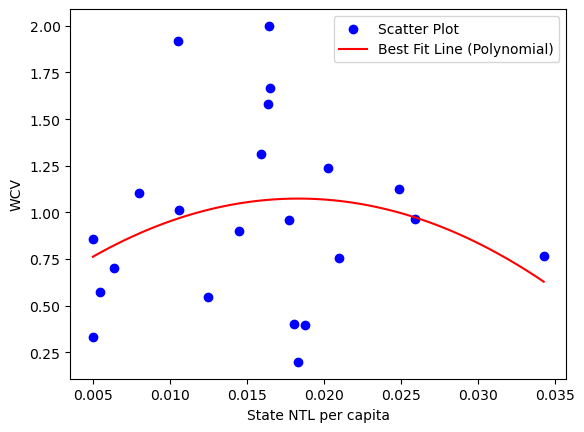

In [49]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc'], wcvc['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita")
plt.ylabel("WCV")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc'], wcvc['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc']), max(wcvc['state_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

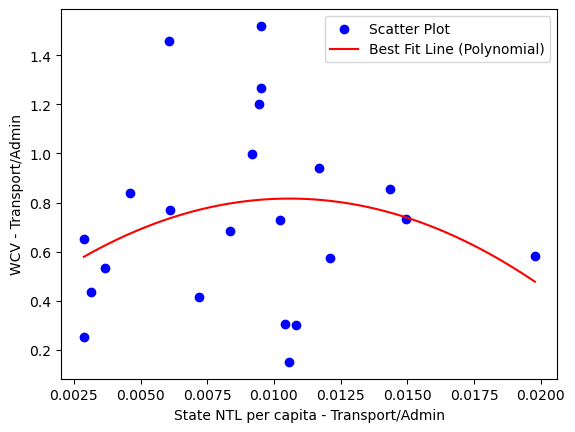

In [50]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita - Transport/Admin")
plt.ylabel("WCV - Transport/Admin")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm']), max(wcvc['state_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

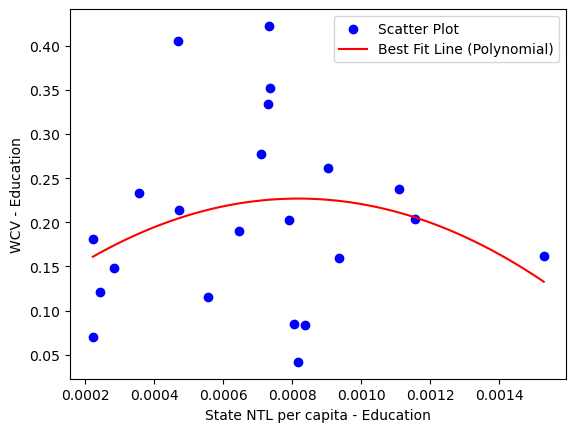

In [51]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc_edu'], wcvc['WCV_edu'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita - Education")
plt.ylabel("WCV - Education")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc_edu'], wcvc['WCV_edu'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_edu']), max(wcvc['state_ntl_pc_edu']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

### MA Test 3 - District Level

In [52]:
## Use mer from MA Test 2
mer_dist = mer.groupby(['District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_adm = mer.groupby(['District','District_code','State']).agg({'ntl_adm': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_edu = mer.groupby(['District','District_code','State']).agg({'ntl_edu': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_med = mer.groupby(['District','District_code','State']).agg({'ntl_med': 'sum', 'total_population': 'sum'}).reset_index()

mer_dist['avg_ntl'] = mer_dist['avg_ntl'].astype(float)
mer_dist_adm['ntl_adm'] = mer_dist_adm['ntl_adm'].astype(float)
mer_dist_edu['ntl_edu'] = mer_dist_edu['ntl_edu'].astype(float)
mer_dist_med['ntl_med'] = mer_dist_med['ntl_med'].astype(float)

#Rename columns
mer_dist = mer_dist.rename(columns={'avg_ntl': 'dist_ntl', 'total_population': 'dist_population'})
mer_dist_adm = mer_dist_adm.rename(columns={'ntl_adm': 'dist_ntl_adm', 'total_population': 'dist_population'})
mer_dist_edu = mer_dist_edu.rename(columns={'ntl_edu': 'dist_ntl_edu', 'total_population': 'dist_population'})
mer_dist_med = mer_dist_med.rename(columns={'ntl_med': 'dist_ntl_med', 'total_population': 'dist_population'})


# NTL per capita
mer_dist['dist_ntl_pc'] = mer_dist['dist_ntl']/mer_dist['dist_population']
mer_dist_adm['dist_ntl_pc_adm'] = mer_dist_adm['dist_ntl_adm']/mer_dist_adm['dist_population']
mer_dist_edu['dist_ntl_pc_edu'] = mer_dist_edu['dist_ntl_edu']/mer_dist_edu['dist_population']
mer_dist_med['dist_ntl_pc_med'] = mer_dist_med['dist_ntl_med']/mer_dist_med['dist_population']

mer_dist_adm = mer_dist_adm.drop(columns=['dist_population'])
mer_dist_edu = mer_dist_edu.drop(columns=['dist_population'])
mer_dist_med = mer_dist_med.drop(columns=['dist_population'])


mer_dist

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,27768.72298,5979790.00000,0.00464
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,35600.34826,8740691.00000,0.00407
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603
3,AGAR MALWA,0.00000,MADHYA PRADESH,7963.81906,504286.00000,0.01579
4,AGRA a,146.00000,UTTAR PRADESH,24309.54446,2669545.00000,0.00911
...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,478.78793,60945.00000,0.00786
592,rewa a,0.00000,UTTAR PRADESH,24145.74876,3116857.00000,0.00775
593,test dist,0.00000,ANDHRA PRADESH,59767.31391,2217985.00000,0.02695
594,viewnew,0.00000,ANDHRA PRADESH,73165.98410,3346483.00000,0.02186


In [55]:
# Assuming your DataFrame is named 'df'
total_population_sum = mer_dist['dist_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951895962.0


In [46]:
mer_all_dist = pd.merge(mer, mer_dist, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_adm, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_edu, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_med, on=['District','District_code','State'], how='outer')
mer_all_dist['pop_share'] = mer_all_dist['total_population']/mer_all_dist['dist_population']
mer_all_dist

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,total_population,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,dist_ntl,dist_population,dist_ntl_pc,dist_ntl_adm,dist_ntl_pc_adm,dist_ntl_edu,dist_ntl_pc_edu,dist_ntl_med,dist_ntl_pc_med,pop_share
0,843.89867,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,395.00000,2.13645,486.92953,37.63788,11.22385,1.23273,0.09529,0.02841,2472.77070,98192.00000,0.02518,1426.78870,0.01453,110.28557,0.00112,32.88785,0.00033,0.00402
1,710.82546,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,4252.00000,0.16717,410.14629,31.70282,9.45398,0.09646,0.00746,0.00222,2472.77070,98192.00000,0.02518,1426.78870,0.01453,110.28557,0.00112,32.88785,0.00033,0.04330
2,127.98762,138.2411499,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645540.00000,Rutland (RV),6496.00000,PROTHRAPUR,130.00000,0.98452,73.84886,5.70825,1.70224,0.56807,0.04391,0.01309,2472.77070,98192.00000,0.02518,1426.78870,0.01453,110.28557,0.00112,32.88785,0.00033,0.00132
3,41.11749,39.55495453,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645536.00000,Calicut (RV),6496.00000,PROTHRAPUR,3748.00000,0.01097,23.72479,1.83384,0.54686,0.00633,0.00049,0.00015,2472.77070,98192.00000,0.02518,1426.78870,0.01453,110.28557,0.00112,32.88785,0.00033,0.03817
4,40.48153,40.18182946,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645558.00000,Hut Bay (RV),6494.00000,LITTLE ANDAMAN,6028.00000,0.00672,23.35784,1.80548,0.53840,0.00387,0.00030,0.00009,2472.77070,98192.00000,0.02518,1426.78870,0.01453,110.28557,0.00112,32.88785,0.00033,0.06139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513677,0.95740,0.969286442,DAKSHIN DINAJPUR,19.00000,WESTBENGAL,19.00000,310.00000,DINAJPUR DAKSHIN,331.00000,2205.00000,Tapan,2205.00000,311497.00000,Sephalika Chandan,2877.00000,TAPAN,64.00000,0.01496,0.55242,0.04270,0.01273,0.00863,0.00067,0.00020,8314.81373,1706643.00000,0.00487,4797.64752,0.00281,370.84069,0.00022,110.58702,0.00006,0.00004
513678,0.85532,0.889836908,DAKSHIN DINAJPUR,19.00000,WESTBENGAL,19.00000,310.00000,DINAJPUR DAKSHIN,331.00000,2207.00000,Harirampur,2207.00000,311926.00000,Raghunathpur,2873.00000,HARIRAMPUR,35.00000,0.02444,0.49352,0.03815,0.01138,0.01410,0.00109,0.00033,8314.81373,1706643.00000,0.00487,4797.64752,0.00281,370.84069,0.00022,110.58702,0.00006,0.00002
513679,0.84774,0.833739281,DAKSHIN DINAJPUR,19.00000,WESTBENGAL,19.00000,310.00000,DINAJPUR DAKSHIN,331.00000,2206.00000,Bansihari,2206.00000,311682.00000,Saidpur,2871.00000,BANSIHARI,198.00000,0.00428,0.48914,0.03781,0.01127,0.00247,0.00019,0.00006,8314.81373,1706643.00000,0.00487,4797.64752,0.00281,370.84069,0.00022,110.58702,0.00006,0.00012
513680,0.64627,0.628328502,DAKSHIN DINAJPUR,19.00000,WESTBENGAL,19.00000,310.00000,DINAJPUR DAKSHIN,331.00000,2204.00000,Balurghat,2204.00000,311096.00000,Jotejagat,2870.00000,BALURGHAT,671.00000,0.00096,0.37290,0.02882,0.00860,0.00056,0.00004,0.00001,8314.81373,1706643.00000,0.00487,4797.64752,0.00281,370.84069,0.00022,110.58702,0.00006,0.00039


In [50]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['dist_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_adm(group):
    bar_y = group['dist_ntl_pc_adm'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_edu(group):
    bar_y = group['dist_ntl_pc_edu'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_med(group):
    bar_y = group['dist_ntl_pc_med'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv



# Calculate WCV for each state using groupby and apply
wcv = mer_all_dist.groupby(['District','District_code','State','dist_ntl_pc']).apply(calculate_wcv)
wcv_adm = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_adm)
wcv_edu = mer_all_dist.groupby(['District','District_code','State','dist_ntl_pc']).apply(calculate_wcv_edu)
wcv_med = mer_all_dist.groupby(['District','District_code','State','dist_ntl_pc']).apply(calculate_wcv_med)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')
wcv_adm = wcv_adm.reset_index(name='WCV_adm')
wcv_edu = wcv_edu.reset_index(name='WCV_edu')
wcv_med = wcv_med.reset_index(name='WCV_med')

wcv

,District,District_code,State,dist_ntl_pc,WCV
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,0.48234
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,0.18129
2,ADILABAD,532.00000,TELANGANA,0.02603,0.34807
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.07655
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,0.31477
...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,0.09979
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.07012
593,test dist,0.00000,ANDHRA PRADESH,0.02695,0.35656
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,0.15704


In [60]:
wcvc = pd.merge(wcv, mer_dist, on=['District','District_code','State','dist_ntl_pc'], how='left')
wcvc = pd.merge(wcvc, mer_dist_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_med, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_med, on=['District','District_code','State'], how='left')
wcvc

,District,District_code,State,dist_ntl_pc_x,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,dist_ntl_pc_y,WCV_edu,dist_ntl_med,dist_ntl_pc_med,dist_ntl_pc,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,0.48234,27768.72298,5979790.00000,16022.55316,0.00268,0.36639,1238.48504,0.00021,0.00464,0.10186,369.32402,0.00006,0.00464,0.05563
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,0.18129,35600.34826,8740691.00000,20541.40095,0.00235,0.13771,1587.77553,0.00018,0.00407,0.03829,473.48463,0.00005,0.00407,0.02091
2,ADILABAD,532.00000,TELANGANA,0.02603,0.34807,14509.40529,557344.00000,8371.92685,0.01502,0.26439,647.11948,0.00116,0.02603,0.07351,192.97509,0.00035,0.02603,0.04014
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.07655,7963.81906,504286.00000,4595.12360,0.00911,0.05815,355.18633,0.00070,0.01579,0.01617,105.91879,0.00021,0.01579,0.00883
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,0.31477,24309.54446,2669545.00000,14026.60715,0.00525,0.23910,1084.20568,0.00041,0.00911,0.06648,323.31694,0.00012,0.00911,0.03630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,0.09979,478.78793,60945.00000,276.26063,0.00453,0.07580,21.35394,0.00035,0.00786,0.02107,6.36788,0.00010,0.00786,0.01151
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.07012,24145.74876,3116857.00000,13932.09703,0.00447,0.05326,1076.90039,0.00035,0.00775,0.01481,321.13846,0.00010,0.00775,0.00809
593,test dist,0.00000,ANDHRA PRADESH,0.02695,0.35656,59767.31391,2217985.00000,34485.74013,0.01555,0.27084,2665.62220,0.00120,0.02695,0.07530,794.90528,0.00036,0.02695,0.04112
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,0.15704,73165.98410,3346483.00000,42216.77283,0.01262,0.11929,3263.20289,0.00098,0.02186,0.03317,973.10759,0.00029,0.02186,0.01811


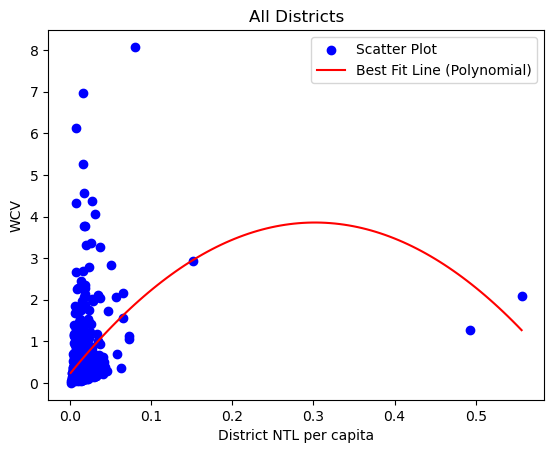

In [61]:
# Create a scatterplot
plt.scatter(wcv['dist_ntl_pc'], wcv['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcv['dist_ntl_pc'], wcv['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcv['dist_ntl_pc']), max(wcv['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

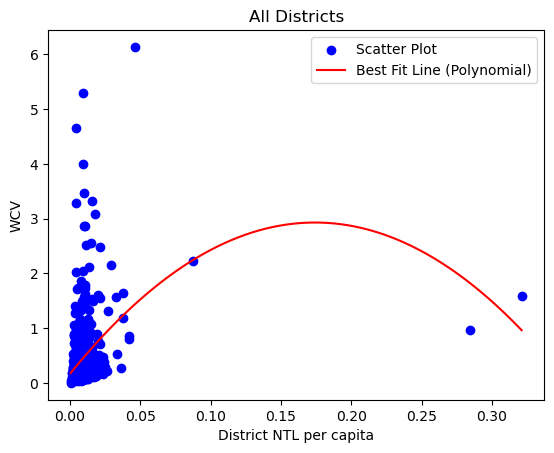

In [62]:
# Create a scatterplot
plt.scatter(wcvc['dist_ntl_pc_adm'], wcvc['WCV_adm'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['dist_ntl_pc_adm'], wcvc['WCV_adm'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['dist_ntl_pc_adm']), max(wcvc['dist_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

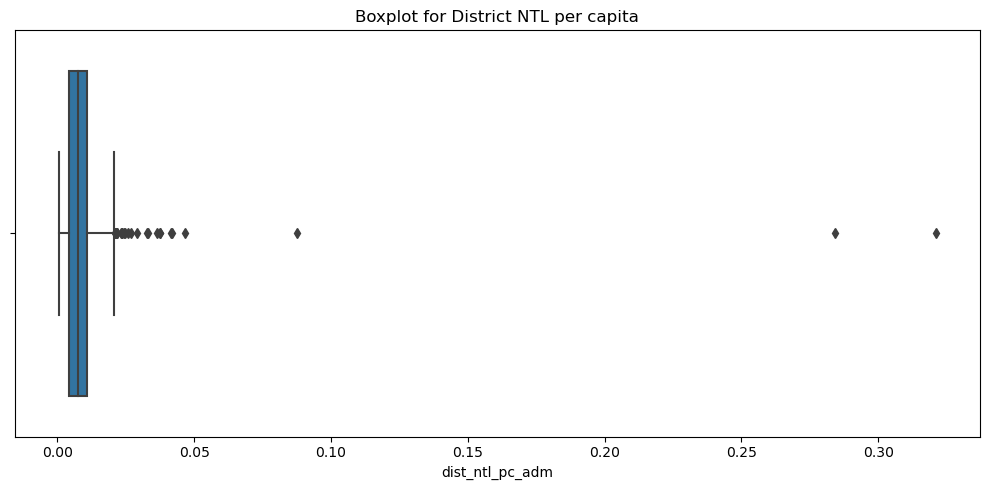

The upper whisker value is: 0.0209


In [63]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='dist_ntl_pc_adm', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = wcvc['dist_ntl_pc_adm'].quantile(0.25)
q3 = wcvc['dist_ntl_pc_adm'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

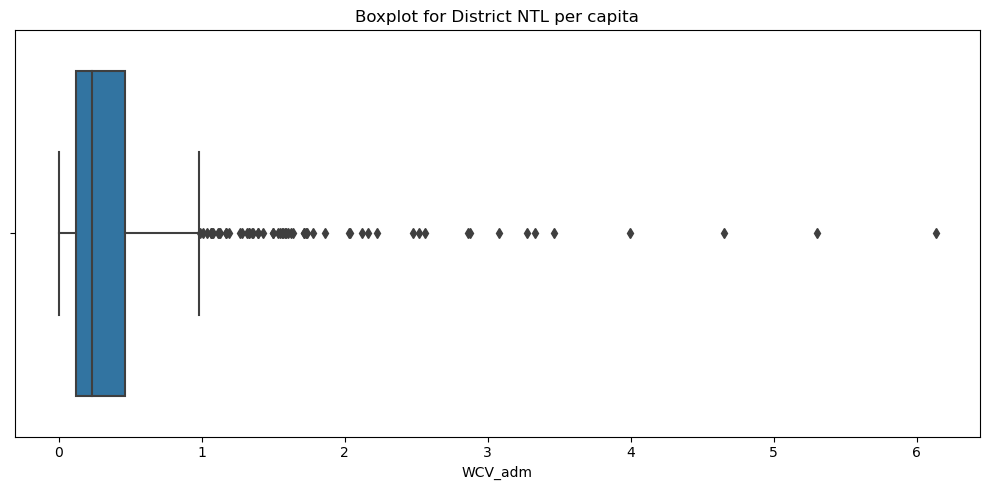

The upper whisker value is: 0.9811


In [65]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='WCV_adm', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = wcvc['WCV_adm'].quantile(0.25)
q3 = wcvc['WCV_adm'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

In [66]:
wcvc = wcvc[wcvc['dist_ntl_pc_adm'] <= 0.0209]
wcvc = wcvc[wcvc['WCV_adm'] <= 0.9811]
wcvc

,District,District_code,State,dist_ntl_pc_x,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,dist_ntl_pc_y,WCV_edu,dist_ntl_med,dist_ntl_pc_med,dist_ntl_pc,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,0.48234,27768.72298,5979790.00000,16022.55316,0.00268,0.36639,1238.48504,0.00021,0.00464,0.10186,369.32402,0.00006,0.00464,0.05563
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,0.18129,35600.34826,8740691.00000,20541.40095,0.00235,0.13771,1587.77553,0.00018,0.00407,0.03829,473.48463,0.00005,0.00407,0.02091
2,ADILABAD,532.00000,TELANGANA,0.02603,0.34807,14509.40529,557344.00000,8371.92685,0.01502,0.26439,647.11948,0.00116,0.02603,0.07351,192.97509,0.00035,0.02603,0.04014
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.07655,7963.81906,504286.00000,4595.12360,0.00911,0.05815,355.18633,0.00070,0.01579,0.01617,105.91879,0.00021,0.01579,0.00883
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,0.31477,24309.54446,2669545.00000,14026.60715,0.00525,0.23910,1084.20568,0.00041,0.00911,0.06648,323.31694,0.00012,0.00911,0.03630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,0.09979,478.78793,60945.00000,276.26063,0.00453,0.07580,21.35394,0.00035,0.00786,0.02107,6.36788,0.00010,0.00786,0.01151
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.07012,24145.74876,3116857.00000,13932.09703,0.00447,0.05326,1076.90039,0.00035,0.00775,0.01481,321.13846,0.00010,0.00775,0.00809
593,test dist,0.00000,ANDHRA PRADESH,0.02695,0.35656,59767.31391,2217985.00000,34485.74013,0.01555,0.27084,2665.62220,0.00120,0.02695,0.07530,794.90528,0.00036,0.02695,0.04112
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,0.15704,73165.98410,3346483.00000,42216.77283,0.01262,0.11929,3263.20289,0.00098,0.02186,0.03317,973.10759,0.00029,0.02186,0.01811


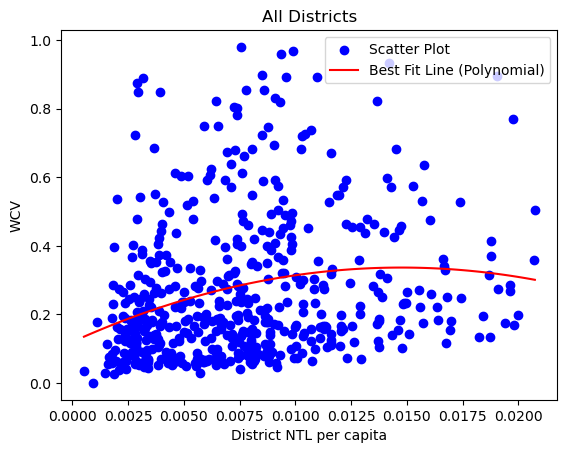

In [67]:
# Create a scatterplot
plt.scatter(wcvc['dist_ntl_pc_adm'], wcvc['WCV_adm'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['dist_ntl_pc_adm'], wcvc['WCV_adm'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['dist_ntl_pc_adm']), max(wcvc['dist_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

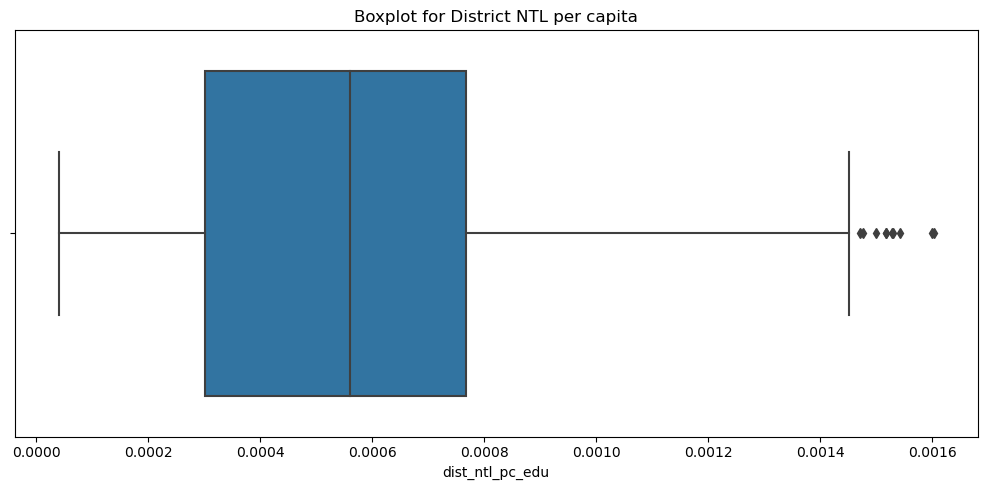

The upper whisker value is: 0.0190


In [68]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='dist_ntl_pc_edu', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = wcvc['dist_ntl_pc_adm'].quantile(0.25)
q3 = wcvc['dist_ntl_pc_adm'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

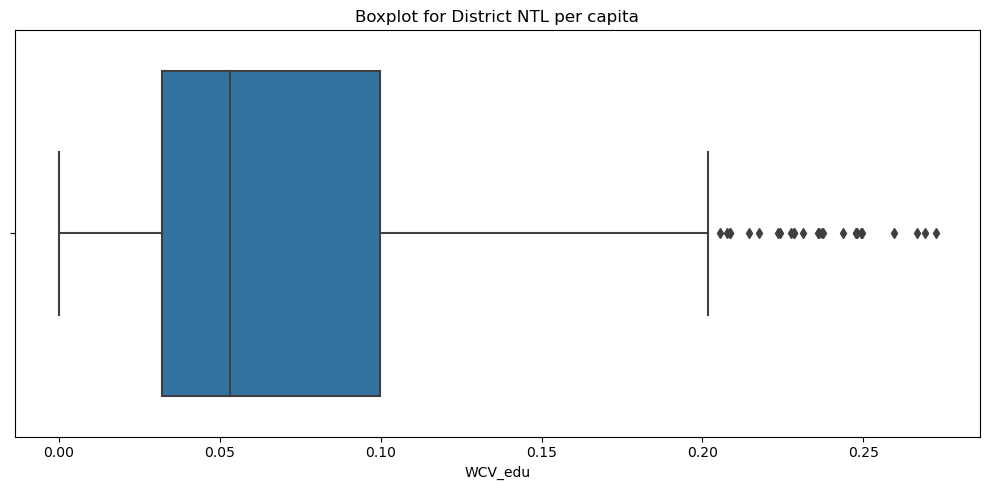

The upper whisker value is: 0.7255


In [69]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='WCV_edu', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = wcvc['WCV_adm'].quantile(0.25)
q3 = wcvc['WCV_adm'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

In [70]:
wcvc = wcvc[wcvc['dist_ntl_pc_edu'] <= 0.0190]
wcvc = wcvc[wcvc['WCV_edu'] <= 0.7255]
wcvc

,District,District_code,State,dist_ntl_pc_x,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,dist_ntl_pc_y,WCV_edu,dist_ntl_med,dist_ntl_pc_med,dist_ntl_pc,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,0.48234,27768.72298,5979790.00000,16022.55316,0.00268,0.36639,1238.48504,0.00021,0.00464,0.10186,369.32402,0.00006,0.00464,0.05563
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,0.18129,35600.34826,8740691.00000,20541.40095,0.00235,0.13771,1587.77553,0.00018,0.00407,0.03829,473.48463,0.00005,0.00407,0.02091
2,ADILABAD,532.00000,TELANGANA,0.02603,0.34807,14509.40529,557344.00000,8371.92685,0.01502,0.26439,647.11948,0.00116,0.02603,0.07351,192.97509,0.00035,0.02603,0.04014
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.07655,7963.81906,504286.00000,4595.12360,0.00911,0.05815,355.18633,0.00070,0.01579,0.01617,105.91879,0.00021,0.01579,0.00883
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,0.31477,24309.54446,2669545.00000,14026.60715,0.00525,0.23910,1084.20568,0.00041,0.00911,0.06648,323.31694,0.00012,0.00911,0.03630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,0.09979,478.78793,60945.00000,276.26063,0.00453,0.07580,21.35394,0.00035,0.00786,0.02107,6.36788,0.00010,0.00786,0.01151
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.07012,24145.74876,3116857.00000,13932.09703,0.00447,0.05326,1076.90039,0.00035,0.00775,0.01481,321.13846,0.00010,0.00775,0.00809
593,test dist,0.00000,ANDHRA PRADESH,0.02695,0.35656,59767.31391,2217985.00000,34485.74013,0.01555,0.27084,2665.62220,0.00120,0.02695,0.07530,794.90528,0.00036,0.02695,0.04112
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,0.15704,73165.98410,3346483.00000,42216.77283,0.01262,0.11929,3263.20289,0.00098,0.02186,0.03317,973.10759,0.00029,0.02186,0.01811


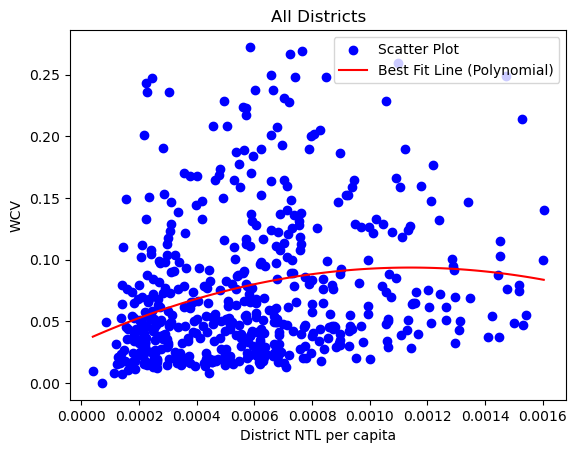

In [72]:
# Create a scatterplot
plt.scatter(wcvc['dist_ntl_pc_edu'], wcvc['WCV_edu'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['dist_ntl_pc_edu'], wcvc['WCV_edu'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['dist_ntl_pc_edu']), max(wcvc['dist_ntl_pc_edu']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [27]:
ssw = pd.read_excel('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/WCV_test.xlsx',sheet_name="dist_names")
ssw

,District,District_code,State,dist_ntl_pc,WCV
0,WEST KARBI ANGLONG,0,ASSAM,0.55655,2.08778
1,KARBI ANGLONG,314,ASSAM,0.49274,1.27826
2,JAISALMER,114,RAJASTHAN,0.15157,2.92952
3,NARAYANPUR,415,CHHATTISGARH,0.08055,8.07844
4,JAMNAGAR,477,GUJARAT,0.07266,1.05797
...,...,...,...,...,...
591,New District,0,UTTAR PRADESH,0.00271,0.14903
592,KOZHIKODE,591,KERALA,0.00256,0.03954
593,SOUTH SALMARA MANCACHAR,0,ASSAM,0.00189,0.23468
594,west pgs,0,WESTBENGAL,0.00162,0.00000


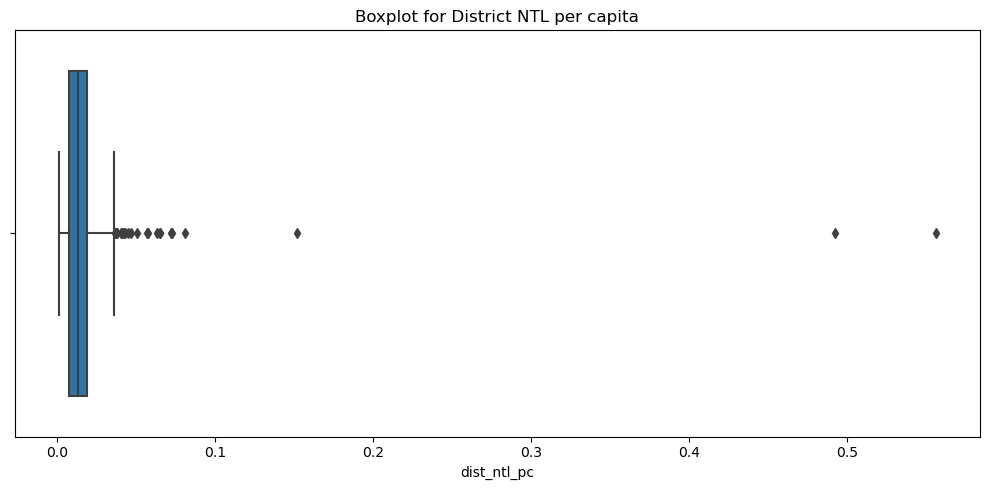

The upper whisker value is: 0.0362


In [28]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=ssw, x='dist_ntl_pc', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = ssw['dist_ntl_pc'].quantile(0.25)
q3 = ssw['dist_ntl_pc'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

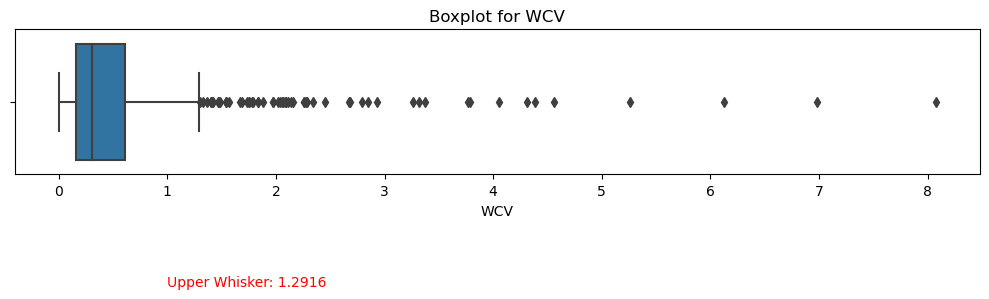

The upper whisker value is: 1.2916


In [29]:
# Create a boxplot for WCV
plt.figure(figsize=(10, 5))
sns.boxplot(data=ssw, x='WCV', orient='h')
plt.title('Boxplot for WCV')

# Calculate whisker values
q1 = ssw['WCV'].quantile(0.25)
q3 = ssw['WCV'].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

# Add whisker values to the plot
plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker:.4f}")

In [30]:
ssw = ssw[ssw['dist_ntl_pc'] <= 0.0362]
ssw = ssw[ssw['WCV'] <= 1.2916]
ssw

,District,District_code,State,dist_ntl_pc,WCV
25,JAYASHANKAR BHUPALAPALLY,0,TELANGANA,0.03595,0.66451
26,PUNE,521,MAHARASHTRA,0.03586,0.47291
29,RAJANNA SIRCILLA,0,TELANGANA,0.03460,0.26036
30,SANGAREDDY,0,TELANGANA,0.03431,0.22203
31,MANCHERIAL,0,TELANGANA,0.03427,1.01516
...,...,...,...,...,...
591,New District,0,UTTAR PRADESH,0.00271,0.14903
592,KOZHIKODE,591,KERALA,0.00256,0.03954
593,SOUTH SALMARA MANCACHAR,0,ASSAM,0.00189,0.23468
594,west pgs,0,WESTBENGAL,0.00162,0.00000


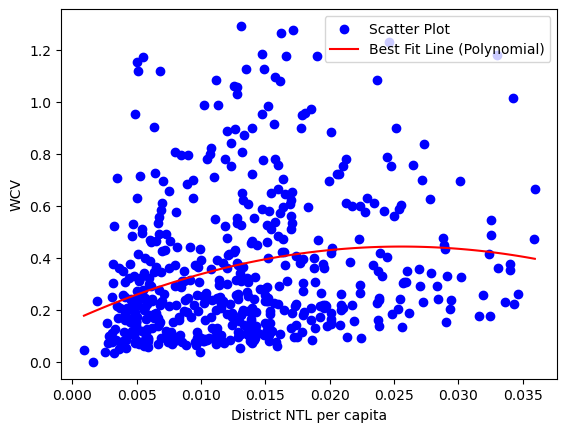

In [32]:
# Create a scatterplot
plt.scatter(ssw['dist_ntl_pc'], ssw['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
# plt.title("Outlier Districts Dropped")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ssw['dist_ntl_pc'], ssw['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ssw['dist_ntl_pc']), max(ssw['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

### MA Test 4 - State from Dist
Using districts from MA test 3 without outliers

In [53]:
# mer2 = pd.merge(mer, ssd, on=['District','District_code'],how='left')
# mer2
merged = mer.merge(ssw, on=['District', 'District_code','State'], how='left', indicator=True)

# Filter rows where the indicator column is 'both'
filtered_mer = merged[merged['_merge'] == 'both']

# Drop the indicator column
mer2 = filtered_mer.drop(columns=['_merge'])
mer2

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,total_population,ntl_pc,dist_ntl_pc,WCV
0,843.89867,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,395.00000,2.13645,0.02518,0.89897
1,710.82546,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,4252.00000,0.16717,0.02518,0.89897
2,487.54864,486.7847595,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,1091.00000,0.44688,0.01698,0.50904
3,158.15380,179.2008972,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645376.00000,Udhaygarh (RV),6497.00000,RANGAT,146.00000,1.08325,0.01698,0.50904
4,127.98762,138.2411499,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645540.00000,Rutland (RV),6496.00000,PROTHRAPUR,130.00000,0.98452,0.02518,0.89897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513677,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,13250.00000,0.00000,0.00391,0.07905
513678,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,5010.00000,0.00001,0.00391,0.07905
513679,0.03043,0.031453712,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I,600.00000,0.00005,0.00311,0.24755
513680,0.02567,0.025974214,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,4439.00000,0.00001,0.00391,0.07905


In [54]:
mer_state2 = mer2.groupby('State').agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_state2['avg_ntl'] = mer_state2['avg_ntl'].astype(float)
#Rename columns
mer_state2 = mer_state2.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population'})

# NTL per capita
mer_state2['state_ntl_pc'] = mer_state2['state_ntl']/mer_state2['state_population']
mer_state2

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,4255.10544,202987.00000,0.02096
1,ANDHRA PRADESH,702393.05979,38907953.00000,0.01805
2,ASSAM,160963.53159,25508194.00000,0.00631
3,BIHAR,557436.47933,114978367.00000,0.00485
4,CHHATTISGARH,303527.35819,19649525.00000,0.01545
5,GOA,18927.91919,1035210.00000,0.01828
6,GUJARAT,544777.93859,35598685.00000,0.01530
7,HARYANA,259827.79734,16042524.00000,0.01620
8,JHARKHAND,328610.51784,30710972.00000,0.01070
9,KARNATAKA,501594.26482,36548445.00000,0.01372


In [55]:
# Assuming your DataFrame is named 'df'
total_population_sum = mer_state2['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 870571562.0


In [56]:
mer_all2 = pd.merge(mer2, mer_state2, on="State", how='outer')
mer_all2['pop_share'] = mer_all2['total_population']/mer_all2['state_population']
mer_all2

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,total_population,ntl_pc,dist_ntl_pc,WCV,state_ntl,state_population,state_ntl_pc,pop_share
0,843.89867,856.989624,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,395.00000,2.13645,0.02518,0.89897,4255.10544,202987.00000,0.02096,0.00195
1,710.82546,727.822937,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,4252.00000,0.16717,0.02518,0.89897,4255.10544,202987.00000,0.02096,0.02095
2,487.54864,486.7847595,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,1091.00000,0.44688,0.01698,0.50904,4255.10544,202987.00000,0.02096,0.00537
3,158.15380,179.2008972,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645376.00000,Udhaygarh (RV),6497.00000,RANGAT,146.00000,1.08325,0.01698,0.50904,4255.10544,202987.00000,0.02096,0.00072
4,127.98762,138.2411499,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645540.00000,Rutland (RV),6496.00000,PROTHRAPUR,130.00000,0.98452,0.02518,0.89897,4255.10544,202987.00000,0.02096,0.00064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451635,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,13250.00000,0.00000,0.00391,0.07905,406646.84682,81566446.00000,0.00499,0.00016
451636,0.04733,0.049706303,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,5010.00000,0.00001,0.00391,0.07905,406646.84682,81566446.00000,0.00499,0.00006
451637,0.03043,0.031453712,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I,600.00000,0.00005,0.00311,0.24755,406646.84682,81566446.00000,0.00499,0.00001
451638,0.02567,0.025974214,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,4439.00000,0.00001,0.00391,0.07905,406646.84682,81566446.00000,0.00499,0.00005


In [57]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
wcv = mer_all2.groupby('State').apply(calculate_wcv)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')

wcv

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.75686
1,ANDHRA PRADESH,0.40401
2,ASSAM,0.56121
3,BIHAR,0.44411
4,CHHATTISGARH,0.53085
5,GOA,0.19884
6,GUJARAT,0.25246
7,HARYANA,0.44332
8,JHARKHAND,0.34734
9,KARNATAKA,0.26768


In [58]:
wcvs = pd.merge(wcv, mer_state2, on="State", how='left')
wcvs

,State,WCV,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,0.75686,4255.10544,202987.00000,0.02096
1,ANDHRA PRADESH,0.40401,702393.05979,38907953.00000,0.01805
2,ASSAM,0.56121,160963.53159,25508194.00000,0.00631
3,BIHAR,0.44411,557436.47933,114978367.00000,0.00485
4,CHHATTISGARH,0.53085,303527.35819,19649525.00000,0.01545
5,GOA,0.19884,18927.91919,1035210.00000,0.01828
6,GUJARAT,0.25246,544777.93859,35598685.00000,0.01530
7,HARYANA,0.44332,259827.79734,16042524.00000,0.01620
8,JHARKHAND,0.34734,328610.51784,30710972.00000,0.01070
9,KARNATAKA,0.26768,501594.26482,36548445.00000,0.01372


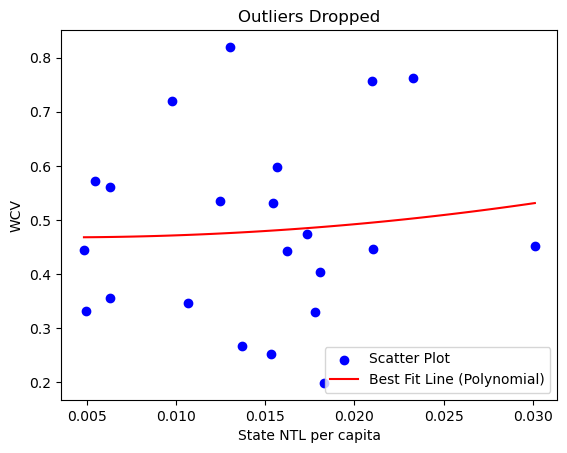

In [64]:
# Create a scatterplot
plt.scatter(wcvs['state_ntl_pc'], wcvs['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita")
plt.ylabel("WCV")
plt.title("Outliers Dropped")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvs['state_ntl_pc'], wcvs['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvs['state_ntl_pc']), max(wcvs['state_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

### Sub-Dist Check - MA

In [175]:
sub1 = mer_all.groupby(['State_code','State','State_census_code', 'District_census_code',
                      'District', 'District_code', 'SubDistric', 'Subdistrict',	
                      ]).agg(
    avg_ntl=('avg_ntl', 'sum'),
    pop=('total_population', 'sum')
).reset_index()

sub1['ntl_pc'] = sub1['avg_ntl']/sub1['pop']
sub1

,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,avg_ntl,pop,ntl_pc
0,3.00000,PUNJABB,3.00000,27.00000,AMRITSAR,49.00000,257.00000,Amritsar- II,16231.92600,368952.00000,0.04399
1,3.00000,PUNJABB,3.00000,27.00000,AMRITSAR,49.00000,258.00000,Baba Bakala,5370.96243,372005.00000,0.01444
2,3.00000,PUNJABB,3.00000,27.00000,AMRITSAR,49.00000,6566.00000,amritt,93.77086,4920.00000,0.01906
3,3.00000,PUNJABB,3.00000,28.00000,BATHINDA,46.00000,244.00000,Rampura Phul,5420.42597,188429.00000,0.02877
4,3.00000,PUNJABB,3.00000,28.00000,BATHINDA,46.00000,245.00000,Bathinda,13241.39128,499411.00000,0.02651
...,...,...,...,...,...,...,...,...,...,...,...
5422,36.00000,TELANGANA,0.00000,699.00000,KUMURAM BHEEM ASIFABAD,0.00000,6314.00000,Chintalamanepally,692.26881,28589.00000,0.02421
5423,36.00000,TELANGANA,0.00000,700.00000,MEDCHAL MALKAJGIRI,0.00000,4519.00000,Medchal,3205.80124,46534.00000,0.06889
5424,36.00000,TELANGANA,0.00000,700.00000,MEDCHAL MALKAJGIRI,0.00000,4520.00000,Shamirpet,3814.93929,76961.00000,0.04957
5425,36.00000,TELANGANA,0.00000,700.00000,MEDCHAL MALKAJGIRI,0.00000,4522.00000,Keesara,2569.31092,49294.00000,0.05212


In [176]:
sub_merge = pd.merge(sub1,mer_state, on='State', how='left')
sub_merge['pop_share'] = sub_merge['pop']/sub_merge['state_population']
sub_merge

,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,avg_ntl,pop,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
0,3.00000,PUNJABB,3.00000,27.00000,AMRITSAR,49.00000,257.00000,Amritsar- II,16231.92600,368952.00000,0.04399,507686.28707,20423125.00000,0.02486,0.01807
1,3.00000,PUNJABB,3.00000,27.00000,AMRITSAR,49.00000,258.00000,Baba Bakala,5370.96243,372005.00000,0.01444,507686.28707,20423125.00000,0.02486,0.01821
2,3.00000,PUNJABB,3.00000,27.00000,AMRITSAR,49.00000,6566.00000,amritt,93.77086,4920.00000,0.01906,507686.28707,20423125.00000,0.02486,0.00024
3,3.00000,PUNJABB,3.00000,28.00000,BATHINDA,46.00000,244.00000,Rampura Phul,5420.42597,188429.00000,0.02877,507686.28707,20423125.00000,0.02486,0.00923
4,3.00000,PUNJABB,3.00000,28.00000,BATHINDA,46.00000,245.00000,Bathinda,13241.39128,499411.00000,0.02651,507686.28707,20423125.00000,0.02486,0.02445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,36.00000,TELANGANA,0.00000,699.00000,KUMURAM BHEEM ASIFABAD,0.00000,6314.00000,Chintalamanepally,692.26881,28589.00000,0.02421,735375.67884,21453903.00000,0.03428,0.00133
5423,36.00000,TELANGANA,0.00000,700.00000,MEDCHAL MALKAJGIRI,0.00000,4519.00000,Medchal,3205.80124,46534.00000,0.06889,735375.67884,21453903.00000,0.03428,0.00217
5424,36.00000,TELANGANA,0.00000,700.00000,MEDCHAL MALKAJGIRI,0.00000,4520.00000,Shamirpet,3814.93929,76961.00000,0.04957,735375.67884,21453903.00000,0.03428,0.00359
5425,36.00000,TELANGANA,0.00000,700.00000,MEDCHAL MALKAJGIRI,0.00000,4522.00000,Keesara,2569.31092,49294.00000,0.05212,735375.67884,21453903.00000,0.03428,0.00230


In [147]:
# pd = sub_merge[sub_merge['State']=='PUNJABB']

In [177]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
wcv = sub_merge.groupby('State').apply(calculate_wcv)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')

wcv

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.04845
1,ANDHRA PRADESH,0.17875
2,ASSAM,0.19657
3,BIHAR,0.02912
4,CHHATTISGARH,0.14832
5,GOA,0.03036
6,GUJARAT,0.14623
7,HARYANA,0.07105
8,JHARKHAND,0.09931
9,KERALA,0.04760


### Dist Check - MA

In [178]:
dist1 = mer_all.groupby(['State_code','State','State_census_code', 'District_census_code',
                       'District_code'
                      ]).agg(
    avg_ntl=('avg_ntl', 'sum'),
    pop=('total_population', 'sum')
).reset_index()

dist1['ntl_pc'] = dist1['avg_ntl']/dist1['pop']
dist1

,State_code,State,State_census_code,District_census_code,District_code,avg_ntl,pop,ntl_pc
0,3.00000,PUNJABB,3.00000,27.00000,49.00000,21696.65929,745877.00000,0.02909
1,3.00000,PUNJABB,3.00000,28.00000,46.00000,27032.59414,934661.00000,0.02892
2,3.00000,PUNJABB,3.00000,29.00000,45.00000,38241.23314,529704.00000,0.07219
3,3.00000,PUNJABB,3.00000,30.00000,40.00000,8917.87675,442840.00000,0.02014
4,3.00000,PUNJABB,3.00000,31.00000,43.00000,42457.64073,1034218.00000,0.04105
...,...,...,...,...,...,...,...,...
561,36.00000,TELANGANA,0.00000,696.00000,0.00000,26100.15373,788562.00000,0.03310
562,36.00000,TELANGANA,0.00000,697.00000,0.00000,19060.73820,560056.00000,0.03403
563,36.00000,TELANGANA,0.00000,698.00000,0.00000,26297.48165,966250.00000,0.02722
564,36.00000,TELANGANA,0.00000,699.00000,0.00000,15370.69579,439267.00000,0.03499


In [180]:
dist_merge = pd.merge(dist1, mer_state, on='State',how='left')
dist_merge['pop_share'] = dist_merge['pop']/dist_merge['state_population']
dist_merge

,State_code,State,State_census_code,District_census_code,District_code,avg_ntl,pop,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
0,3.00000,PUNJABB,3.00000,27.00000,49.00000,21696.65929,745877.00000,0.02909,507686.28707,20423125.00000,0.02486,0.03652
1,3.00000,PUNJABB,3.00000,28.00000,46.00000,27032.59414,934661.00000,0.02892,507686.28707,20423125.00000,0.02486,0.04576
2,3.00000,PUNJABB,3.00000,29.00000,45.00000,38241.23314,529704.00000,0.07219,507686.28707,20423125.00000,0.02486,0.02594
3,3.00000,PUNJABB,3.00000,30.00000,40.00000,8917.87675,442840.00000,0.02014,507686.28707,20423125.00000,0.02486,0.02168
4,3.00000,PUNJABB,3.00000,31.00000,43.00000,42457.64073,1034218.00000,0.04105,507686.28707,20423125.00000,0.02486,0.05064
...,...,...,...,...,...,...,...,...,...,...,...,...
561,36.00000,TELANGANA,0.00000,696.00000,0.00000,26100.15373,788562.00000,0.03310,735375.67884,21453903.00000,0.03428,0.03676
562,36.00000,TELANGANA,0.00000,697.00000,0.00000,19060.73820,560056.00000,0.03403,735375.67884,21453903.00000,0.03428,0.02611
563,36.00000,TELANGANA,0.00000,698.00000,0.00000,26297.48165,966250.00000,0.02722,735375.67884,21453903.00000,0.03428,0.04504
564,36.00000,TELANGANA,0.00000,699.00000,0.00000,15370.69579,439267.00000,0.03499,735375.67884,21453903.00000,0.03428,0.02047


In [181]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
wcv = dist_merge.groupby('State').apply(calculate_wcv)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')

wcv

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.02822
1,ANDHRA PRADESH,0.03786
2,ASSAM,0.17277
3,BIHAR,0.01731
4,CHHATTISGARH,0.05109
5,GOA,0.00188
6,GUJARAT,0.09187
7,HARYANA,0.04227
8,JHARKHAND,0.05279
9,KERALA,0.03667


### Sub-Dist Check

In [216]:
ntlsi = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_Subdist_ntl_20.csv')
pops = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/GPW/IN_Subdist.csv')


In [225]:
ntls = ntlsi[['NAME',"DISTRICT",'STATE_UT','avg_ntl','med_ntl','pop']]
ntls["ntl_pc"]= ntls['avg_ntl']/ntls['pop']
ntls

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_88112/3331218473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ntls["ntl_pc"]= ntls['avg_ntl']/ntls['pop']


,NAME,DISTRICT,STATE_UT,avg_ntl,med_ntl,pop,ntl_pc
0,A.Konduru,Krishna,Andhra Pradesh,598.47332,653.50201,52165.50781,0.01147
1,Aali,Kendrapara,Odisha,734.99286,746.66901,190835.34380,0.00385
2,Aalo,West Siang,Arunachal Pradesh,666.48617,732.19724,30835.29297,0.02161
3,Abdasa,Kachchh,Gujarat,6373.40763,6523.57959,168441.70310,0.03784
4,Abhanpur,Raipur,Chhattisgarh,3283.16350,3876.45264,579391.56250,0.00567
...,...,...,...,...,...,...,...
6069,Zira,Firozpur,Punjab,5974.54508,5687.56934,353720.87500,0.01689
6070,Ziradei,Siwan,Bihar,844.57757,905.96701,221637.78130,0.00381
6071,Ziro (Sadar),Lower Subansiri,Arunachal Pradesh,481.41620,558.55493,31808.65039,0.01513
6072,Zuketsa,Phek,Nagaland,38.11105,40.11452,4462.01514,0.00854


In [ ]:
# merti = pd.merge(ntls, pops, on=['NAME',"DISTRICT",'STATE_UT'],how='left')
# merti["ntl_pc"]= merti['avg_ntl']/merti['pop']
# merti

In [227]:
mer_state = ntls.groupby('STATE_UT').agg({'avg_ntl': 'sum', 'pop': 'sum'}).reset_index()
mer_state['avg_ntl'] = mer_state['avg_ntl'].astype(float)
#Rename columns
mer_state = mer_state.rename(columns={'avg_ntl': 'state_ntl', 'pop': 'state_population'})

# NTL per capita
mer_state['state_ntl_pc'] = mer_state['state_ntl']/mer_state['state_population']
mer_state

,STATE_UT,state_ntl,state_population,state_ntl_pc
0,Andaman & Nicobar Islands,10445.20276,367722.00834,0.02841
1,Andhra Pradesh,1182072.97331,94357276.56451,0.01253
2,Arunachal Pradesh,128002.71827,1793512.43020,0.07137
3,Assam,284343.94828,36328829.11594,0.00783
4,Bihar,670184.35654,129115432.63285,0.00519
5,Chandigarh,12210.17155,747710.25000,0.01633
6,Chhattisgarh,444218.42890,30214750.15005,0.01470
7,Dadra & Nagar Haveli,7177.77804,539086.25000,0.01331
8,Daman & Diu,2944.69234,219844.51568,0.01339
9,Delhi,195181.13672,19137457.04697,0.01020


In [228]:
# Assuming your DataFrame is named 'df'
total_population_sum = mer_state['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 1414422708.5718083


In [229]:
merti_all = pd.merge(ntls, mer_state, on="STATE_UT", how='left')
merti_all['pop_share'] = merti_all['pop']/merti_all['state_population']
merti_all

,NAME,DISTRICT,STATE_UT,avg_ntl,med_ntl,pop,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
0,A.Konduru,Krishna,Andhra Pradesh,598.47332,653.50201,52165.50781,0.01147,1182072.97331,94357276.56451,0.01253,0.00055
1,Aali,Kendrapara,Odisha,734.99286,746.66901,190835.34380,0.00385,516502.36423,48005813.15039,0.01076,0.00398
2,Aalo,West Siang,Arunachal Pradesh,666.48617,732.19724,30835.29297,0.02161,128002.71827,1793512.43020,0.07137,0.01719
3,Abdasa,Kachchh,Gujarat,6373.40763,6523.57959,168441.70310,0.03784,980976.45690,70739705.56582,0.01387,0.00238
4,Abhanpur,Raipur,Chhattisgarh,3283.16350,3876.45264,579391.56250,0.00567,444218.42890,30214750.15005,0.01470,0.01918
...,...,...,...,...,...,...,...,...,...,...,...
6069,Zira,Firozpur,Punjab,5974.54508,5687.56934,353720.87500,0.01689,447933.55518,31607086.58664,0.01417,0.01119
6070,Ziradei,Siwan,Bihar,844.57757,905.96701,221637.78130,0.00381,670184.35654,129115432.63285,0.00519,0.00172
6071,Ziro (Sadar),Lower Subansiri,Arunachal Pradesh,481.41620,558.55493,31808.65039,0.01513,128002.71827,1793512.43020,0.07137,0.01774
6072,Zuketsa,Phek,Nagaland,38.11105,40.11452,4462.01514,0.00854,34335.82384,1983522.53774,0.01731,0.00225


In [230]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
wcv = merti_all.groupby('STATE_UT').apply(calculate_wcv)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')

wcv

,STATE_UT,WCV
0,Andaman & Nicobar Islands,0.13903
1,Andhra Pradesh,0.05456
2,Arunachal Pradesh,0.58232
3,Assam,0.09213
4,Bihar,0.03317
5,Chandigarh,0.00000
6,Chhattisgarh,0.06085
7,Dadra & Nagar Haveli,0.00000
8,Daman & Diu,0.00868
9,Delhi,0.06290


### Dist Check

In [239]:
ntldi = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/VIIRS_Monthly_Tiled/2020/IN_dist_ntl_20.csv')
ntld = ntldi[['dtname','stname','Dist_LGD', 'State_LGD','avg_ntl','med_ntl','pop']]
ntld["ntl_pc"]= ntld['avg_ntl']/ntld['pop']
ntld


/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_88112/2924044767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ntld["ntl_pc"]= ntld['avg_ntl']/ntld['pop']


,dtname,stname,Dist_LGD,State_LGD,avg_ntl,med_ntl,pop,ntl_pc
0,Morbi,GUJARAT,673,24,29889.78223,31624.54297,1086986.25000,0.02750
1,Ahmadabad,GUJARAT,438,24,89373.88216,92518.10547,8537367.00000,0.01047
2,Anand,GUJARAT,440,24,20144.88029,20893.21875,2760602.75000,0.00730
3,Devbhumi Dwarka,GUJARAT,674,24,22272.94458,24171.54785,901803.56250,0.02470
4,Jamnagar,GUJARAT,447,24,54121.60384,55242.39063,1334002.37500,0.04057
...,...,...,...,...,...,...,...,...
750,West Godavari,ANDHRA PRADESH,523,28,11755.64549,12855.52734,1916866.87500,0.00613
751,Y.S.R.,ANDHRA PRADESH,504,28,26930.13672,28798.66211,2259799.50000,0.01192
752,Sri Sathya sai,ANDHRA PRADESH,754,28,23900.36676,24618.29980,2079679.87500,0.01149
753,Parvathipuram Manyam,ANDHRA PRADESH,743,28,6842.01116,7473.43066,1019810.43800,0.00671


In [240]:
mer_state = ntld.groupby('stname').agg({'avg_ntl': 'sum', 'pop': 'sum'}).reset_index()
mer_state['avg_ntl'] = mer_state['avg_ntl'].astype(float)
#Rename columns
mer_state = mer_state.rename(columns={'avg_ntl': 'state_ntl', 'pop': 'state_population'})

# NTL per capita
mer_state['state_ntl_pc'] = mer_state['state_ntl']/mer_state['state_population']
mer_state

,stname,state_ntl,state_population,state_ntl_pc
0,ANDAMAN & NICOBAR,10350.69925,393247.77737,0.02632
1,ANDHRA PRADESH,554114.58545,54264576.31300,0.01021
2,ARUNACHAL PRADESH,122091.62113,1819705.25493,0.06709
3,ASSAM,282861.95991,36184612.26620,0.00782
4,BIHAR,670121.21918,129123583.37500,0.00519
5,CHANDIGARH,12316.75863,769320.37500,0.01601
6,CHHATTISGARH,440743.64493,30116177.34390,0.01463
7,"DADRA,NAGAR HAVELI,DAMAN & DIU",10613.09269,778299.20706,0.01364
8,DELHI,195550.26469,19515532.00000,0.01002
9,GOA,23707.88759,1637623.75000,0.01448


In [242]:
# Assuming your DataFrame is named 'df'
total_population_sum = mer_state['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 1419672076.68542


In [243]:
merti_all = pd.merge(ntld, mer_state, on="stname", how='left')
merti_all['pop_share'] = merti_all['pop']/merti_all['state_population']
merti_all

,dtname,stname,Dist_LGD,State_LGD,avg_ntl,med_ntl,pop,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
0,Morbi,GUJARAT,673,24,29889.78223,31624.54297,1086986.25000,0.02750,965156.65199,70606085.90680,0.01367,0.01540
1,Ahmadabad,GUJARAT,438,24,89373.88216,92518.10547,8537367.00000,0.01047,965156.65199,70606085.90680,0.01367,0.12092
2,Anand,GUJARAT,440,24,20144.88029,20893.21875,2760602.75000,0.00730,965156.65199,70606085.90680,0.01367,0.03910
3,Devbhumi Dwarka,GUJARAT,674,24,22272.94458,24171.54785,901803.56250,0.02470,965156.65199,70606085.90680,0.01367,0.01277
4,Jamnagar,GUJARAT,447,24,54121.60384,55242.39063,1334002.37500,0.04057,965156.65199,70606085.90680,0.01367,0.01889
...,...,...,...,...,...,...,...,...,...,...,...,...
750,West Godavari,ANDHRA PRADESH,523,28,11755.64549,12855.52734,1916866.87500,0.00613,554114.58545,54264576.31300,0.01021,0.03532
751,Y.S.R.,ANDHRA PRADESH,504,28,26930.13672,28798.66211,2259799.50000,0.01192,554114.58545,54264576.31300,0.01021,0.04164
752,Sri Sathya sai,ANDHRA PRADESH,754,28,23900.36676,24618.29980,2079679.87500,0.01149,554114.58545,54264576.31300,0.01021,0.03832
753,Parvathipuram Manyam,ANDHRA PRADESH,743,28,6842.01116,7473.43066,1019810.43800,0.00671,554114.58545,54264576.31300,0.01021,0.01879


In [244]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
wcv = merti_all.groupby('stname').apply(calculate_wcv)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')

wcv

,stname,WCV
0,ANDAMAN & NICOBAR,0.08920
1,ANDHRA PRADESH,0.02688
2,ARUNACHAL PRADESH,0.41223
3,ASSAM,0.07466
4,BIHAR,0.01718
5,CHANDIGARH,0.00000
6,CHHATTISGARH,0.04004
7,"DADRA,NAGAR HAVELI,DAMAN & DIU",0.00350
8,DELHI,0.05308
9,GOA,0.00452


## MA Maps

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

In [43]:
ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')
ma

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_31593/1722016811.py:1: DtypeWarning: Columns (29,31,33,35,37,38,42,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')


,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,total_grd_and_pg_in_village,total_no_of_beneficiaries_receiving_benefits_under_pmmvy,total_no_of_farmers,State_LGD,nearest_urban_centre,nearest_urban_proximity,agro,edu,med,electric,road,transportadmin,area_sq_km
0,3380.50464,3025.73877,3011.24756,2655.01221,2175.51538,1890.15662,2172.81323,1868.66431,2593.20190,3377.39087,2920.56738,2931.74512,2666.87983,2787.78980,BATHINDA,3,PUNJAB,3,28,BATHINDA,46,246,Talwandi Sabo,246.00000,35851,Kanakwal Urf Rattangarh (123),233,TALWANDI SABO,3.00000,PUNJAB,28.00000,BATHINDA,246.00000,Talwandi Sabo,233.00000,TALWANDI SABO,10920.00000,KANAKWAL,Kanakwal Urf Rattangarh (123),151302.00000,13.00000,182.00000,NaN,1683.00000,906.00000,777.00000,309.00000,294.00000,0.00000,1188.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,235.00000,4.00000,0.00000,62.00000,0.00000,225.00000,3.00000,Talwandi Sabo,1.24891,1.00000,4.00000,1.00000,0.00000,2.00000,3.00000,7.15206
1,1524.31860,1662.56067,1590.73560,1636.79297,1479.70898,1195.08801,1250.05896,1364.58569,1367.03137,1628.20386,1744.62756,1546.79504,1499.20894,1535.55682,FARIDKOT,3,PUNJAB,3,29,FARIDKOT,45,242,Faridkot,242.00000,35529,Faridkot (Rural) (75),234,FARIDKOT,3.00000,PUNJAB,29.00000,FARIDKOT,242.00000,Faridkot,234.00000,FARIDKOT,10973.00000,FARIDKOT RURAL,Faridkot (Rural) (75),151203.00000,14.00000,185.00000,0,12324.00000,6526.00000,5798.00000,2155.00000,0.00000,0.00000,2.47000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,390.00000,20.00000,0.00000,2569.00000,0.00000,690.00000,3.00000,Faridkot,0.82663,1.00000,4.00000,1.00000,0.00000,1.00000,4.00000,22.79719
2,1314.78345,1510.39856,1230.42017,1407.38940,1146.50647,1046.45923,1065.68823,1066.31287,1161.03711,1439.84045,1482.30591,1254.40820,1260.46250,1242.41419,FARIDKOT,3,PUNJAB,3,29,FARIDKOT,45,5984,KOTAKPURA,0.00000,35582,Kot Kapura (129),235,KOT KAPURA,3.00000,PUNJAB,29.00000,FARIDKOT,5984.00000,KOTAKPURA,235.00000,KOT KAPURA,11076.00000,KOTHE BAHAMANWALA,Kot Kapura (129),151204.00000,14.00000,188.00000,NaN,1587.00000,824.00000,763.00000,245.00000,143.00000,102.00000,612.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,72.00000,3.00000,2.00000,23.00000,0.00000,143.00000,3.00000,Faridkot,11.25180,1.00000,2.00000,1.00000,0.00000,1.00000,0.00000,24.43752
3,1426.64331,1416.10352,1341.67041,1193.77393,1123.48023,1023.94836,977.05621,774.39001,1073.94043,1265.51624,1505.68079,1146.56995,1189.06445,1170.17194,SAHIBZADA AJIT SINGH NAG*,3,PUNJAB,3,608,S.A.S Nagar,52,267,SAS Nagar (Mohali),267.00000,39228,Sohana (CT),334,KHARAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.96579
4,1259.28015,1154.90088,1153.52344,1007.98694,1012.67493,907.01764,829.83850,948.49396,997.99219,1277.06470,1578.21521,1329.57593,1121.38037,1083.09918,KAPURTHALA,3,PUNJAB,3,35,KAPURTHALA,36,208,Phagwara,208.00000,29683,Phagwara Sharki (CT),290,PHAGWARA,3.00000,PUNJAB,35.00000,KAPURTHALA,208.00000,Phagwara,290.00000,PHAGWARA,16011.00000,NANGAL,Phagwara Sharki (CT),144401.00000,18.00

In [44]:
ma.columns
unique_states = ma['state_name'].unique()
print(unique_states)

['PUNJAB' nan 'UTTARAKHAND' 'HARYANA' 'RAJASTHAN' 'UTTAR PRADESH' 'BIHAR'
 'TRIPURA' 'ASSAM' 'WEST BENGAL' 'JHARKHAND' 'ODISHA' 'CHHATTISGARH'
 'MADHYA PRADESH' 'GUJARAT' 'MAHARASHTRA' 'ANDHRA PRADESH' 'GOA' 'KERALA'
 'TAMIL NADU' 'ANDAMAN AND NICOBAR ISLANDS' 'TELANGANA']


In [15]:
column_data_type = ma['village_code'].dtype
print("Data type of 'village_code' column:", column_data_type)

Data type of 'village_code' column: float64


In [50]:
vil = gpd.read_file('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/Python/TS/Village.geojson')
vil

,OBJECTID,VILNAM_SOI,DTNAME.x,STNAME,Shape_Length,Shape_Area,STCODE11,DTCODE11.x,SDTCODE11,VILCODE11,SDTNAME,VILNAME11.x,State code,State Name(In English),State census code,District code,District Name(In English),District Census code,SubDistrict code,Subdistrict Name(In English),Subdistrict census code,Village code,Village Name(In English),Block code,Block Name(In English),dtcode11,dtname,vilname,NAME,STVIL,LOC_STAT_1,geometry
0,NaN,NaN,BARGARH,NaN,8388.51656,3490441.01418,NaN,370,NaN,NaN,NaN,Makhanamunda,21,ODISHA,21,347,BARGARH,370,2755,Paikamal,02755,379812,Makhanamunda,3320,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((82.73533 20.73472, 82.73582 20..."
1,NaN,NaN,BARGARH,NaN,12636.72444,7143708.46815,NaN,370,NaN,NaN,NaN,Temrimal,21,ODISHA,21,347,BARGARH,370,2755,Paikamal,02755,379818,Temrimal,3320,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((82.71534 20.76881, 82.71724 20..."
2,NaN,NaN,BARGARH,NaN,10041.95577,4820085.05740,NaN,370,NaN,NaN,NaN,Jharbandha,21,ODISHA,21,347,BARGARH,370,2755,Paikamal,02755,379816,Jharbandha,3320,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((82.70236 20.74693, 82.70360 20..."
3,NaN,NaN,BARGARH,NaN,7648.13695,3142344.14656,NaN,370,NaN,NaN,NaN,Ganjadabar,21,ODISHA,21,347,BARGARH,370,2755,Paikamal,02755,379814,Ganjadabar,3320,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((82.69929 20.75101, 82.70144 20..."
4,NaN,NaN,BARGARH,NaN,6634.92856,2709566.61318,NaN,370,NaN,NaN,NaN,Jalgarh,21,ODISHA,21,347,BARGARH,370,2755,Paikamal,02755,379815,Jalgarh,3320,PAIKMAL,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((82.71261 20.76159, 82.71523 20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612988,295857.00000,Toupokpi,NaN,MANIPUR,NaN,NaN,14,NaN,01895,270866,Chakpikarong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280,Chandel,Toupokpi,Toupokpi,14270866,Census Village,POINT (93.89969 24.22536)
612989,296391.00000,Sugnu Tribal,NaN,MANIPUR,NaN,NaN,14,NaN,01895,270845,Chakpikarong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280,Chandel,Sugnu Tribal,Sugnu Tribal,14270845,Census Village,POINT (93.91262 24.23282)
612990,296859.00000,Sugnu Lamhang,NaN,MANIPUR,NaN,NaN,14,NaN,01895,270847,Chakpikarong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280,Chandel,Sugnu Lamhang,Sugnu Lamhang,14270847,Census Village,POINT (93.91277 24.24025)
612991,297069.00000,Bolchang Tampak,NaN,MANIPUR,NaN,NaN,14,NaN,01895,270853,Chakpikarong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280,Chandel,Bolchang Tampak,Bolchang Tampak,14270853,Census Village,POINT (93.90226 24.24435)


In [54]:
vil.columns

Index(['OBJECTID', 'VILNAM_SOI', 'DTNAME.x', 'STNAME', 'Shape_Length',
       'Shape_Area', 'STCODE11', 'DTCODE11.x', 'SDTCODE11', 'VILCODE11',
       'SDTNAME', 'VILNAME11.x', 'State code', 'State Name(In English)',
       'State census code', 'District code', 'District Name(In English)',
       'District Census code', 'SubDistrict code',
       'Subdistrict Name(In English)', 'Subdistrict census code',
       'Village code', 'Village Name(In English)', 'Block code',
       'Block Name(In English)', 'dtcode11', 'dtname', 'vilname', 'NAME',
       'STVIL', 'LOC_STAT_1', 'geometry'],
      dtype='object')

In [57]:
vil = vil.dropna(subset='Village code')
vil['Village code'] = vil['Village code'].astype(int)
len(vil)

507424

In [60]:
# Check for duplicate values in the key columns
duplicate_vil = vil[vil.duplicated(subset="Village code", keep=False)]
duplicate_ma = ma[ma.duplicated(subset="village_code", keep=False)]

# Print the duplicates
print("Duplicates in vil:")
print(duplicate_vil)

print("Duplicates in ma:")
print(duplicate_ma)


Duplicates in vil:
        OBJECTID VILNAM_SOI            DTNAME.x STNAME  Shape_Length  \
36           NaN        NaN             BARGARH    NaN    7331.24169   
40           NaN        NaN             BARGARH    NaN    1956.14440   
200          NaN        NaN             BARGARH    NaN   17149.56862   
231          NaN        NaN             BARGARH    NaN       2.21067   
261          NaN        NaN             BARGARH    NaN   13199.78430   
...          ...        ...                 ...    ...           ...   
611468       NaN        NaN      PATHANAMTHITTA    NaN     120.48932   
611469       NaN        NaN      PATHANAMTHITTA    NaN     121.17391   
611470       NaN        NaN      PATHANAMTHITTA    NaN   15597.64088   
611675       NaN        NaN  THIRUVANANTHAPURAM    NaN   21169.81583   
611676       NaN        NaN  THIRUVANANTHAPURAM    NaN    1415.63932   

           Shape_Area STCODE11 DTCODE11.x SDTCODE11 VILCODE11 SDTNAME  \
36      2452739.72490      NaN        370  

In [61]:
vil = vil.drop_duplicates(subset="Village code", keep="first")
ma = ma.drop_duplicates(subset="village_code", keep="first")
print(len(vil))
print(len(ma))

488388
488108


In [71]:
vil3 = vil.merge(ma, left_on="Village code", right_on="village_code", how="inner")
# vil3.to_file('/Users/sid/Desktop/p11.geojson') 

In [74]:
# columns_to_keep = list(range(10, 25)) + [31]
# vil3 = vil3.iloc[:, columns_to_keep]
# vil3

In [75]:
# Split the shuffled DataFrame into 5 equal parts
split_size = len(vil3) // 5
split_data = [vil3[i * split_size:(i + 1) * split_size] for i in range(5)]

# Export each part as a GeoJSON file to the specified folder
output_folder = '/Users/sid/Desktop/'
for i, part in enumerate(split_data):
    file_name = f'{output_folder}part_{i+1}.geojson'
    part.to_file(file_name, driver='GeoJSON')

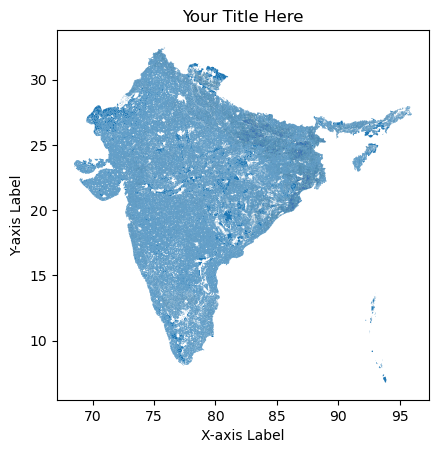

In [63]:
# Plot the GeoDataFrame
vil3.plot()
plt.title('Your Title Here')  # Add a title if needed
plt.xlabel('X-axis Label')     # Label the x-axis if needed
plt.ylabel('Y-axis Label')     # Label the y-axis if needed
plt.show()

## End